# **Latar Belakang**

Seorang pemilik supermarket **ingin mengetahui kinerja supermarketnya secara umum**. Di sisi lain, pemilik supermarket **ingin meluncurkan sebuah produk baru dalam kategori wine** sehingga pemilik supermarket **ingin mengetahui *customer behavior* pelanggannya yang sering membeli wine**.

## **Pernyataan Masalah**

Pemilik supermarket **ingin mengetahui *customer behavior* dari pelanggan yang sering membeli produk wine di supermarketnya** sehingga dengan adanya informasi ini bisa memudahkan supermarket untuk melakukan segmenting ketika hendak meluncurkan produk wine terbarunya. 

sebagai seorang Data Analyst, kita akan mencoba menjawab pertanyaan berikut: 
1. **Bagaimana segmentasi pelanggan yang sering membeli produk wine di supermarket?**
2. **Bagaimana pengaruh promosi terhadap minat beli produk wine?**
3. **Dimana pelanggan paling sering membeli produk wine?**


# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data customer yang sudah dikumpulkan oleh supermarket 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi tentang data pelanggan yang berbelanja di supermarket. Dataset ini terdiri dari 29 kolom yang dibagi menjadi 4 kategori. Kategori Data pribadi berisi tentang data pribadi pelanggan, Kategori Produk berisi tentang produk yang dibeli oleh pelanggan dalam 2 tahun terakhir, Kategori Promosi berisi tentang informasi promo harga yang dipilih oleh pelanggan, dan kategori Tempat yang berisi informasi tempat pelanggan melakukan transaksi.

Data pribadi

- ID: Nomor unik untuk identifikasi pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pelanggan
- Income: Pemasukan tahunan pelanggan
- Kidhome: banyaknya anak yang dimiliki pelanggan
- Teenhome: banyaknya anak remaja yang dimiliki pelanggan
- Dt_Customer: Tanggal pelanggan terdaftar di Supermarket
- Recency: lamanya hari sejak terakhir kali pelanggan bertransaksi
- Complain: 1 apabila pelanggan melakukan komplain dalam 2 tahun terakhir, 0 jika tidak

Produk

- MntWines: uang yang dikeluarkan untuk membeli wine dalam 2 tahun terakhir (dollar) 
- MntFruits: uang yang dikeluarkan untuk membeli buah dalam 2 tahun terakhir (dollar)
- MntMeatProducts: uang yang dikeluarkan untuk membeli daging dalam 2 tahun terakhir (dollar)
- MntFishProducts: uang yang dikeluarkan untuk membeli ikan dalam 2 tahun terakhir (dollar)
- MntSweetProducts: uang yang dikeluarkan untuk membeli manisan dalam 2 tahun terakhir (dollar)
- MntGoldProds: uang yang dikeluarkan untuk membeli emas dalam 2 tahun terakhir (dollar)

Promosi

- NumDealsPurchases: Jumlah transaksi dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

Place

- NumWebPurchases: Banyaknya transaksi yang dilakukan lewat website supermarket
- NumCatalogPurchases: Banyaknya transaksi menggunakan katalog
- NumStorePurchases: Banyaknya transaksi yang dilakukan langsung di supermarket
- NumWebVisitsMonth: Banyaknya kunjungan di website supermarket dalam 1 bulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customers.

In [3]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Supermarket Customers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Dataset berisi **29** kolom dan **2240** baris yang terdiri dari beberapa tipe data yaitu integer, object, dan float
- terdapat 24 *missing value* di kolom `Income` yang akan diselidiki lebih lanjut
- kolom `Dt_Customer` bertipe object, kita akan mengganti tipe data nya menjadi datetime

In [5]:
# Mengganti tipe data object ke datetime
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

- tipe data telah sukses diubah

In [7]:
# mengecek data duplikat
df.duplicated().sum()

0

In [8]:
# mengecek data duplikat pada kolom ID yang bersifat unik
df['ID'].duplicated().sum()

0

- Tidak terdapat data duplikat pada dataset

In [9]:
# Statistik deskriptif
pd.options.display.max_columns = None
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


- Pelanggan Supermarket yang ada di dalam data berjumlah 2240
- Pelanggan **paling muda lahir pada tahun 1996 (18 tahun)** dan yang **paling tua lahir pada tahun 1893 (121 tahun)**
- **Pemasukan pelanggan terkecil ada pada 1730 USD** dan **tertinggi ada pada 666666 USD** dengan **rata-rata 52247.25 USD**
- Transaksi terakhir paling lama adalah 99 hari 
- Pelanggan dengan pendidikan **Graduation** menjadi yang terbanyak dengan total 1127 orang
- Pelanggan dengan status **menikah** menjadi yang terbanyak dengan total 864 orang
- Terdapat anomali pada kolom `Income` dimana pemasukan tertinggi adalah 666666 dollar. Data ini selanjutnya akan dianggap sebagai outlier dan akan ditangani pada step berikutnya 

In [10]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06

- Pada kolom **`Education`**, *value* **2n cycle** mempunyai makna yang sama dengan **Master** menurut informasi [studera.nu](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#;h23) sehingga **2n cycle** akan disamakan menjadi **Master** di tahap berikutnya
- Pada kolom **`Marital_Status`**, *value* **widow** dan **divorced** mempunyai makna yang sama sehingga akan disamakan menjadi **divorced**. Begitu pula dengan **Alone** dan **Single** sehingga keduanya akan disamakan menjadi **Single** di tahap berikutnya. *value* **Together** akan diganti menjadi **Married** karena mempunyai makna yang sama. Adapun dengan *value* **YOLO** (*You Only Live Once*) akan disamakan dengan **Single** karena pelanggan tersebut mungkin hanya ingin menggunakan hidupnya yang hanya sekali itu untuk bersenang-senang tanpa menikah dan berkeluarga. *value* Absurd juga akan dimasukkan ke **Single**
- Terdapat *value* yang sama pada kolom **`Z_CostContact`** dan **`Z_Revenue`**. Kedua kolom ini dianggap tidak memberikan informasi apapun sehingga akan dihilangkan


### Memperbaiki *value* pada kolom **`Education`** dan **`Marital_Status`**

In [11]:
# perbaikan pada kolom Education
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
df['Education']


0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       PhD       
       ...        
2235    Graduation
2236    PhD       
2237    Graduation
2238    Master    
2239    PhD       
Name: Education, Length: 2240, dtype: object

In [12]:
# value telah berhasil diperbaiki
df['Education'].value_counts()

Education
Graduation    1127
Master        573 
PhD           486 
Basic         54  
Name: count, dtype: int64

In [13]:
# perbaikan pada kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Divorced')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

In [14]:
# value telah berhasil diperbaiki
df['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single      487 
Divorced    309 
Name: count, dtype: int64

### Mengatasi Missing Value

In [15]:
# cek proporsi missing value
df['Income'].isna().sum()/df.shape[0]*100

1.0714285714285714

In [16]:
# melakukan uji normalitas pada kolom Income
normaltest(df['Income'])

stat, pvalue = normaltest(df['Income'].dropna())

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


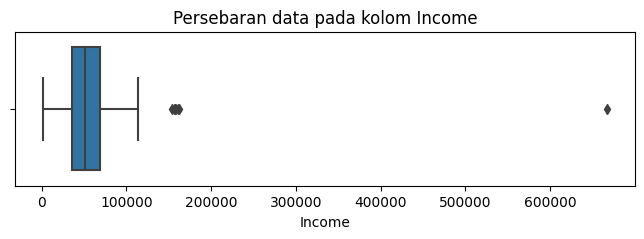

In [17]:
# menampilkan persebaran data pada kolom Income dengan Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='Income')
plt.title('Persebaran data pada kolom Income')
plt.show()

- terdapat outlier pada kolom `Income` sehingga data tidak terdistribusi normal (Right Skewed)

In [18]:
# cek skewness pada kolom income 
df['Income'].skew()

6.763487372811116

nilai skewness pada kolom `Income` > 0 sehingga data **Right Skewed**

Secara garis besar:  
* *missing value* di kolom `Income` memiliki proporsi yang cukup rendah (1,07%)
  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan karena walaupun proporsinya sedikit, bisa jadi data tersebut berguna.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam Kasus ini, kita akan mengisi *missing value* dengan *median* karena data pada kolom `Income` tidak terdistribusi normal. Menghapus data akan menjadi opsi terakhir.

In [19]:
# median Income berdasarkan Marital_Status dan Education
df.groupby(['Marital_Status', 'Education'])[['Income']].median()

Income
Marital_Status Education          
Divorced       Basic       15835.5
               Graduation  55660.5
               Master      50433.0
               PhD         54657.5
Married        Basic       23179.0
               Graduation  51763.5
               Master      49611.5
               PhD         57004.5
Single         Basic       16383.0
               Graduation  49973.5
               Master      49514.0
               PhD         48918.0

In [20]:
# mengisi missing value pada kolom Income
df['Income'] = df['Income'].fillna(df.groupby(['Marital_Status', 'Education'])['Income'].transform('median'))

*missing value* diisi dengan *median* karena data pada kolom `Income` tidak terdistribusi normal

In [21]:
# cek keberadaan missing value
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### **Menambahkan kolom `Age`**

Menurut sumber dataset yaitu [Kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign), dataset ini diambil pada tahun 2014 sehingga untuk mengisi kolom Age, kita akan mengurangi tahun 2014 dengan tahun lahir pelanggan

In [22]:
# Menambahkan kolom Age
df.insert(2, 'Age', df['Year_Birth'].apply(lambda x : 2014 - x))

In [23]:
# cek usia minimal dan maksimal 
print(df['Age'].min())
print(df['Age'].max())

18
121


Rentang usia pelanggan adalah 18-121 Tahun

### **Menambahkan kolom `Age_Group`**

Menambahkan kolom baru ini bertujuan untuk mempermudah proses klasifikasi pelanggan berdasarkan rentang umurnya. Kolom ini diberi rentang 10 tahun agar data yang dihasilkan bisa lebih spesifik.

In [24]:
# fungsi untuk mengklasifikan usia pelanggan
def age_group(age):
    if age <= 28:
        return '18-28'
    elif age >=29 and age <=39:
        return '29-39'
    elif age >= 40 and age <=50:
        return '40-50'
    elif age >=51 and age <=61:
        return '51-61'
    elif age >=62 and age <=72:
        return '62-72'
    elif age >=73 and age <=83:
        return '73-83'
    elif age >=84 and age <=94:
        return '84-94'
    elif age >= 95:
        return '95+'
    

In [25]:
# menambahkan kolom Age_group
df.insert(3, 'Age_Group', df['Age'].apply(age_group))

In [26]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,51-61,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,29-39,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom `N_Parent`**

Menambahkan kolom baru ini bertujuan untuk mengetahui jumlah orang dewasa yang ada di rumah. Apabila status pelanggan telah menikah, maka jumlah nya 2. Apabila single dan divorced, maka jumlahnya 1

In [27]:
# menambahkan kolom N_Parent
df.insert(9, 'N_Parent', df['Marital_Status'].apply(lambda x : 2 if x == 'Married' else 1))

In [28]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Parent,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,51-61,Graduation,Single,58138.0,0,0,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,1,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,0,0,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,1,0,2,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,29-39,PhD,Married,58293.0,1,0,2,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom `N_Family`**

Menambahkan kolom baru ini bertujuan untuk mempermudah proses klasifikasi pelanggan berdasarkan jumlah keluarga dalam satu rumah

In [29]:
# Menambahkan kolom N_Family
df.insert(10, 'N_Family', df['Kidhome'] + df['Teenhome'] + df['N_Parent'])

In [30]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,51-61,Graduation,Single,58138.0,0,0,1,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,1,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,0,0,2,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,1,0,2,3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,29-39,PhD,Married,58293.0,1,0,2,3,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom `Total_Spent`**

Menambahkan kolom baru ini bertujuan untuk mempermudah analisis data konsumen yang paling banyak berbelanja di supermarket

In [31]:
# Menambahkan kolom Total_Spent
df.insert(19, 'Total_Spent', df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [32]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,51-61,Graduation,Single,58138.0,0,0,1,1,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,1,1,1,3,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,0,0,2,2,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,1,0,2,3,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,29-39,PhD,Married,58293.0,1,0,2,3,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom `Income_Class`**

Menambahkan kolom baru ini bertujuan untuk mempermudah analisis data konsumen dengan mengklasifikasi konsumen berdasarkan total incomenya pertahun. Berdasarkan [usnews.com](https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system), apabila income dibawah $52,200 masuk ke kelas Low, $52,200 - $156,600 masuk ke kelas Middle, diatas $156,600 masuk ke kelas Upper

In [33]:
# fungsi untuk mengklasifikasian pelanggan berdasarkan Income
def income(inc):
    if inc <= 52200:
        return 'Low'
    elif inc >=52200 and inc <=156600:
        return 'Middle'
    elif inc >= 156600:
        return 'Upper'

In [34]:
# menambahkan kolom Income_Class
df.insert(7, 'Income_Class', df['Income'].apply(income))

In [35]:
df['Income_Class'].value_counts()

Income_Class
Low       1152
Middle    1081
Upper     7   
Name: count, dtype: int64

In [36]:
df.sample(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1841,6906,1953,61,51-61,Master,Divorced,84953.0,Middle,0,0,1,1,2013-06-03,73,167,48,602,63,72,72,1024,1,3,10,4,2,0,1,1,1,0,0,3,11,1
1277,10637,1964,50,40-50,Graduation,Married,40800.0,Low,1,2,2,5,2013-01-01,77,24,0,27,8,30,10,99,2,3,0,3,7,0,0,0,0,0,1,3,11,0
1487,5529,1946,68,62-72,PhD,Married,64014.0,Middle,2,1,2,5,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,7,0,0,0,1,0,0,3,11,0
215,1584,1977,37,29-39,Graduation,Married,41443.0,Low,1,0,2,3,2014-04-01,79,171,7,171,25,19,89,482,6,8,1,5,8,0,0,0,0,0,0,3,11,0
692,450,1958,56,51-61,Master,Married,42315.0,Low,0,1,2,3,2013-07-12,90,67,15,80,17,11,80,270,3,1,4,4,3,0,0,0,0,0,0,3,11,0
246,2176,1972,42,40-50,Graduation,Married,80134.0,Middle,1,0,2,3,2013-05-20,40,1218,16,272,104,0,80,1690,2,5,3,6,6,0,1,1,1,0,0,3,11,1
1949,9955,1954,60,51-61,Graduation,Married,39898.0,Low,0,1,2,3,2013-02-12,20,69,8,26,12,7,12,134,2,3,0,4,7,0,0,0,0,0,0,3,11,0
1374,4743,1969,45,40-50,PhD,Married,56242.0,Middle,0,1,2,3,2013-03-03,72,689,8,167,11,8,88,971,5,8,4,11,6,0,0,0,0,0,0,3,11,0
423,1361,1974,40,40-50,Master,Married,82584.0,Middle,0,0,2,2,2013-06-04,26,1076,68,103,29,91,68,1435,1,3,4,8,1,0,1,1,0,0,0,3,11,1
675,6961,1974,40,40-50,Graduation,Married,26751.0,Low,2,0,2,4,2014-05-22,26,1,1,5,0,3,1,11,1,1,0,2,8,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom `Accept_Promo`**

Menambahkan kolom baru ini bertujuan untuk mengetahui berapa jumlah promosi yang diterima oleh pelanggan

In [37]:
# menambahkan kolom Accept_Promo
df['Accept_Promo'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

In [38]:
df.sample(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept_Promo
1609,9971,1964,50,40-50,PhD,Married,65526.0,Middle,0,1,2,3,2014-04-11,22,397,19,69,12,0,9,506,1,4,4,8,2,0,0,0,0,0,0,3,11,0,0
735,7875,1949,65,62-72,Graduation,Married,72025.0,Middle,0,0,2,2,2014-04-29,46,967,0,617,43,50,0,1677,1,4,8,13,2,0,1,1,1,0,0,3,11,1,4
344,8234,1973,41,40-50,Basic,Married,27190.0,Low,1,0,2,3,2013-08-15,13,1,6,7,0,1,3,18,1,1,0,2,8,1,0,0,0,0,0,3,11,1,2
1304,6055,1979,35,29-39,Graduation,Married,71626.0,Middle,0,0,2,2,2012-11-01,94,546,72,376,94,145,72,1305,1,5,5,8,3,0,1,0,0,0,0,3,11,0,1
604,1177,1966,48,40-50,Master,Married,49618.0,Low,1,1,2,4,2013-01-26,77,80,3,26,4,2,14,129,4,3,1,3,7,0,0,0,0,0,0,3,11,0,0
1664,8299,1989,25,18-28,PhD,Single,33996.0,Low,0,0,1,1,2013-09-11,46,40,2,15,8,0,6,71,1,1,1,3,4,0,0,0,0,0,0,3,11,0,0
934,4843,1952,62,62-72,Graduation,Single,75127.0,Middle,0,0,1,1,2014-05-22,92,203,35,305,46,17,227,833,1,2,11,5,1,0,0,0,0,0,0,3,11,0,0
1837,332,1957,57,51-61,Graduation,Married,47743.0,Low,0,1,2,3,2013-03-22,56,198,2,43,0,12,20,275,3,4,1,6,6,0,1,0,0,0,0,3,11,0,1
658,3867,1947,67,62-72,PhD,Married,73059.0,Middle,0,1,2,3,2013-08-31,36,410,112,420,0,82,71,1095,1,9,3,13,4,0,0,0,0,0,0,3,11,0,0
1403,4188,1957,57,51-61,Graduation,Single,36864.0,Low,0,1,1,2,2012-08-13,53,204,5,39,17,0,89,354,3,5,2,4,8,0,0,0,0,0,0,3,11,1,1


In [39]:
df['Accept_Promo'].value_counts()

Accept_Promo
0    1631
1    370 
2    142 
3    51  
4    36  
5    10  
Name: count, dtype: int64

### **Menambahkan kolom `Month`**

Menambahkan kolom ini bertujuan untuk memudahkan pencarian bulan mana yang memiliki pelanggan baru terbanyak 

In [40]:
# menambahkan kolom Month
df.insert(13, 'Month', df['Dt_Customer'].apply(lambda x : str(x)[:7]))

In [41]:
# mengubah tipe data pada kolom Month dari string menjadi datetime
df['Month'] = pd.to_datetime(df['Month'])

In [42]:
# menampilkan value berupa nama bulan pada kolom Month
df['Month'] = df['Month'].dt.month_name()
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept_Promo
0,5524,1957,57,51-61,Graduation,Single,58138.0,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0


### **Menghapus kolom **`Z_CostContact`** dan **`Z_Revenue`****

In [43]:
# menghapus kolom
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1)

Kolom `Z_CostContact` dan `Z_Revenue` dihapus karena hanya berisikan satu nilai yang sama sehingga datanya tidak bisa digunakan

### **Menangani Outliers**
Terdapat beberapa outliers pada dataset Supermarket Customers terutama pada kolom `Income`. Cara menyikapi outlier adalah dengan membiarkan outlier tersebut ada karena bisa jadi berisi informasi yang penting atau dengan menghapus outlier yang tidak relevan dan tidak sesuai *common sense* karena bisa menyebabkan data menjadi bias.  

#### **Outlier pada kolom `Income`**

Pada tahap sebelumnya, kita telah mengetahui bahwa kolom `Income` tidak terdistribusi normal dan mempunyai outlier. Pada tahap ini kita akan mengecek outlier yang nilainya sangat jauh diatas *upper fence*

In [44]:
# mencari nilai Q1 dan Q3
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

In [45]:
# mencari nilai IQR
IQR = Q3 - Q1
IQR

32751.0

In [46]:
# mencari nilai lower fence
lower_fence = Q1 - 1.5 * IQR 
lower_fence

-13587.75

In [47]:
# mencari nilai upper fence
upper_fence = Q3 + 1.5 * IQR
upper_fence

117416.25

In [48]:
# outlier pada kolom income
ourlier_income = df[(df['Income'] < lower_fence) | (df['Income'] > upper_fence)]
ourlier_income

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
164,8475,1973,41,40-50,PhD,Married,157243.0,Upper,0,1,2,3,2014-03-01,March,98,20,2,1582,1,2,1,1608,15,0,22,0,0,0,0,0,0,0,0,0,0
617,1503,1976,38,29-39,PhD,Married,162397.0,Upper,1,1,2,4,2013-06-03,June,31,85,1,16,2,1,2,107,0,0,0,1,1,0,0,0,0,0,0,0,0
655,5555,1975,39,29-39,Graduation,Divorced,153924.0,Middle,0,0,1,1,2014-02-07,February,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
687,1501,1982,32,29-39,PhD,Married,160803.0,Upper,0,0,2,2,2012-08-04,August,21,55,16,1622,17,3,4,1717,15,0,28,1,0,0,0,0,0,0,0,0,0
1300,5336,1971,43,40-50,Master,Married,157733.0,Upper,1,0,2,3,2013-06-04,June,37,39,1,9,2,0,8,59,0,1,0,1,1,0,0,0,0,0,0,0,0
1653,4931,1977,37,29-39,Graduation,Married,157146.0,Upper,0,0,2,2,2013-04-29,April,13,1,0,1725,2,1,1,1730,0,0,28,0,1,0,0,0,0,0,0,0,0
2132,11181,1949,65,62-72,PhD,Married,156924.0,Upper,0,0,2,2,2013-08-29,August,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0
2233,9432,1977,37,29-39,Graduation,Married,666666.0,Upper,1,0,2,3,2013-06-02,June,23,9,14,18,8,1,12,62,4,3,1,3,6,0,0,0,0,0,0,0,0


Kita bisa melihat bahwa ada satu nilai pada kolom `Income` yang mempunyai nilai yang sangat jauh dari *upper fence* yaitu pelanggan dengan ID 9432 dengan nilai Income sebesar 666666 USD. Kita bisa mencurigai bahwa pelanggan salah melakukan input data. Selain itu, dengan nilai income yang sangat besar, tetapi jumlah produk yang dibeli tidak lebih besar daripada pelanggan lain. Maka dari itu, data tersebut akan dihilangkan.

In [49]:
# Menghapus data pada index 2233
df.drop([2233], inplace=True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [50]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2239, 35)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2239,"[5237, 7462]"
1,Year_Birth,int64,0,59,"[1951, 1966]"
2,Age,int64,0,59,"[35, 44]"
3,Age_Group,object,0,7,"[73-83, 29-39]"
4,Education,object,0,4,"[Graduation, Master]"
5,Marital_Status,object,0,3,"[Divorced, Single]"
6,Income,float64,0,1978,"[56937.0, 32313.0]"
7,Income_Class,object,0,3,"[Middle, Upper]"
8,Kidhome,int64,0,3,"[1, 2]"
9,Teenhome,int64,0,3,"[0, 2]"


- Sebelum dibersihkan, kita memiliki 2240 baris data dan 29 kolom, sekarang kita memiliki 2239 baris data dan 35 kolom. Sebanyak 1 baris data yang memuat data tidak relevan dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.
- Dihapus 2 kolom yaitu `Z_CostContact` dan `Z_Revenue` karena memuat data yang sama sehingga tidak dapat menampilkan informasi apapun
- Ditambahkan 8 kolom baru yaitu kolom `Age`, `Age_Group`, `N_Parents`, `N_Family`, `Income_Class`, `Total_Spent`, `Month`, dan `Accept_Promo` sebagai klasifikasi untuk mempermudah proses analisis

# **Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk **menjawab pernyataan masalah di atas**.

## **Analisis Minat Produk**

### **Produk yang paling diminati di Supermarket**

In [51]:
# total penjualan setiap produk di Supermarket
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

MntWines            680807
MntFruits           58903 
MntMeatProducts     373950
MntFishProducts     84049 
MntSweetProducts    60620 
MntGoldProds        98597 
dtype: int64

In [146]:
# membuat datafram baru berisikan informasi total penjualan setiap produk
df_produk = pd.DataFrame({
    'Produk' : ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    'Total_Spent' : [680029, 58753, 373375, 83931, 60552, 98346]
}).sort_values('Total_Spent', ascending=False)
df_produk

,Produk,Total_Spent
0,MntWines,680029
2,MntMeatProducts,373375
5,MntGoldProds,98346
3,MntFishProducts,83931
4,MntSweetProducts,60552
1,MntFruits,58753


In [53]:
df_produk = df_produk.sort_values('Total_Spent', ascending=False)
df_produk

,Produk,Total_Spent
0,MntWines,680029
2,MntMeatProducts,373375
5,MntGoldProds,98346
3,MntFishProducts,83931
4,MntSweetProducts,60552
1,MntFruits,58753


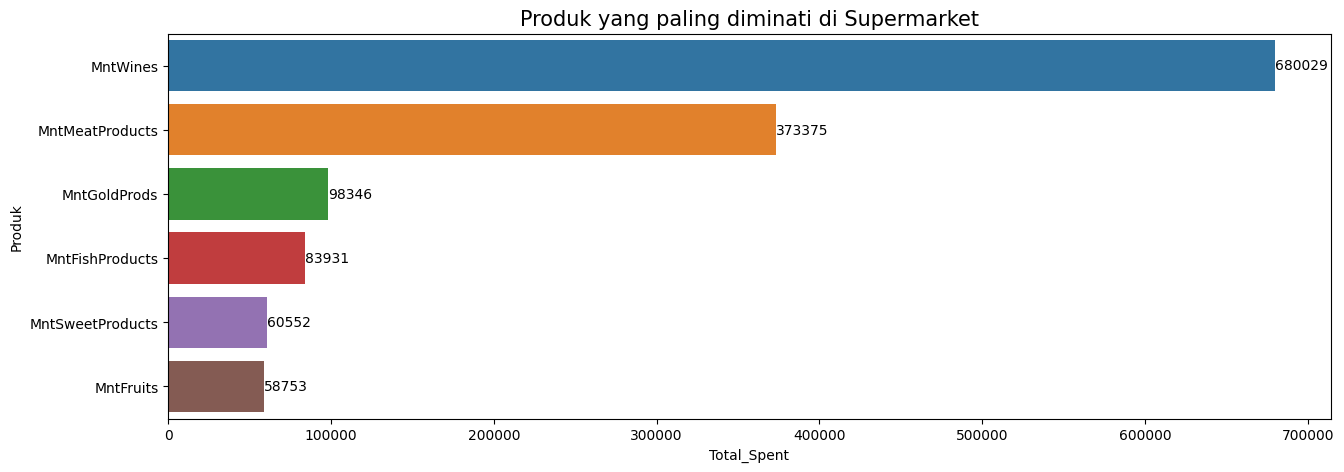

In [54]:
# informasi penjualan setiap produk dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Produk yang paling diminati di Supermarket', size=15)
ax = sns.barplot(df_produk, x='Total_Spent', y='Produk')
for i in ax.containers:
            ax.bar_label(i,)


Dari grafik diatas, kita bisa menarik kesimpulan bahwa:

- Produk yang paling banyak dibeli dalam 2 tahun terakhir :
    - produk wine : sebanyak 680029 dollar uang konsumen dikeluarkan untuk membeli wine.
    - produk daging : sebanyak 373375 dollar uang konsumen dikeluarkan untuk membeli daging.
    <br><br>
- Produk buah-buahan adalah produk yang paling sedikit dibeli di Supermarket. Dalam 2 tahun terakhir, sebanyak 58753 dollar uang konsumen dikeluarkan untuk membeli buah-buahan.

### **10 Pelanggan yang paling konsumtif**

In [55]:
# membuat dataframe baru berisikan data pelanggan dengan total pembelian terbanyak
df_most = df.sort_values('Total_Spent', ascending=False).head(10)
df_most.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
1572,5350,1991,23,18-28,Master,Single,90638.0,Middle,0,0,1,1,2014-02-13,February,29,1156,120,915,94,144,96,2525,1,3,4,10,1,0,0,1,0,0,0,1,2
1179,5735,1991,23,18-28,Master,Single,90638.0,Middle,0,0,1,1,2014-02-13,February,29,1156,120,915,94,144,96,2525,1,3,4,10,1,0,0,1,0,0,0,0,1
1492,1763,1988,26,18-28,Graduation,Married,87679.0,Middle,0,0,2,2,2013-07-27,July,62,1259,172,815,97,148,33,2524,1,7,11,10,4,1,0,1,1,0,0,1,4
987,4580,1969,45,40-50,Graduation,Married,75759.0,Middle,0,0,2,2,2013-10-25,October,46,1394,22,708,89,91,182,2486,1,9,7,9,5,1,0,1,1,0,0,1,4
1052,4475,1949,65,62-72,PhD,Married,69098.0,Middle,0,0,2,2,2013-02-16,February,82,1315,22,780,145,0,178,2440,1,7,8,9,5,0,0,0,0,0,0,0,0


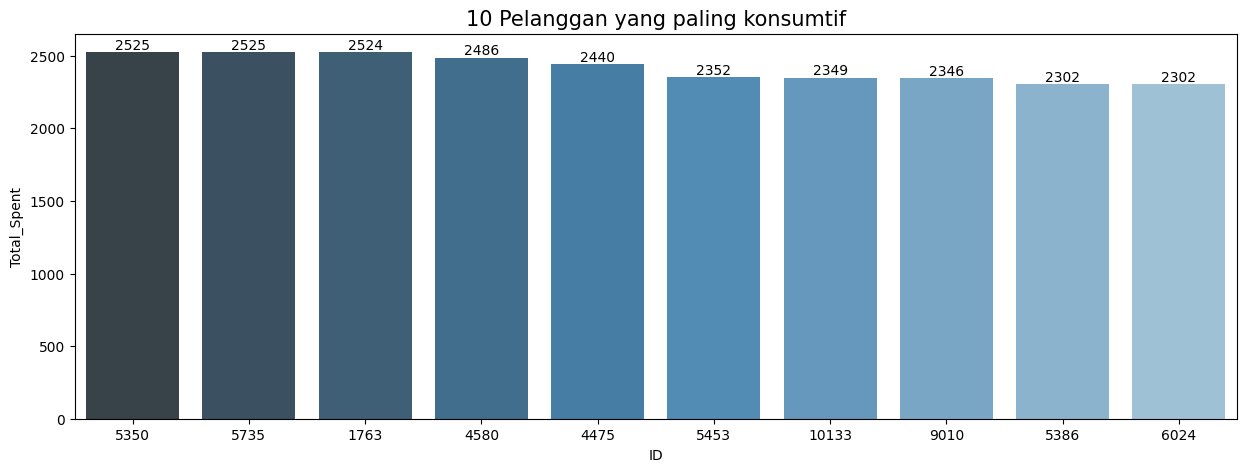

In [149]:
# informasi pelanggan dengan total pembelian produk terbanyak dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('10 Pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_most, x='ID', y='Total_Spent', palette = 'Blues_r_d', order=df_most.sort_values('Total_Spent', ascending=False).ID)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat menarik kesimpulan bahwa pelanggan yang paling banyak membeli produk di Supermarket adalah pelanggan dengan ID 5350 dan 5735 dengan total pembelian sebesar 2525 dollar sehingga 10 konsumen ini bisa diberikan reward khusus sebagai apresiasi karena telah menjadi *loyal customer* Supermarket.

### **10 Pelanggan yang paling tidak konsumtif**

In [150]:
# membuat dataframe baru berisikan data pelanggan dengan total pembelian paling sedikit
df_least = df.sort_values('Total_Spent').head(10)
df_least.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
1524,11110,1973,41,40-50,Graduation,Single,3502.0,Low,1,0,1,2,2013-04-13,April,56,2,1,1,0,0,1,5,0,0,0,0,14,0,0,0,0,0,0,0,0
981,3955,1965,49,40-50,Graduation,Divorced,4861.0,Low,0,0,1,1,2014-06-22,June,20,2,1,1,1,0,1,6,0,0,0,0,14,0,0,0,0,0,0,0,0
655,5555,1975,39,29-39,Graduation,Divorced,153924.0,Middle,0,0,1,1,2014-02-07,February,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1420,5824,1972,42,40-50,PhD,Married,34578.0,Low,2,1,2,5,2014-04-11,April,1,7,0,1,0,0,0,8,1,1,0,2,6,0,0,0,0,0,0,0,0
1245,6862,1971,43,40-50,Graduation,Divorced,1730.0,Low,0,0,1,1,2014-05-18,May,65,1,1,3,1,1,1,8,15,0,0,0,20,0,0,0,0,0,0,0,0


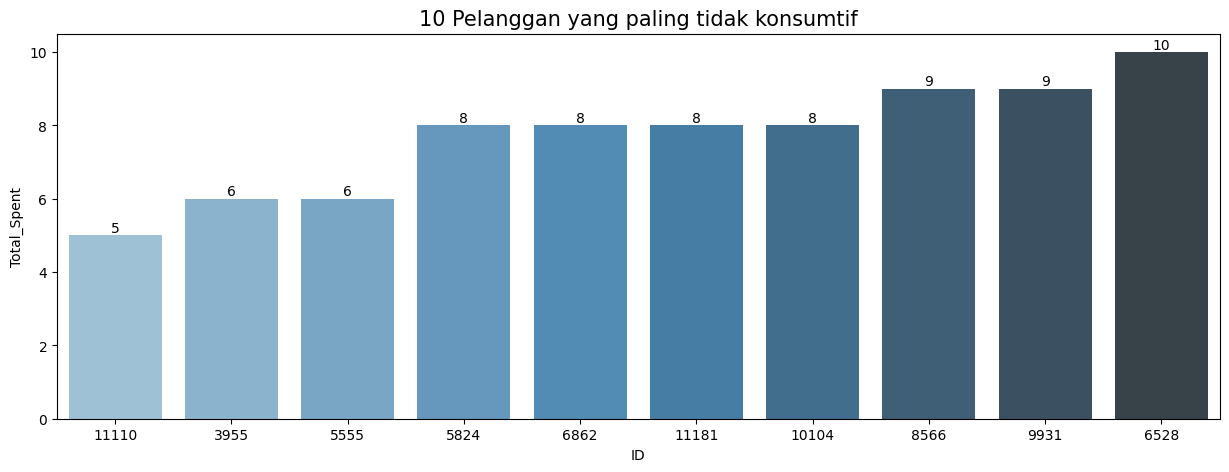

In [152]:
# informasi pelanggan dengan total pembelian produk paling sedikit dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('10 Pelanggan yang paling tidak konsumtif', size=15)
ax = sns.barplot(df_least, x='ID', y='Total_Spent', palette='Blues_d', order=df_least.sort_values('Total_Spent').ID)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat menarik kesimpulan bahwa pelanggan yang paling sedikit membeli produk di Supermarket adalah pelanggan dengan ID 11110 dengan total pembelian sebesar 5 dollar sehingga untuk kedepannya, kita bisa memberi penawaran dan pelayanan khusus kepada para pelanggan ini dengan harapan pelanggan tersebut bisa menjadi *loyal customer*

### **Cek distribusi data pada kolom kategori Produk**

Cek distribusi data ini bertujuan untuk melihat sebaran data pada beberapa kolom yang akan dianalisis

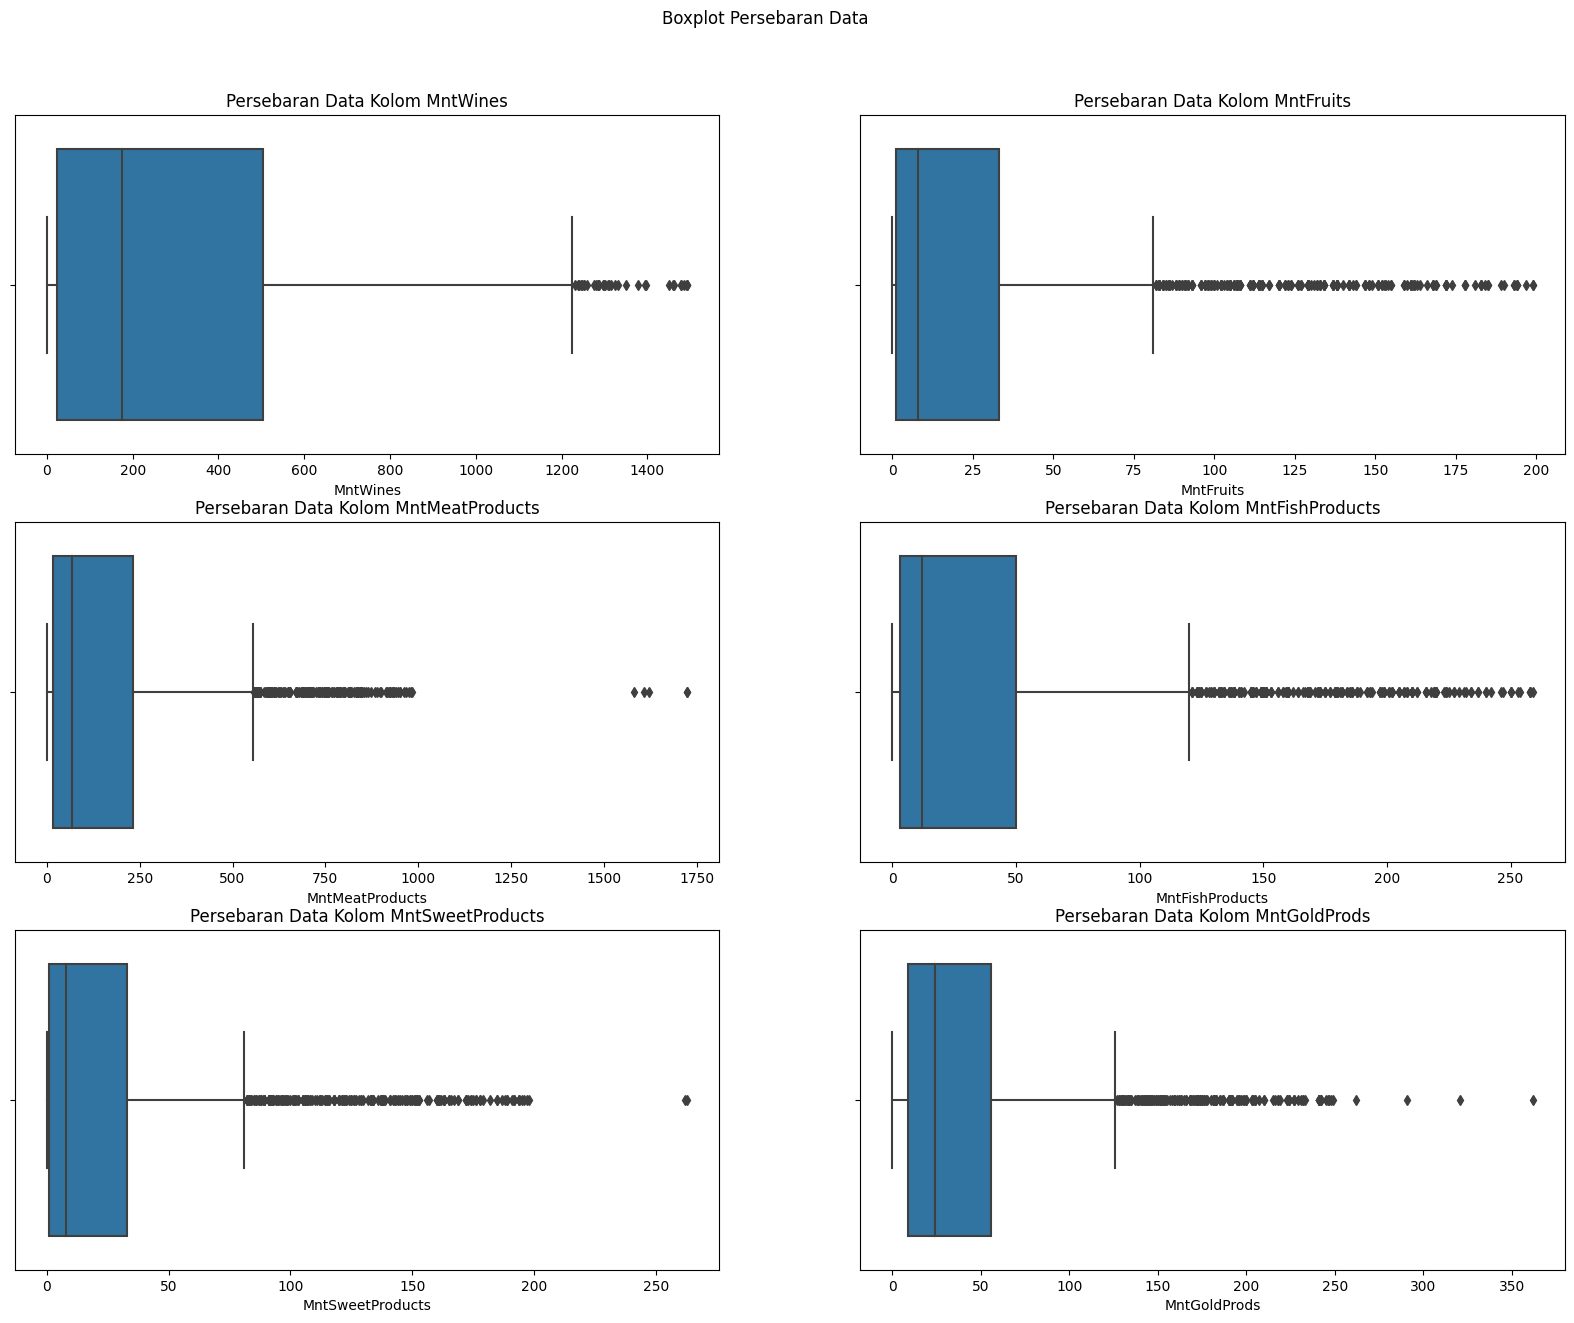

In [59]:
# Melihat persebaran data kategori produk menggunakan boxplot
list_corr = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :
        plt.subplot(n_rows, n_cols, id + 1)
        sns.boxplot(data=df, x = list_corr[id])
        plt.title(f'Persebaran Data Kolom {list_corr[id]}', y=1)
        id += 1

plt.suptitle("Boxplot Persebaran Data", y=0.95)
plt.show()

In [60]:
# Uji normalitas setiap kolom kategori produk dengan normaltest 
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data pada kolom MntWines TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom MntFruits TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom MntMeatProducts TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom MntFishProducts TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom MntSweetProducts TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom MntGoldProds TIDAK terdistribusi normal


Secara singkat, kita bisa mengetahui bahwa semua kolom diatas tidak terdistribusi normal, sehingga untuk proses analisis selanjutnya, kita akan menggunakan **median**

### **Minat Produk berdasarkan `Age_Group`**

#### **Rentang usia pelanggan yang paling konsumtif**

In [153]:
# membuat variabel baru berisi data total pembelian berdasarkan rentang usia
df_total_spent_age = df.groupby('Age_Group')[['Total_Spent']].median().reset_index()
df_total_spent_age.sort_values('Total_Spent', ascending=False)

,Age_Group,Total_Spent
5,73-83,1138.0
4,62-72,685.0
3,51-61,591.5
2,40-50,318.0
0,18-28,213.0
1,29-39,187.0
6,95+,65.0


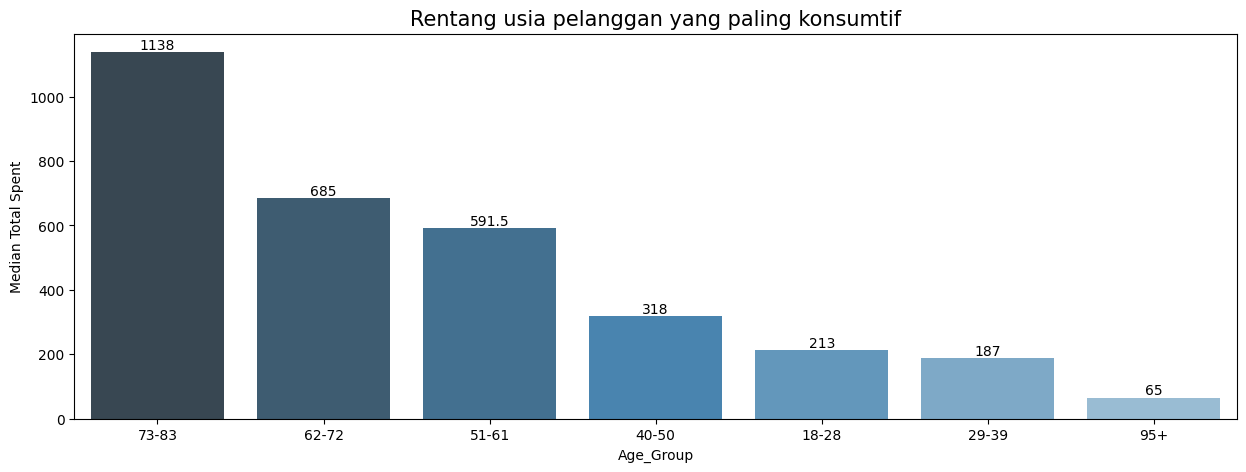

In [154]:
# informasi pelanggan dengan rentang usia paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Rentang usia pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_age, x='Age_Group', y='Total_Spent', palette='Blues_r_d', order=df_total_spent_age.sort_values('Total_Spent', ascending=False).Age_Group)
plt.ylabel('Median Total Spent')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- rentang usia 73-83 tahun menjadi yang paling konsumtif disusul dengan rentang usia 62-72 tahun dengan selisih median 453 dollar
- rentang usia 96 tahun keatas menjadi yang paling tidak konsumtif dengan median hanya 65 dollar

### **Minat beli produk berdasarkan rentang usia**

In [63]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan rentang usia
df_product_per_age_group = df.groupby('Age_Group')[['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median().reset_index()
df_product_per_age_group

,Age_Group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,18-28,65.0,12.0,54.0,19.0,14.0,26.0
1,29-39,69.0,6.0,47.0,11.0,8.0,20.5
2,40-50,162.5,6.0,57.0,10.0,7.0,21.0
3,51-61,286.5,11.0,99.5,17.0,12.0,30.0
4,62-72,332.0,13.0,108.0,17.0,11.0,30.0
5,73-83,714.5,21.0,361.5,27.5,0.0,13.5
6,95+,15.0,6.0,8.0,7.0,4.0,25.0


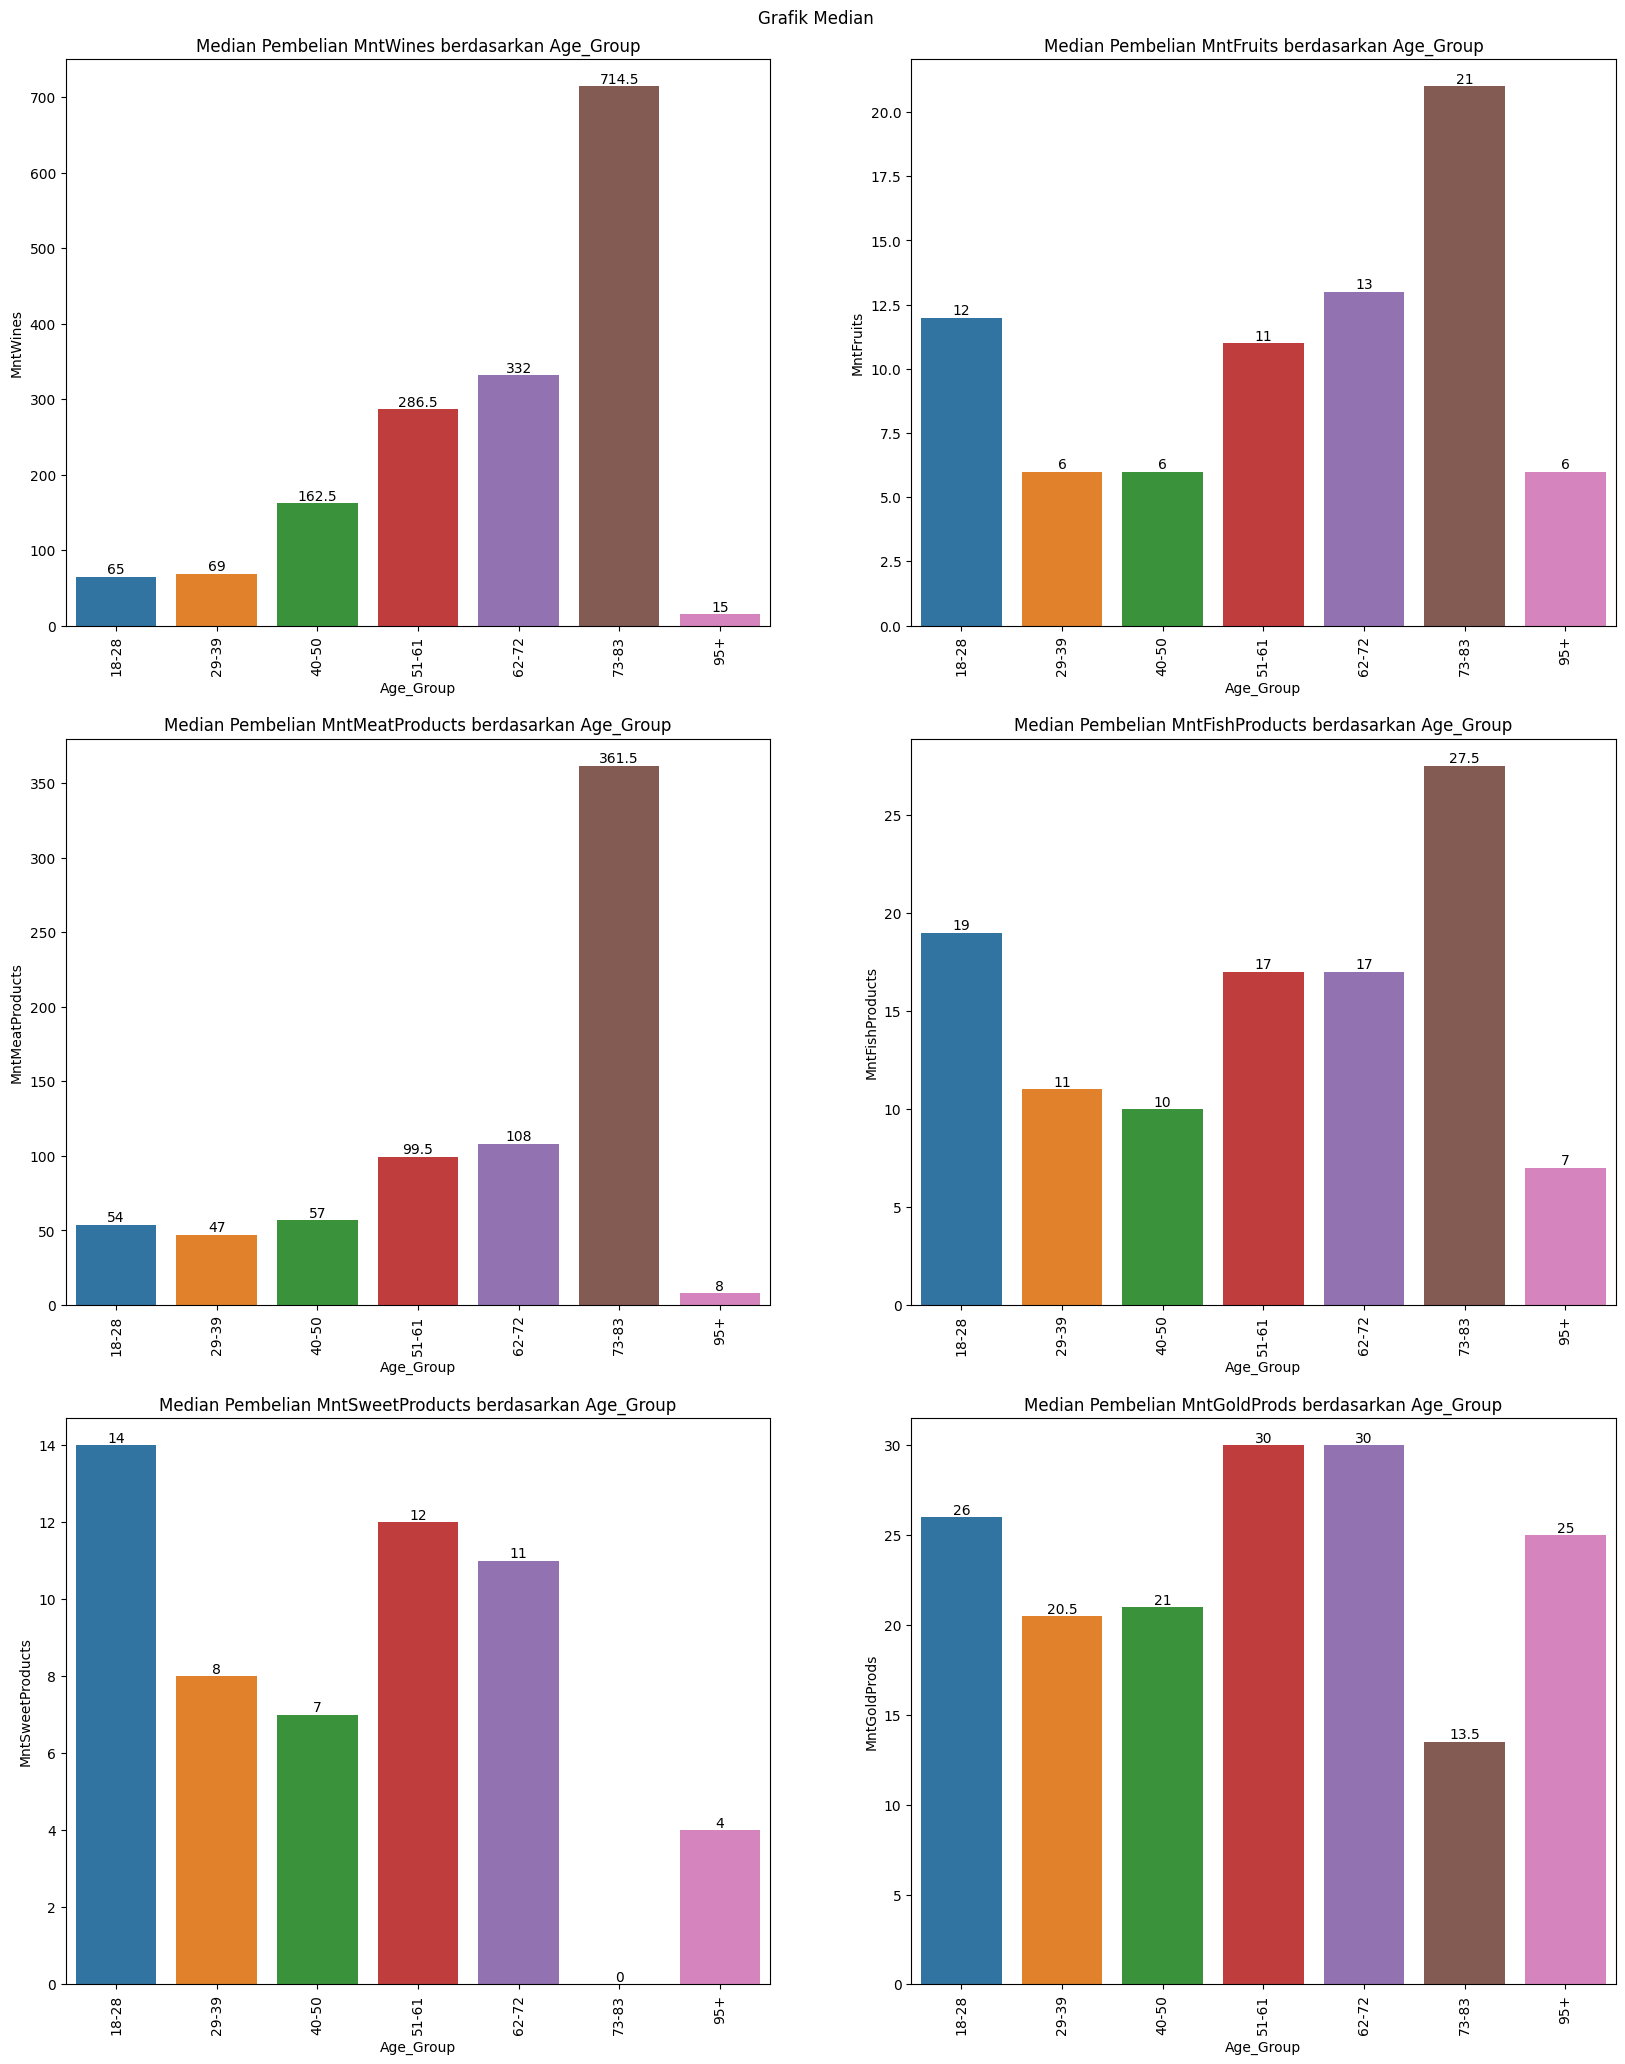

In [64]:
# informasi total pembelian setiap produk berdasarkan rentang usia dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_product_per_age_group, x='Age_Group', y = list_product[id], ci=0, estimator = 'median')
        plt.xticks(rotation = 90)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Age_Group')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Berdasarkan grafik diatas, kita bisa mengambil kesimpulan bahwa produk :

- Setelah dilakukan uji hipotesis, median semua status pernikahan terhadap pembelian produk berbeda signifikan sehingga perlu menjadi perhatian khusus.

- MntWines : paling banyak dibeli oleh pelanggan yang berusia 73-83 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 95 tahun keatas dengan perbedaan median sekitar 48x lipat. Menurut common sense, bisa diasumsikan bahwa pelanggan dengan usia 73-83 tahun sedang menikmati sisa hidupnya dan pelanggan yang berusia 95 tahun keatas sedang menjaga pola hidupnya dengan mengurangi konsumsi alkohol. Asumsi ini bisa dibenarkan oleh artikel [arkansasonline.com](https://www.arkansasonline.com/news/2023/jan/25/report-most-wine-customers-over-the-age-of-60/) yang menyebutkan pada tahun 2007, konsumen berusia diatas 60 tahun bertanggung jawab atas 32% dari penjualan wine ke seluruh konsumen. 

- MntFruits : paling banyak dibeli oleh pelanggan yang berusia 73-83 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 29-39 tahun, 40-50 tahun, dan 95 tahun keatas dengan perbedaan median sekitar 3.5x lipat. Menurut common sense, bisa diasumsikan bahwa pelanggan dengan usia 74-79 sedang menjaga kesehatan dengan banyak mengkonsumsi buah-buahan

- MntMeatProducts : paling banyak dibeli oleh pelanggan yang berusia 73-83 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 95 tahun ke atas dengan perbedaan median sekitar 45x lipat

- MntFishProducts : paling banyak dibeli oleh pelanggan yang berusia 73-83 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 95 tahun ke atas dengan perbedaan median hampir 4x lipat

- MntSweetProducts : paling banyak dibeli oleh pelanggan yang berusia 18-28 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 73-83 tahun dengan perbedaan median sekitar 14x lipat dimana pelanggan dengan usia 73-83 tahun sama sekali tidak membeli produk manis. Menurut common sense, bisa diasumsikan bahwa pelanggan yang berusia 73-83 tahun cenderung mengurangi konsumsi makanan atau minuman manis untuk menghindari resiko terkena penyakit yang disebabkan oleh tingginya konsumsi gula
    
- MntGoldProds : paling banyak dibeli oleh pelanggan yang berusia 51-61 tahun dan 62-72 tahun dan paling sedikit dibeli oleh pelanggan yang berusia 73-83 tahun dengan perbedaan median sekitar 2x lipat. Menurut common sense, bisa diasumsikan bahwa pelanggan yang berusia 27-32 tahun membeli emas sebagai investasi untuk masa depan.

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median semua rentang usia terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [157]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Age_Group'] == '18-28'][i],
        df[df['Age_Group'] == '29-39'][i],
        df[df['Age_Group'] == '40-50'][i],
        df[df['Age_Group'] == '51-61'][i],
        df[df['Age_Group'] == '62-72'][i],
        df[df['Age_Group'] == '73-83'][i],
        df[df['Age_Group'] == '95+'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua rentang usia terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntWines berbeda signifikan
    

    pvalue = 0.00453. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntFruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntMeatProducts berbeda signifikan
    

    pvalue = 0.00040. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntFishProducts berbeda signifikan
    

    pvalue = 0.00003. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntSweetProducts berbeda signifikan
    

    pvalue = 0.00036. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua rentang usia terhadap minat pembelian produk MntGoldProds berbeda signifikan
    


### **Minat Produk berdasarkan `Marital_Status`**

#### **Status pernikahan pelanggan yang paling konsumtif**

In [66]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan status pernikahan
df_total_spent_status = df.groupby('Marital_Status')[['Total_Spent']].median().reset_index()
df_total_spent_status.sort_values('Total_Spent', ascending=False)

,Marital_Status,Total_Spent
0,Divorced,497.0
1,Married,396.0
2,Single,369.0


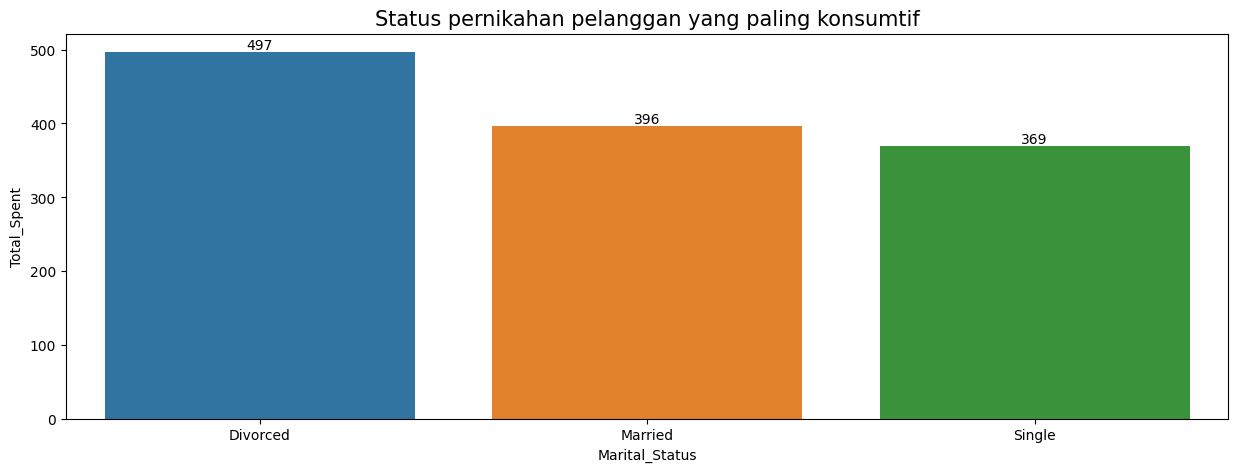

In [67]:
# informasi pelanggan dengan status pernikahan paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Status pernikahan pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_status, x='Marital_Status', y='Total_Spent', order=df_total_spent_status.sort_values('Total_Spent', ascending=False).Marital_Status)
for i in ax.containers:
    ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Pelanggan yang bercerai menjadi yang paling konsumtif disusul dengan pelanggan yang menikah dengan selisih median 101 dollar
- Pelanggan yang masih single menjadi yang paling tidak konsumtif dengan median 369 dollar

### **Minat beli produk berdasarkan status pernikahan**

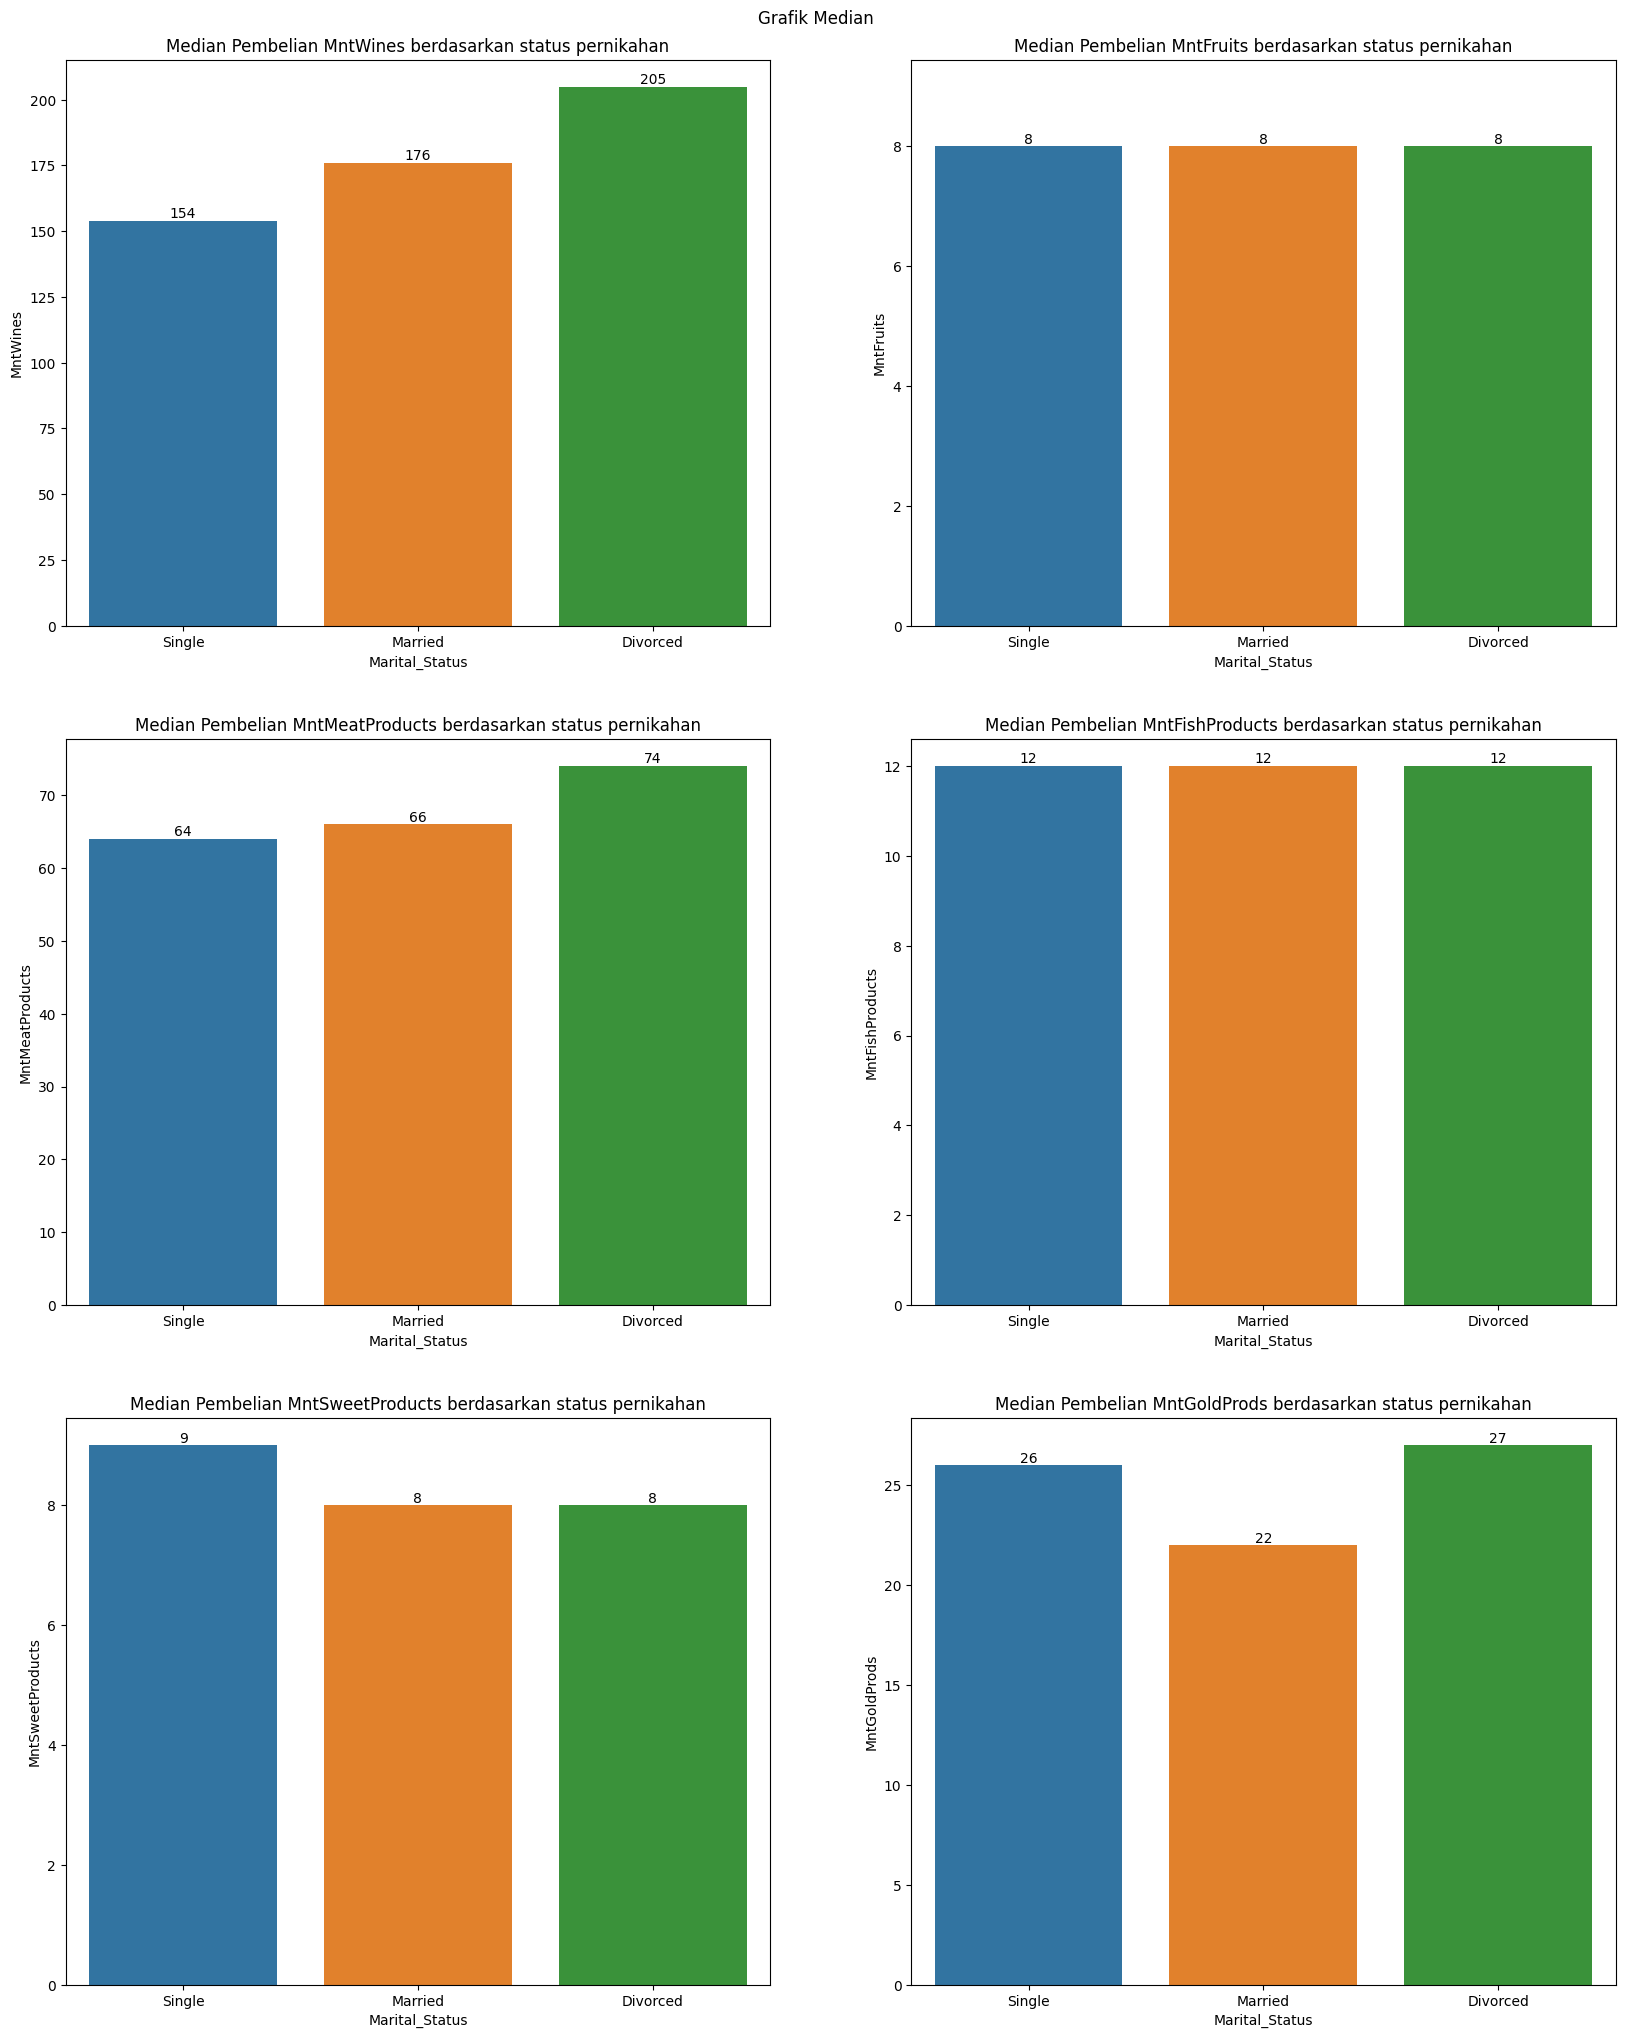

In [68]:
# informasi total pembelian setiap produk berdasarkan status pernikahan dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='Marital_Status', y = list_product[id], ci=0, estimator='median')
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan status pernikahan')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Berdasarkan grafik diatas, kita bisa mengambil kesimpulan bahwa produk :

- Setelah dilakukan uji hipotesis, median semua status pernikahan terhadap pembelian produk tidak berbeda signifikan sehingga tidak perlu menjadi perhatian

- MntWines : paling banyak dibeli oleh pelanggan yang berstatus cerai dan paling sedikit dibeli oleh pelanggan yang berstatus single dengan perbedaan median sekitar 1,3 kali lipat. Berdasarkan common sense, pelanggan yang cerai mungkin mempunyai tingkat stress yang tinggi sehingga membutuhkan wine sebagai pereda stress.

- MntFruits : tidak ada perbedaan yang signifikan untuk median minat beli produk buah-buahan berdasarkan status pernikahan, semuanya memiliki median 8 dollar

- MntMeatProducts : paling banyak dibeli oleh pelanggan yang berstatus cerai dan paling sedikit dibeli oleh pelanggan yang berstatus single

- MntFishProducts : tidak ada perbedaan yang signifikan untuk median minat beli produk buah-buahan berdasarkan status pernikahan, semuanya memiliki median 12 dollar

- MntSweetProducts : paling banyak dibeli oleh pelanggan yang berstatus Single dan paling sedikit dibeli oleh pelanggan yang berstatus menikah dan bercerai
    
- MntGoldProds : paling banyak dibeli oleh pelanggan yang berstatus cerai dan paling sedikit dibeli oleh pelanggan yang berstatus menikah

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median semua status pernikahan terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [69]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Marital_Status'] == 'Divorced'][i],
        df[df['Marital_Status'] == 'Married'][i],
        df[df['Marital_Status'] == 'Single'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua status pernikahan terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.08146. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntWines TIDAK berbeda signifikan       
    

    pvalue = 0.28606. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntFruits TIDAK berbeda signifikan       
    

    pvalue = 0.78394. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntMeatProducts TIDAK berbeda signifikan       
    

    pvalue = 0.67144. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntFishProducts TIDAK berbeda signifikan       
    

    pvalue = 0.92703. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntSweetProducts TIDAK berbeda signifikan       
    

    pvalue = 0.12615. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk MntGoldPr

### **Minat Produk berdasarkan `Education`**

#### **Tingkat pendidikan pelanggan yang paling konsumtif**

In [70]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan tingkat pendidikan
df_total_spent_edu = df.groupby('Education')[['Total_Spent']].median().reset_index()
df_total_spent_edu.sort_values('Total_Spent', ascending=False)

,Education,Total_Spent
3,PhD,493.0
1,Graduation,414.5
2,Master,325.0
0,Basic,57.0


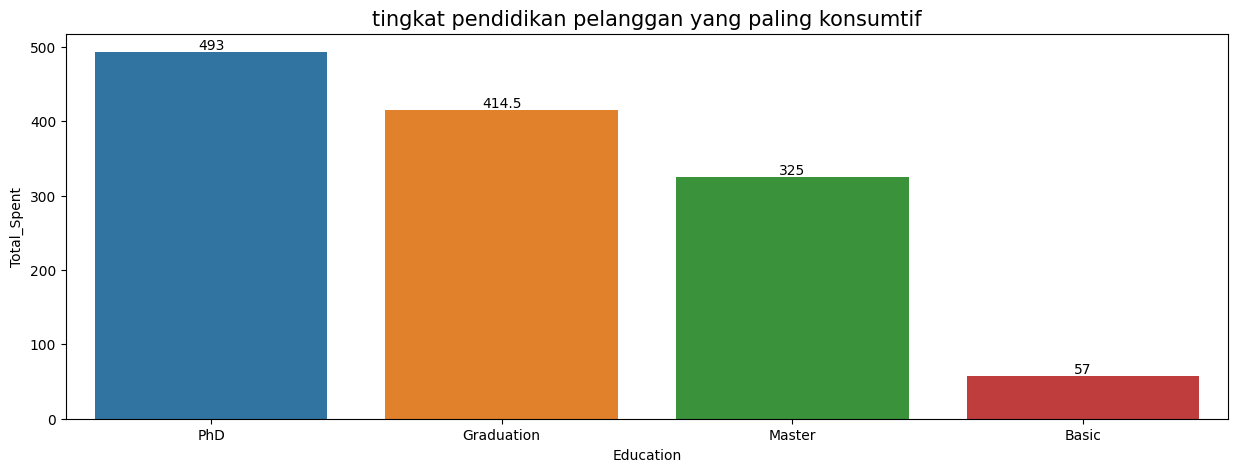

In [71]:
# informasi pelanggan dengan tingkat pendidikan paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('tingkat pendidikan pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_edu, x='Education', y='Total_Spent', order=df_total_spent_edu.sort_values('Total_Spent', ascending=False).Education)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Tingkat pendidikan PhD menjadi yang paling konsumtif disusul dengan Graduation dengan selisih median 78.5 dollar
- Tingkat pendidikan Basic menjadi yang paling tidak konsumtif dengan median 57 dollar

### **Minat beli produk berdasarkan pendidikan terakhir**

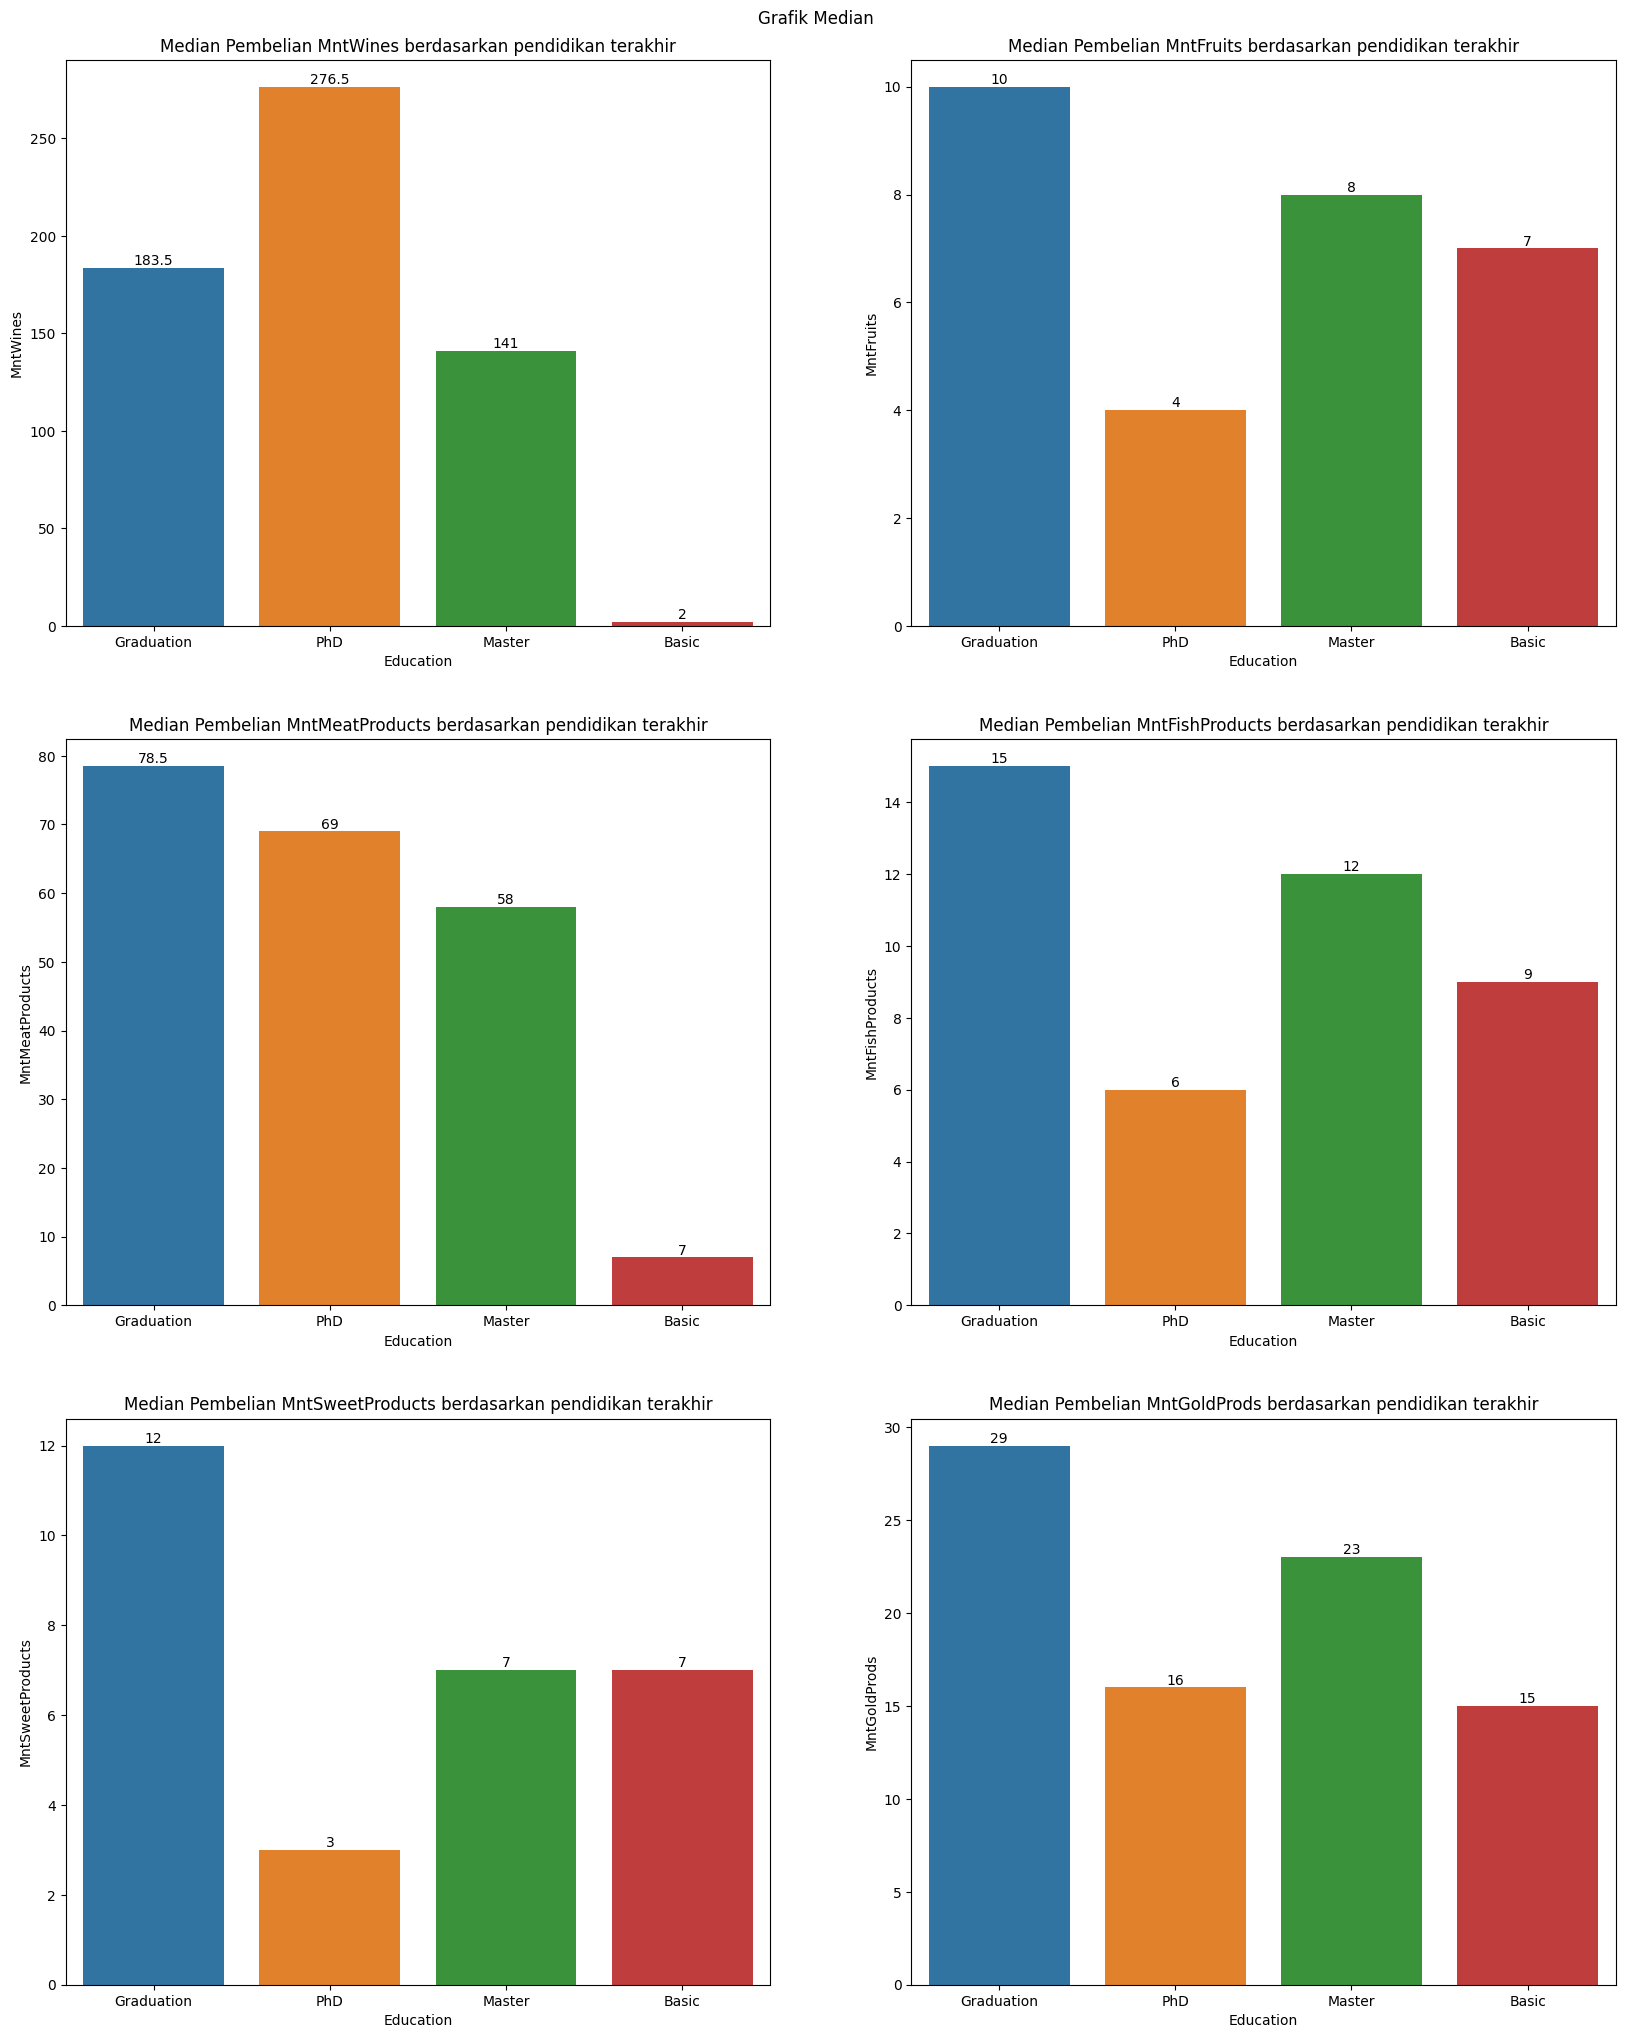

In [72]:
# informasi total pembelian setiap produk berdasarkan tingkat pendidikan dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='Education', y = list_product[id], ci=0, estimator='median')
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan pendidikan terakhir')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Berdasarkan grafik diatas, kita bisa mengambil kesimpulan bahwa:

- Setelah dilakukan uji hipotesis, median semua status pernikahan terhadap pembelian produk berbeda signifikan sehingga perlu menjadi perhatian khusus

- MntWines : paling banyak dibeli oleh pelanggan dengan pendidikan akhir PhD dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir basic dengan perbedaan median sekitar 138 kali lipat. Berdasarkan common sense, pelanggan dengan pendidikan akhir PhD mungkin mempunyai tingkat stress yang tinggi sehingga membutuhkan wine sebagai pereda stress.

- MntFruits : paling banyak dibeli oleh pelanggan dengan pendidikan akhir Graduation dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir PhD dengan perbedaan median sekitar 2.5 kali lipat

- MntMeatProducts : paling banyak dibeli oleh pelanggan dengan pendidikan akhir Graduation dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir Basic dengan perbedaan median sekitar 11 kali lipat

- MntFishProducts : paling banyak dibeli oleh pelanggan dengan pendidikan akhir Graduation dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir PhD dengan perbedaan median sekitar 2.5 kali lipat

- MntSweetProducts : paling banyak dibeli oleh pelanggan dengan pendidikan akhir Graduation dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir PhD dengan perbedaan median sekitar 4 kali lipat
    
- MntGoldProds : paling banyak dibeli oleh pelanggan dengan pendidikan akhir Graduation dan paling sedikit dibeli oleh pelanggan dengan pendidikan akhir Basic dengan perbedaan median sekitar 2 kali lipat

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median semua jenjang akhir pendidikan terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [73]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Education'] == 'Basic'][i],
        df[df['Education'] == 'Graduation'][i],
        df[df['Education'] == 'Master'][i],
        df[df['Education'] == 'PhD'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk MntWines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk MntFruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk MntMeatProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk MntFishProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk MntSweetProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidika

### **Minat Produk berdasarkan `Income_Class`**

#### **Income Class pelanggan yang paling konsumtif**

In [74]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan Income Class
df_total_spent_income = df.groupby('Income_Class')[['Total_Spent']].median().reset_index()
df_total_spent_income.sort_values('Total_Spent', ascending=False)

,Income_Class,Total_Spent
1,Middle,1049.0
2,Upper,857.5
0,Low,73.0


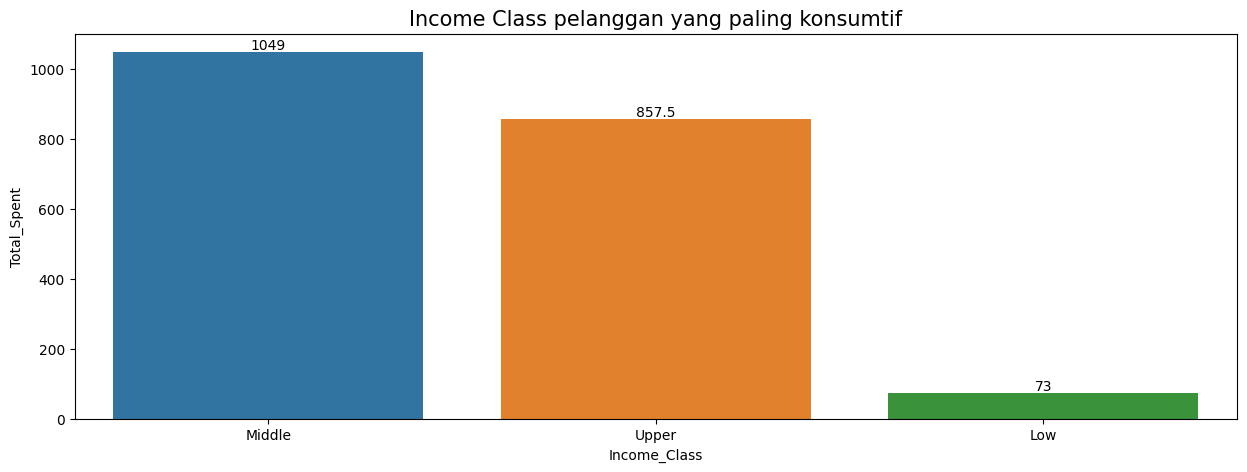

In [158]:
# informasi pelanggan dengan Income Class paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Income Class pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_income, x='Income_Class', y='Total_Spent', order=df_total_spent_income.sort_values('Total_Spent', ascending=False).Income_Class)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Income Class Middle menjadi yang paling konsumtif disusul dengan Income Class Upper dengan selisih median 195 dollar
- Income Class Low menjadi yang paling tidak konsumtif dengan median 72 dollar

### **Minat beli produk berdasarkan Income Class**

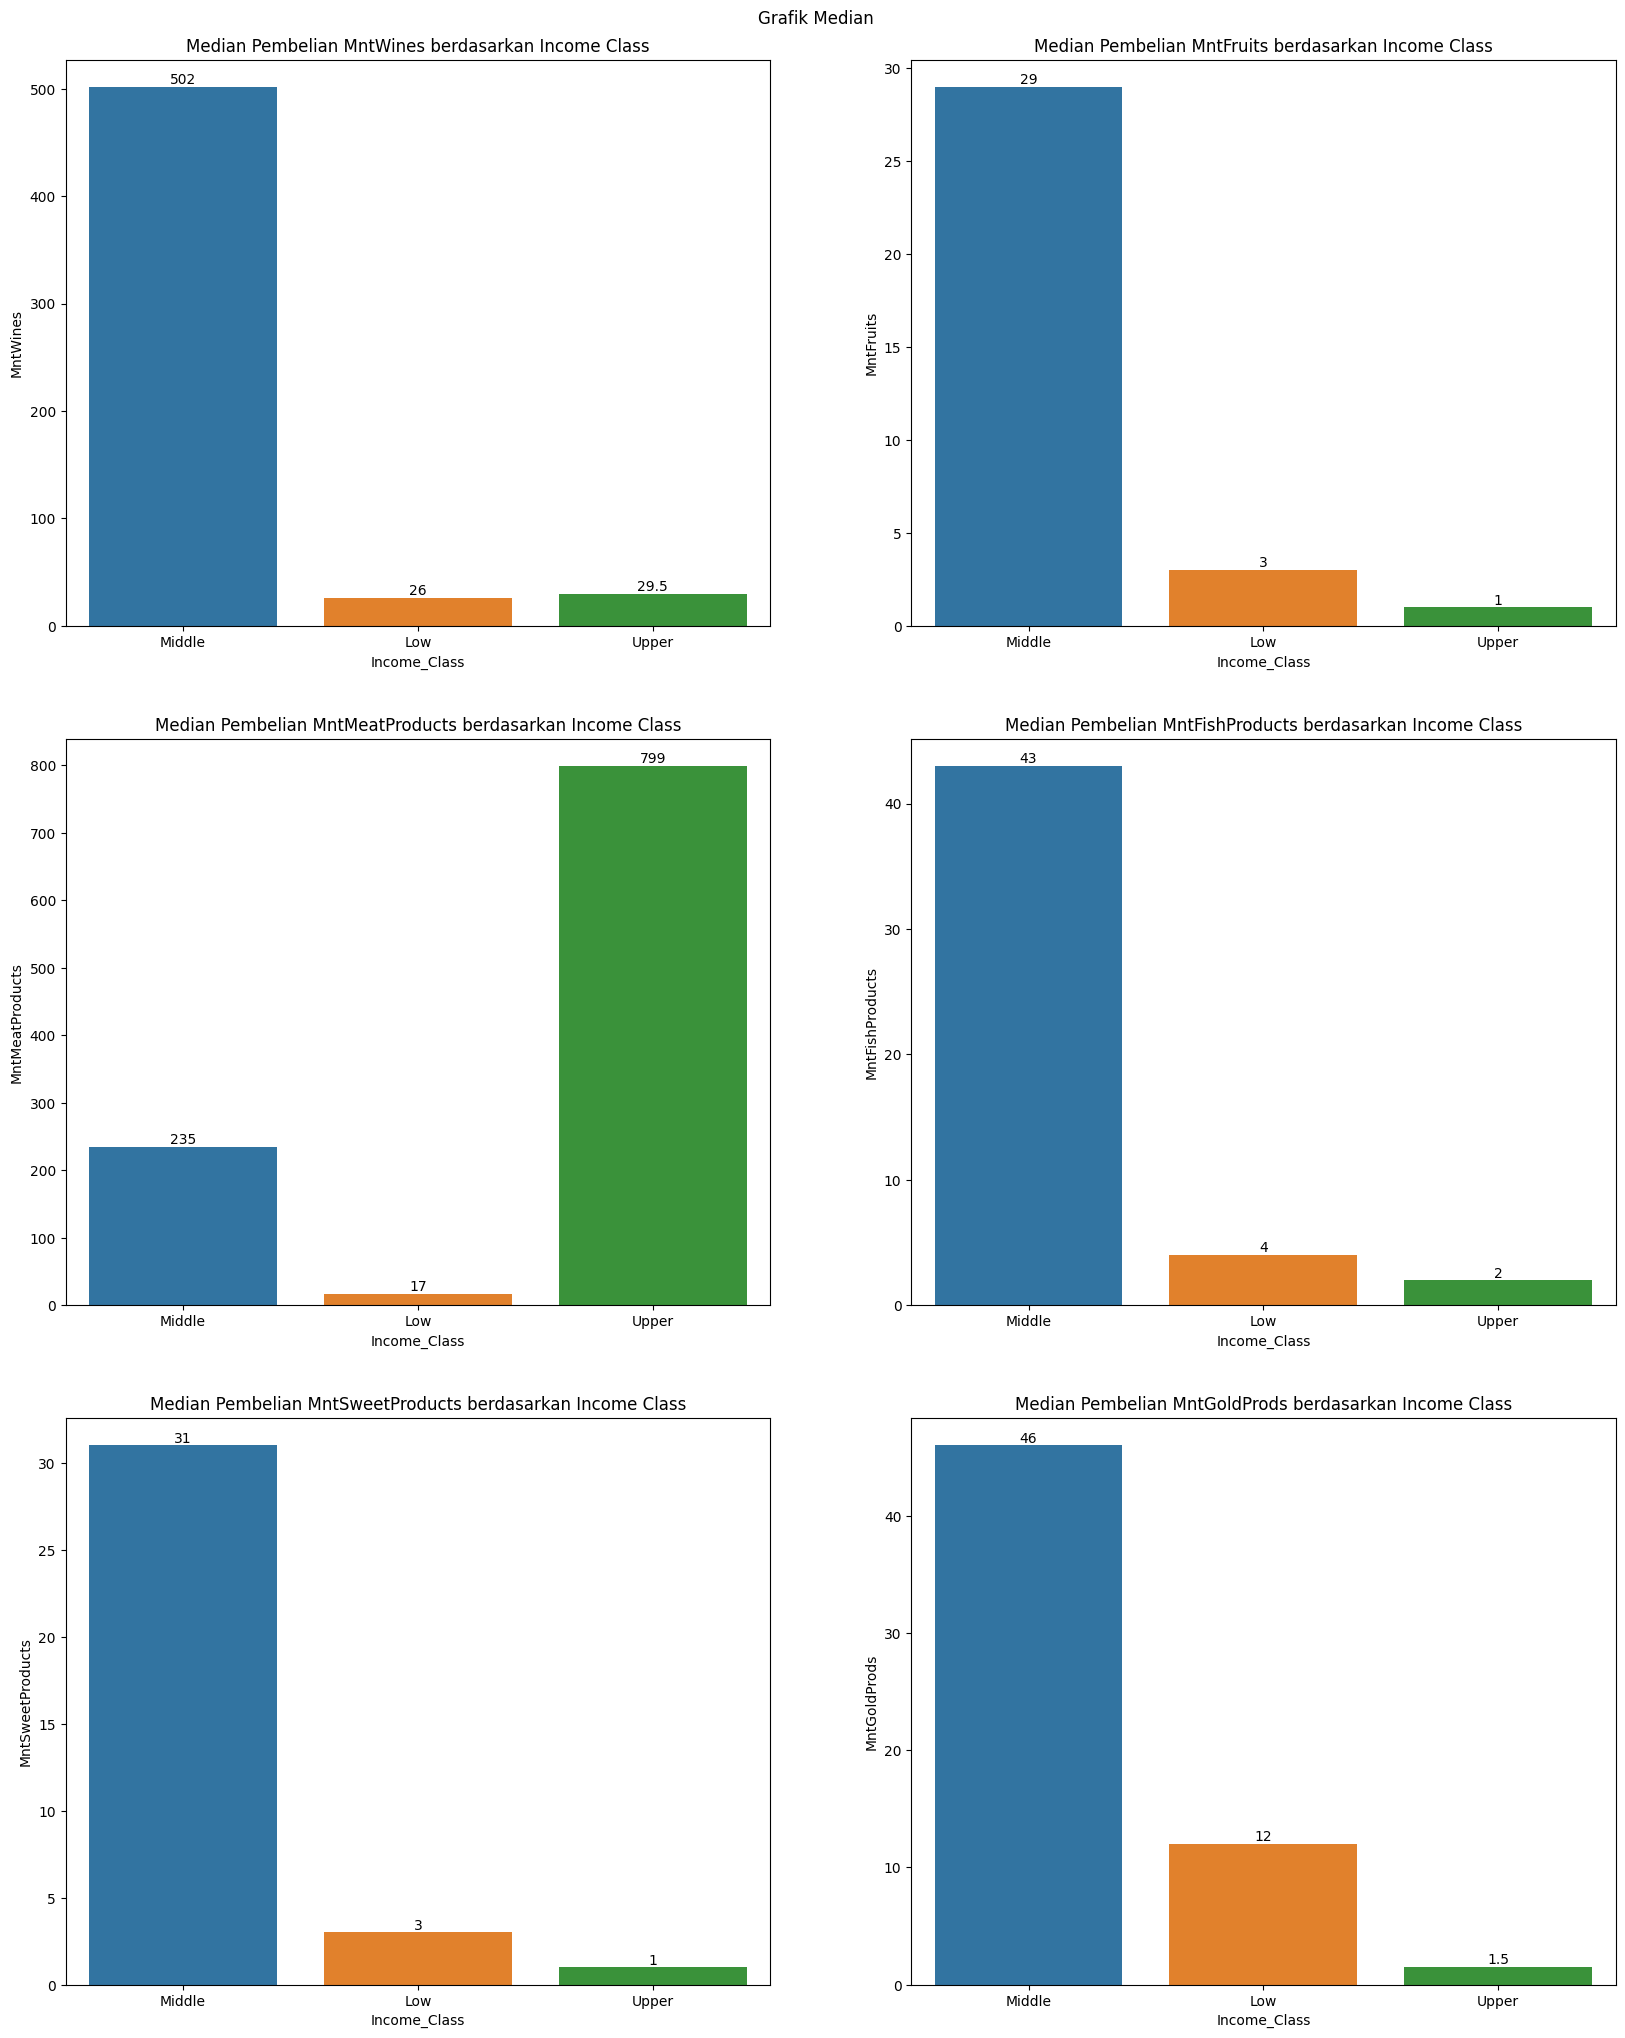

In [76]:
# informasi total pembelian setiap produk berdasarkan Income Class dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='Income_Class', y = list_product[id], ci=0, estimator='median')
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Income Class')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Berdasarkan grafik diatas, kita bisa mengambil kesimpulan bahwa:

- Setelah dilakukan uji hipotesis, median semua status pernikahan terhadap pembelian produk berbeda signifikan sehingga perlu menjadi perhatian khusus

- MntWines : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class low dengan perbedaan median sekitar 17 kali lipat.

- MntFruits : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper dengan perbedaan median sekitar 22 kali lipat

- MntMeatProducts : paling banyak dibeli oleh pelanggan dengan Income_Class Upper dan paling sedikit dibeli oleh pelanggan dengan Income_Class Low dengan perbedaan median sekitar 47 kali lipat

- MntFishProducts : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper dengan perbedaan median sekitar 22 kali lipat

- MntSweetProducts : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper dengan perbedaan median sekitar 31 kali lipat
    
- MntGoldProds : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper dengan perbedaan median sekitar 30 kali lipat

### **Minat Produk berdasarkan `Income`**

Secara singkat, kita bisa mengetahui bahwa semua kolom diatas tidak terdistribusi normal, sehingga untuk menemukan korelasinya, kita akan menggunakan *spearman* sebagai method

In [77]:
# membuat variable baru yang berisi korelasi setiap kolom produk dengan income dan total pembelian
df_corr = df[['Total_Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income']].corr('spearman')
df_corr

,Total_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income
Total_Spent,1.000000,0.927024,0.682610,0.939364,0.695662,0.670086,0.692425,0.848700
MntWines,0.927024,1.000000,0.517886,0.823589,0.524688,0.505221,0.575243,0.829286
MntFruits,0.682610,0.517886,1.000000,0.713340,0.705022,0.691666,0.568844,0.579090
MntMeatProducts,0.939364,0.823589,0.713340,1.000000,0.726275,0.695719,0.637759,0.814167
MntFishProducts,0.695662,0.524688,0.705022,0.726275,1.000000,0.700979,0.565239,0.574921
MntSweetProducts,0.670086,0.505221,0.691666,0.695719,0.700979,1.000000,0.542869,0.564965
MntGoldProds,0.692425,0.575243,0.568844,0.637759,0.565239,0.542869,1.000000,0.504122
Income,0.848700,0.829286,0.579090,0.814167,0.574921,0.564965,0.504122,1.000000


In [78]:
matriks = np.triu(df_corr)
matriks

array([[1.        , 0.92702411, 0.68261002, 0.93936371, 0.69566179,
        0.67008559, 0.69242457, 0.84869968],
       [0.        , 1.        , 0.51788641, 0.82358868, 0.52468787,
        0.50522101, 0.57524331, 0.82928589],
       [0.        , 0.        , 1.        , 0.71333971, 0.70502165,
        0.69166641, 0.56884355, 0.57908981],
       [0.        , 0.        , 0.        , 1.        , 0.72627527,
        0.69571871, 0.63775884, 0.81416707],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.70097935, 0.56523925, 0.57492072],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.5428685 , 0.56496461],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.504122  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

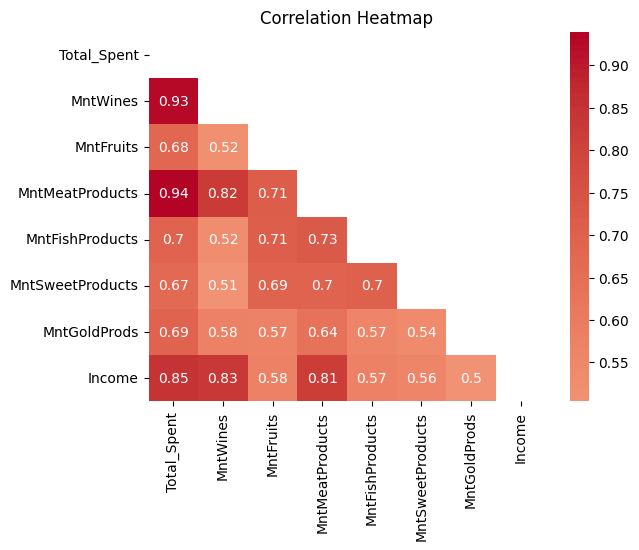

In [79]:
# informasi korelasi setiap kolom produk dengan income dan total pembelian dalam bentuk heatmap
sns.heatmap(data = df_corr, annot=True, cmap='coolwarm', center=0, mask=matriks)

plt.title('Correlation Heatmap')
plt.show()

Dari Heatmap diatas, kita bisa mengambil kesimpulan berupa :

- `Income` memiliki korelasi positif terhadap `Total_Spent`. Artinya semakin tinggi income, maka uang yang dikeluarkan untuk membeli suatu produk semakin banyak.
- Berdasarkan `Income`, produk yang memiliki korelasi positif dan kuat adalah produk wine dan daging.

### **Minat Produk berdasarkan `Kidhome`**

#### **Jumlah anak kecil di rumah pelanggan yang paling konsumtif**

In [80]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan jumlah anak kecil
df_total_spent_kid = df.groupby('Kidhome')[['Total_Spent']].median().reset_index()
df_total_spent_kid.sort_values('Total_Spent', ascending=False)

,Kidhome,Total_Spent
0,0,904.0
1,1,72.0
2,2,65.5


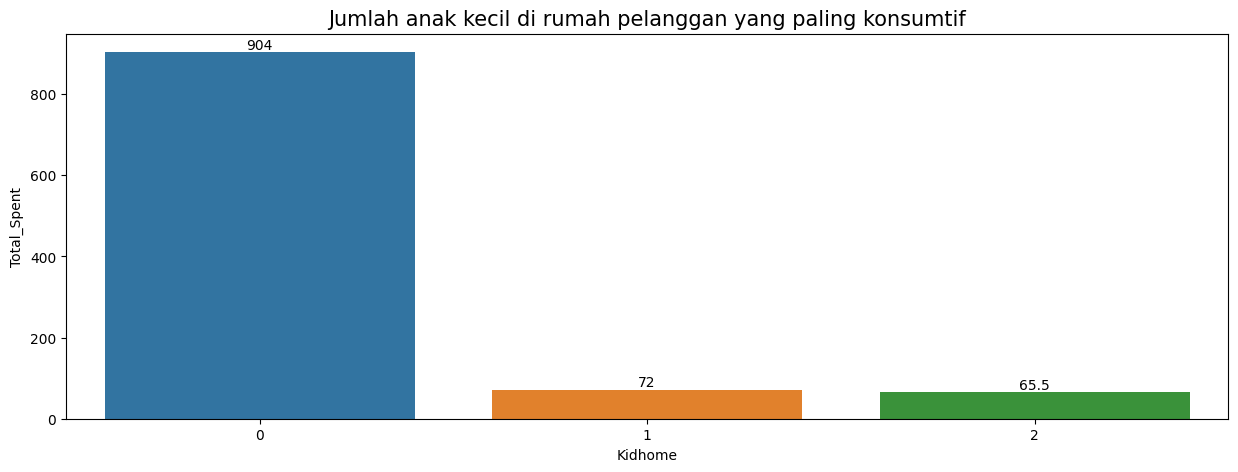

In [81]:
# informasi pelanggan dengan jumlah anak kecil paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Jumlah anak kecil di rumah pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_kid, x='Kidhome', y='Total_Spent', order=df_total_spent_kid.sort_values('Total_Spent', ascending=False).Kidhome)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Pelanggan yang tidak mempunyai anak kecil menjadi yang paling konsumtif dengan median 904 dollar
- pelanggan yang mempunyai anak kecil menjadi yang paling tidak konsumtif baik 1 anak kecil maupun 2 anak kecil dan berdasarkan uji hipotesis, mediannya tidak berbeda signifikan

Uji Hipotesi Mann-Whitney
Hipotesis :

- Ho : Median 1 anak kecil = median 2 anak kecil
- Ha : Median 1 anak kecil != median 2 anak kecil

In [82]:
# uji hipotesis mann_whitney
stat, pvalue = mannwhitneyu(
    df_total_spent_kid[df_total_spent_kid['Kidhome'] == 1]['Total_Spent'],
    df_total_spent_kid[df_total_spent_kid['Kidhome'] == 2]['Total_Spent'],
    alternative = 'two-sided'
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    (Mediannya TIDAK berbeda signifikan)
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    (Mediannya berbeda signifikan)
    ''') 


    pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    (Mediannya TIDAK berbeda signifikan)
    


### **Minat beli produk berdasarkan jumlah anak kecil**

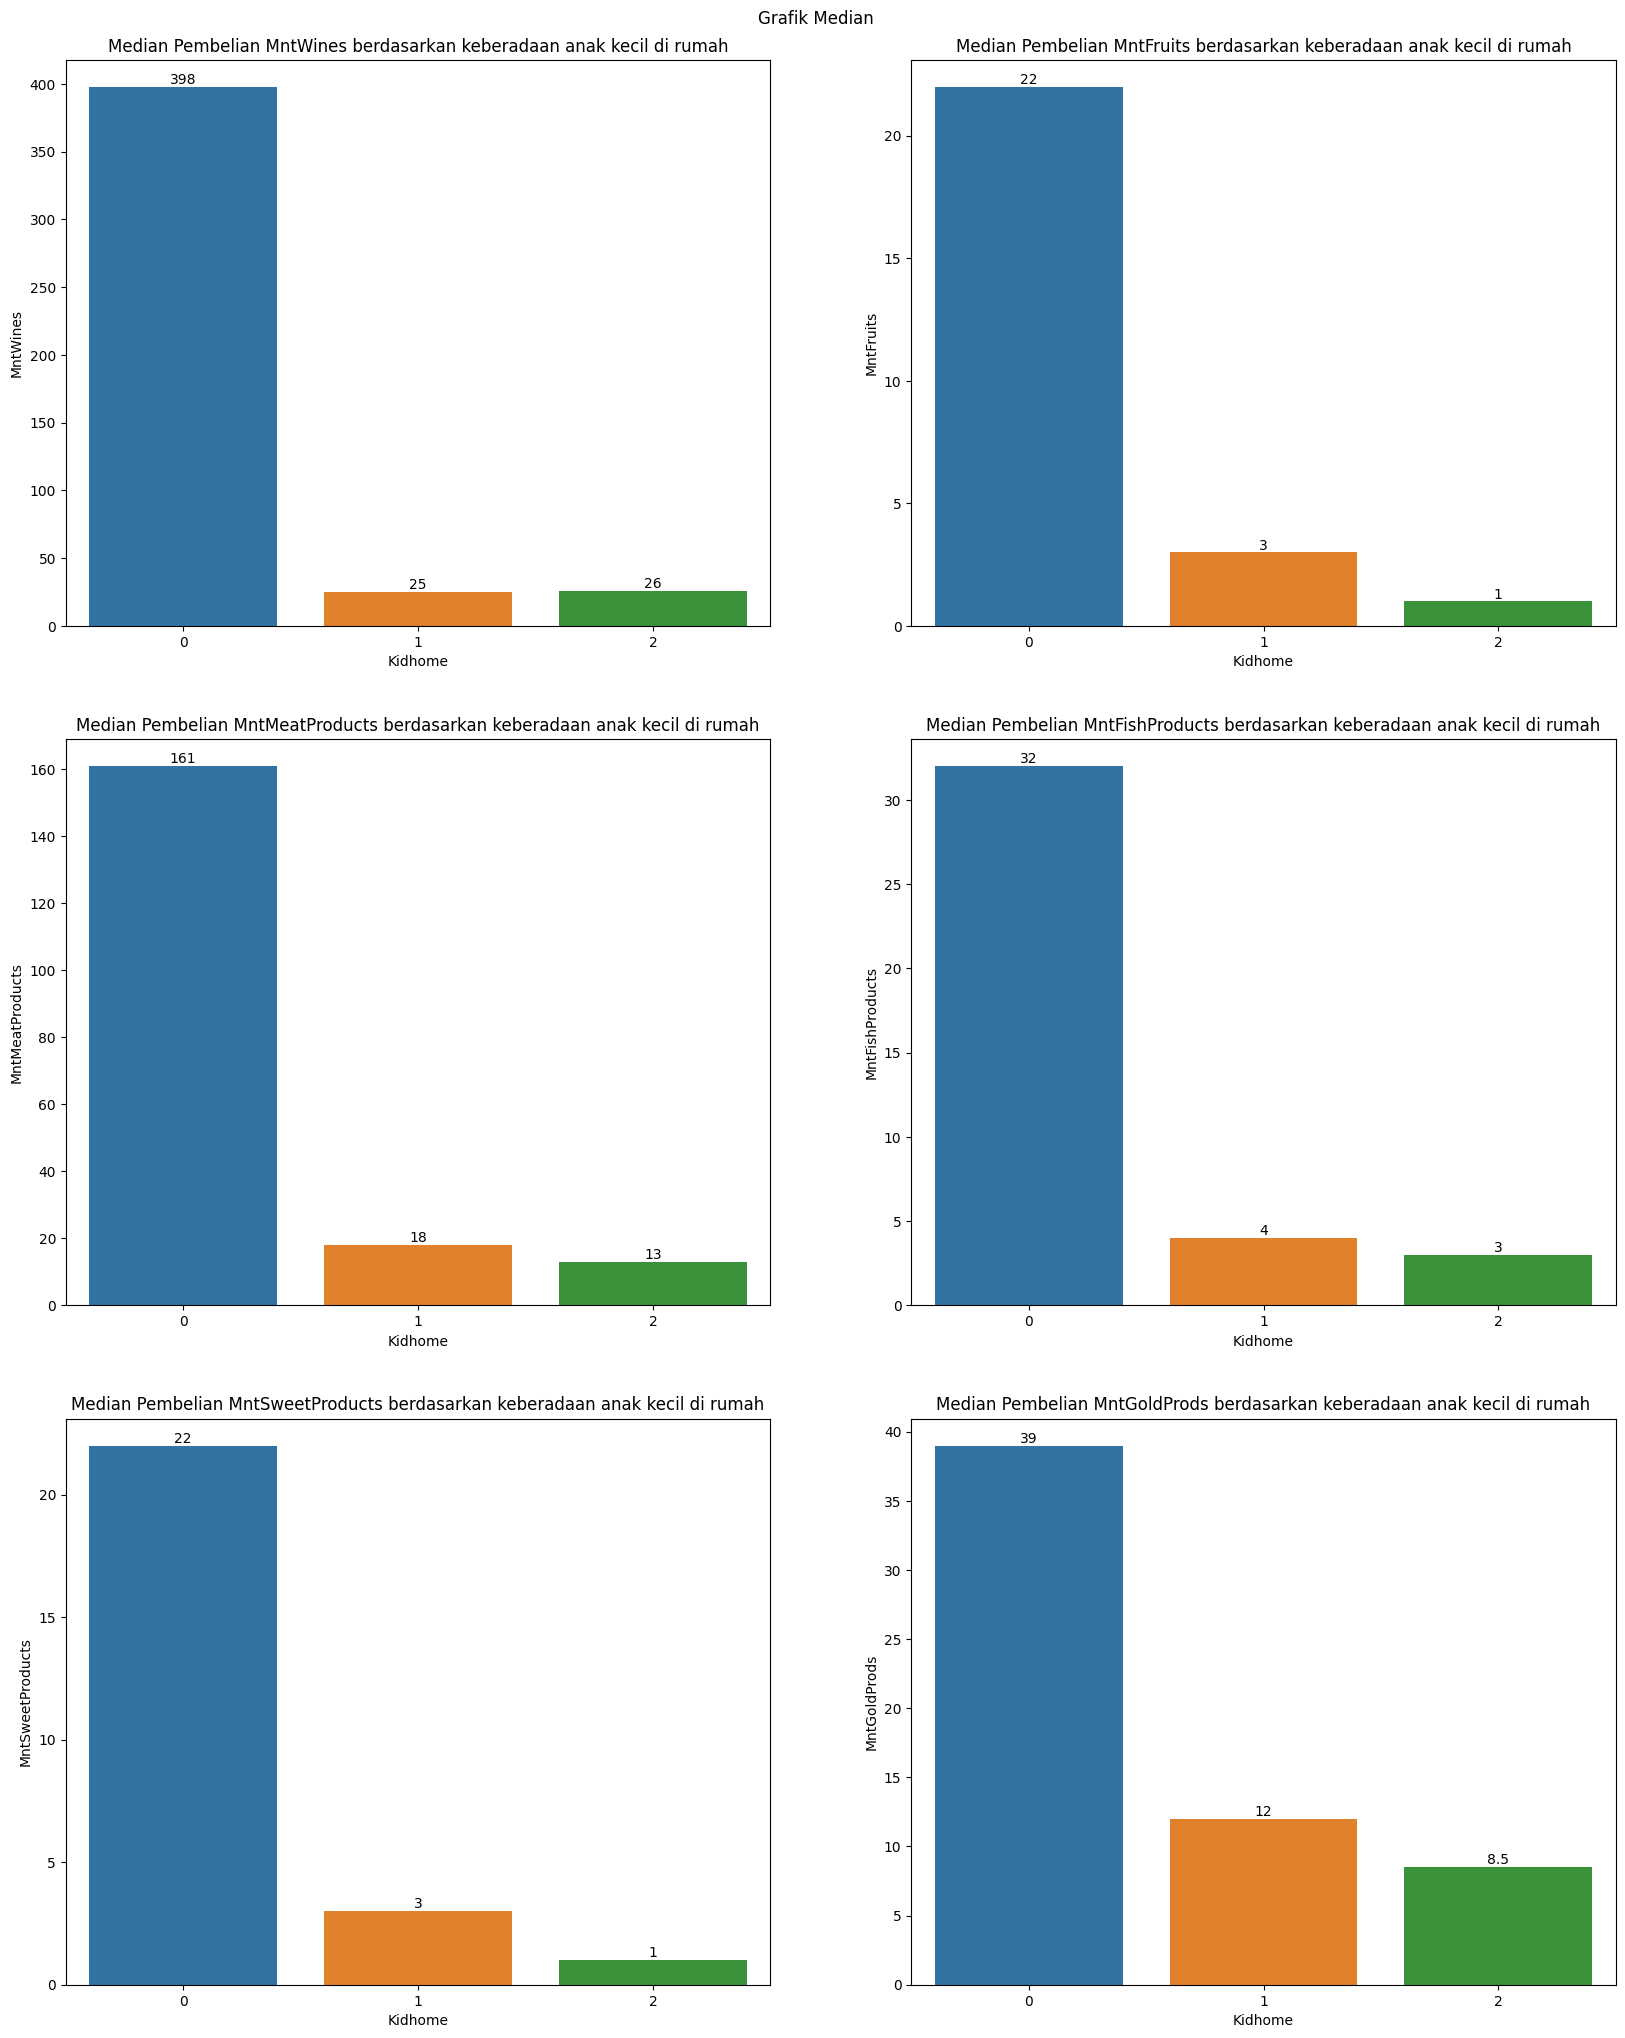

In [83]:
# informasi total pembelian setiap produk berdasarkan jumlah anak kecil dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='Kidhome', y = list_product[id], ci=0, estimator='median')
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan keberadaan anak kecil di rumah')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

Tidak Mempunyai anak kecil di rumah:

- Pelanggan yang tidak mempunyai anak kecil cenderung lebih konsumtif terhadap seluruh produk daripada pelanggan yang tinggal bersama anak kecil di rumahnya

Mempunyai anak kecil di rumah:

- Produk wine paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 1 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

- Produk buah-buahan paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 2 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk daging paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 5 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

- Produk ikan paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 1 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

- Produk manis paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 2 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk emas paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil dengan selisih 3.5 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median jumlah anak kecil terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [84]:
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Kidhome'] == 1][i],
        df[df['Kidhome'] == 2][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.89452. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk MntWines TIDAK berbeda signifikan       
    

    pvalue = 0.00213. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk MntFruits berbeda signifikan
    

    pvalue = 0.08691. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk MntMeatProducts TIDAK berbeda signifikan       
    

    pvalue = 0.05876. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk MntFishProducts TIDAK berbeda signifikan       
    

    pvalue = 0.00391. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk MntSweetProducts berbeda signifikan
    

    pvalue = 0.09853. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian pr

### **Minat Produk berdasarkan `Teenhome`**

#### **Jumlah anak remaja di rumah pelanggan yang paling konsumtif**

In [85]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan jumlah anak remaja
df_total_spent_teen = df.groupby('Teenhome')[['Total_Spent']].median().reset_index()
df_total_spent_teen.sort_values('Total_Spent', ascending=False)

,Teenhome,Total_Spent
2,2,458.5
1,1,395.0
0,0,382.0


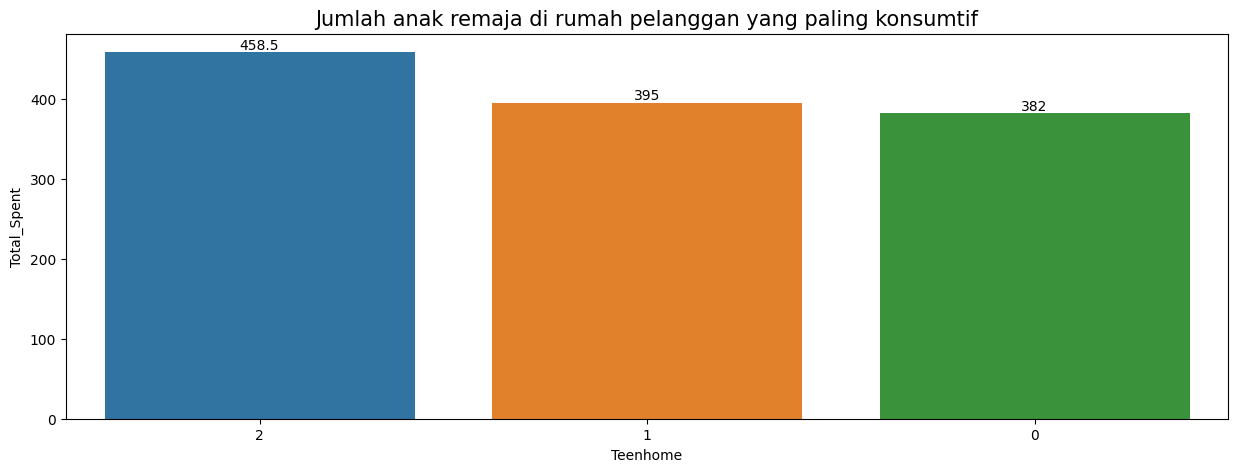

In [86]:
# informasi pelanggan dengan jumlah anak remaja paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Jumlah anak remaja di rumah pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_teen, x='Teenhome', y='Total_Spent', order=df_total_spent_teen.sort_values('Total_Spent', ascending=False).Teenhome)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Pelanggan yang mempunyai 2 anak remaja di rumahnya menjadi yang paling konsumtif dengan median total pembelian 458.5 dollar
- pelanggan yang mempunyai 1 anak remaja dan tidak mempunyai anak remaja menjadi yang paling tidak konsumtif berdasarkan uji hipotesis, mediannya tidak berbeda signifikan

Uji Hipotesi Mann-Whitney
Hipotesis :

- Ho : Median 1 anak remaja = median 2 anak remaja
- Ha : Median 1 anak remaja != median 2 anak remaja

In [87]:
stat, pvalue = mannwhitneyu(
    df_total_spent_teen[df_total_spent_teen['Teenhome'] == 1]['Total_Spent'],
    df_total_spent_teen[df_total_spent_teen['Teenhome'] == 2]['Total_Spent'],
    alternative = 'two-sided'
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    (Mediannya TIDAK berbeda signifikan)
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    (Mediannya berbeda signifikan)
    ''') 


    pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    (Mediannya TIDAK berbeda signifikan)
    


### **Minat beli produk berdasarkan jumlah anak remaja**

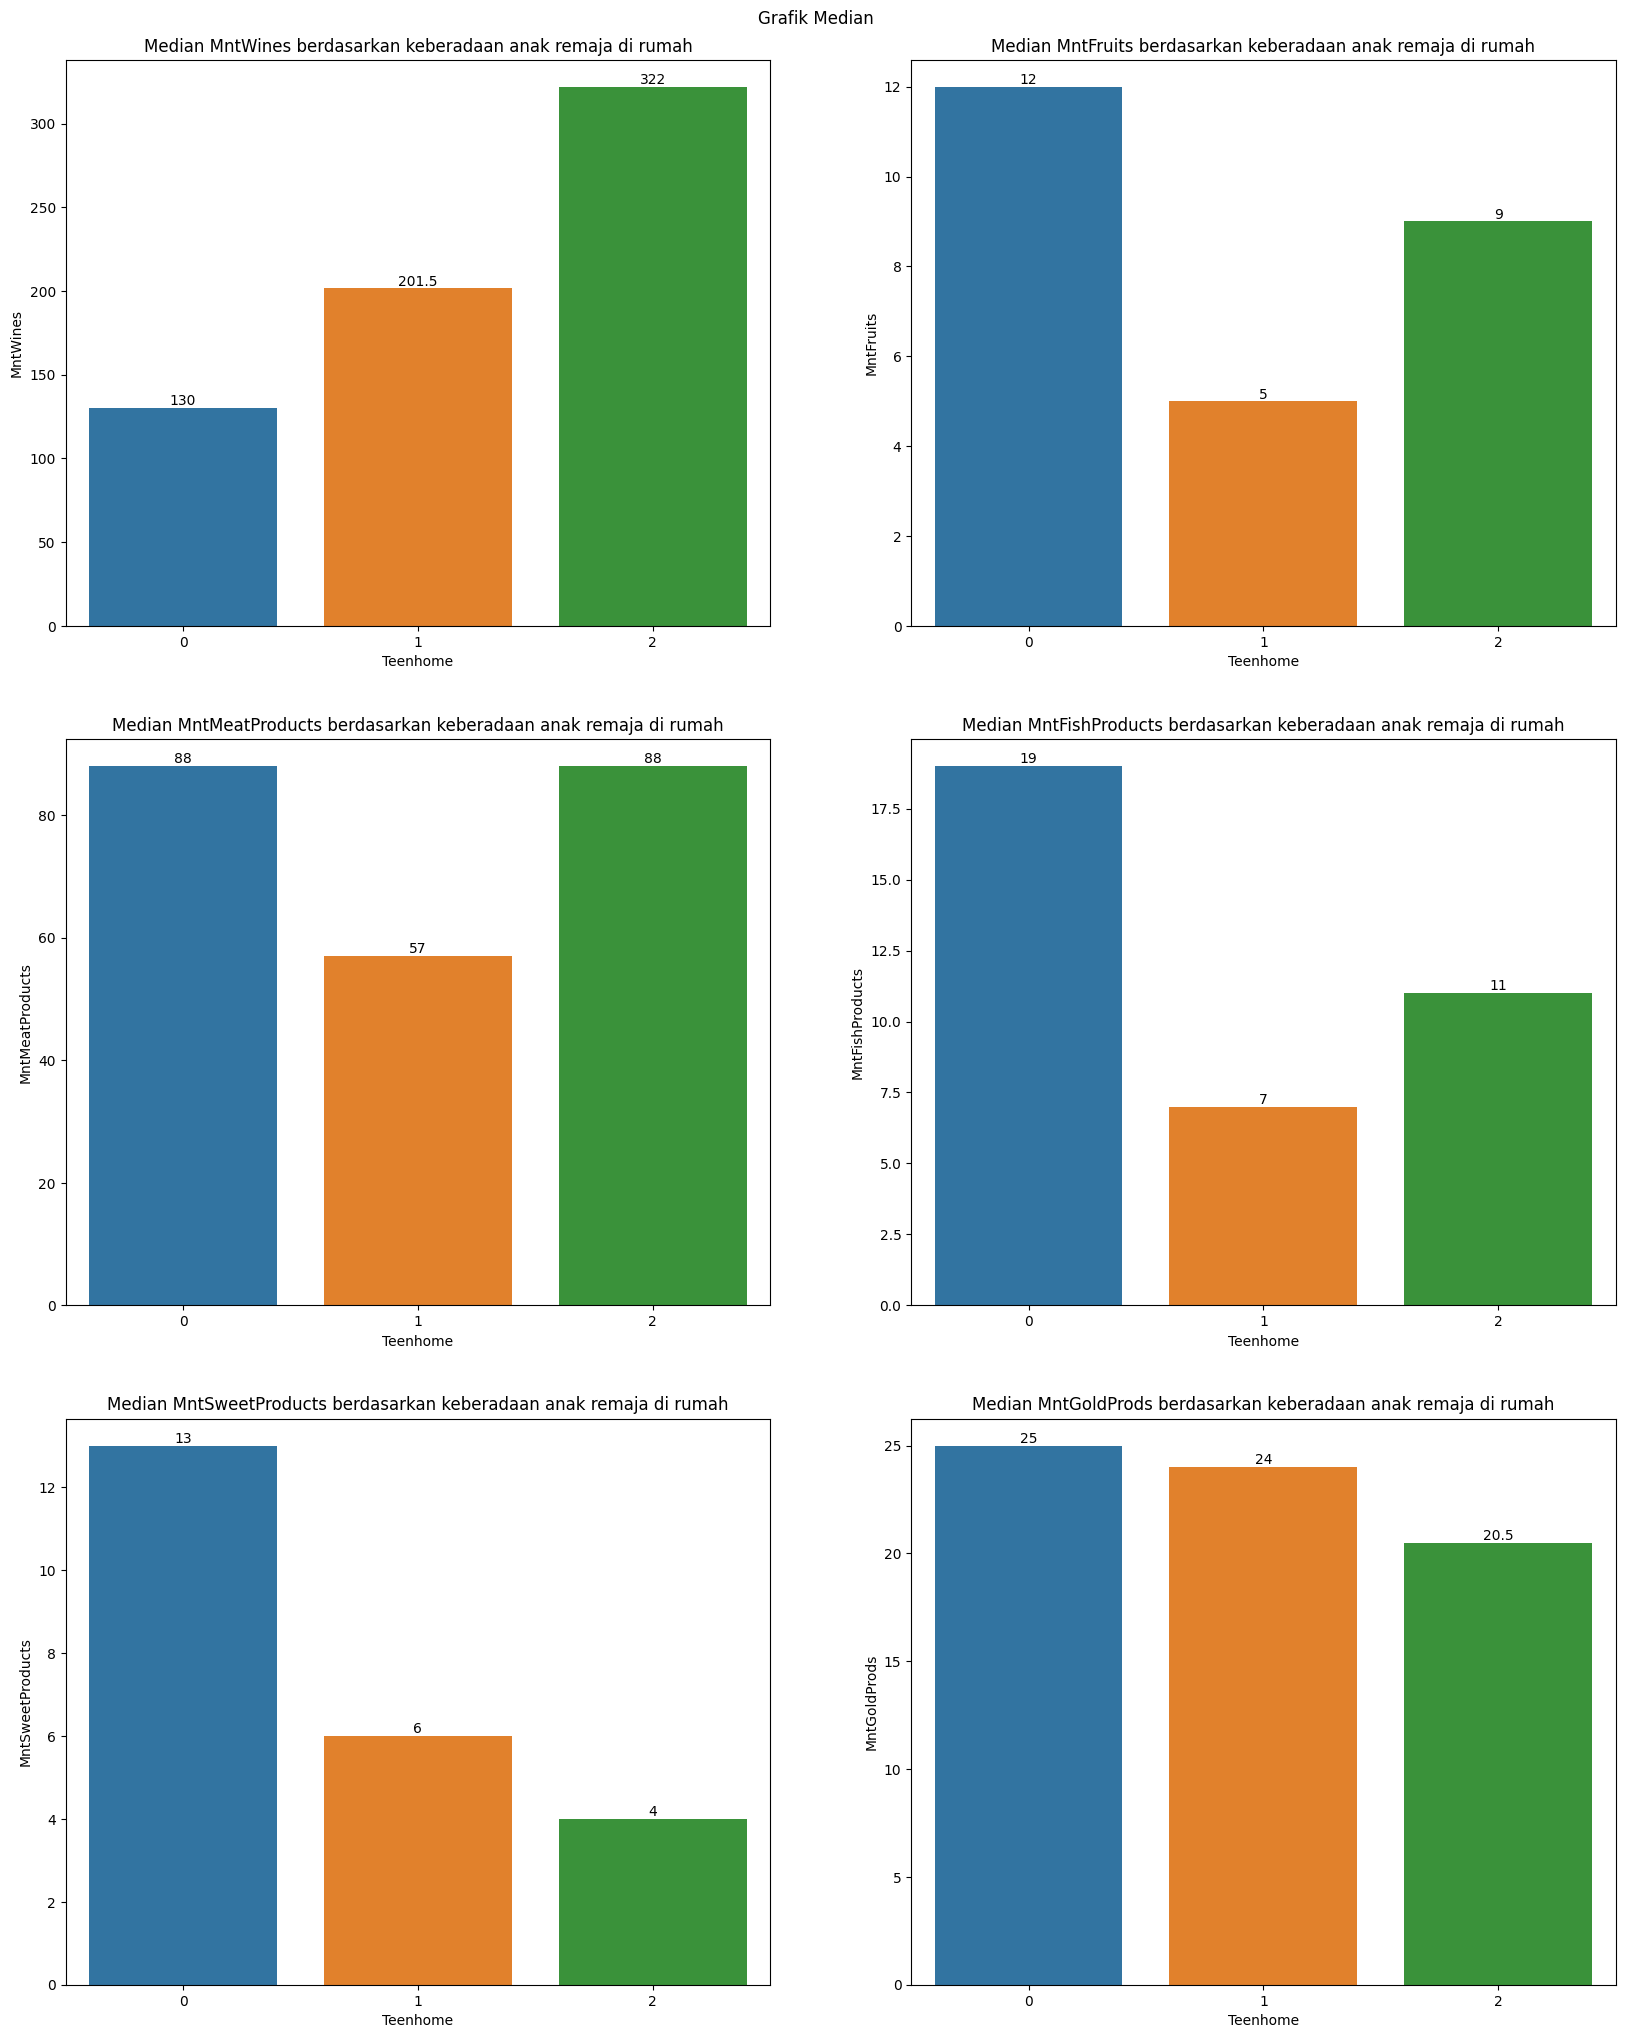

In [88]:
# informasi total pembelian setiap produk berdasarkan jumlah anak remaja dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,25))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='Teenhome', y = list_product[id], ci=0, estimator='median')
        plt.title(f'Median {list_product[id]} berdasarkan keberadaan anak remaja di rumah')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:


- Produk wine paling banyak dibeli oleh pelanggan yang tinggal bersama 2 anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tidak tinggal bersama anak remaja dengan selisih 192 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk buah-buahan paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja dengan selisih 7 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk daging paling banyak dibeli oleh pelanggan yang tinggal bersama 2 anak remaja dan pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja dengan selisih 31 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk ikan paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja dengan selisih 1 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

- Produk manis paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak remaja dengan selisih 12 dollar. Berdasarkan hasil uji hipotesis, mediannya berbeda signifikan.

- Produk emas paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak remaja dengan selisih 3.5 dollar. Berdasarkan hasil uji hipotesis, mediannya tidak berbeda signifikan.

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median jumlah anak remaja terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [89]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Teenhome'] == 0][i],
        df[df['Teenhome'] == 1][i],
        df[df['Teenhome'] == 2][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak remaja di rumah terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk MntWines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk MntFruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk MntMeatProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk MntFishProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk MntSweetProducts berbeda signifikan
    

    pvalue = 0.55283. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak remaja di rumah terhadap minat pembelian pr

### **Manakah pelanggan yang lebih konsumtif? tinggal sendiri/bersama?**

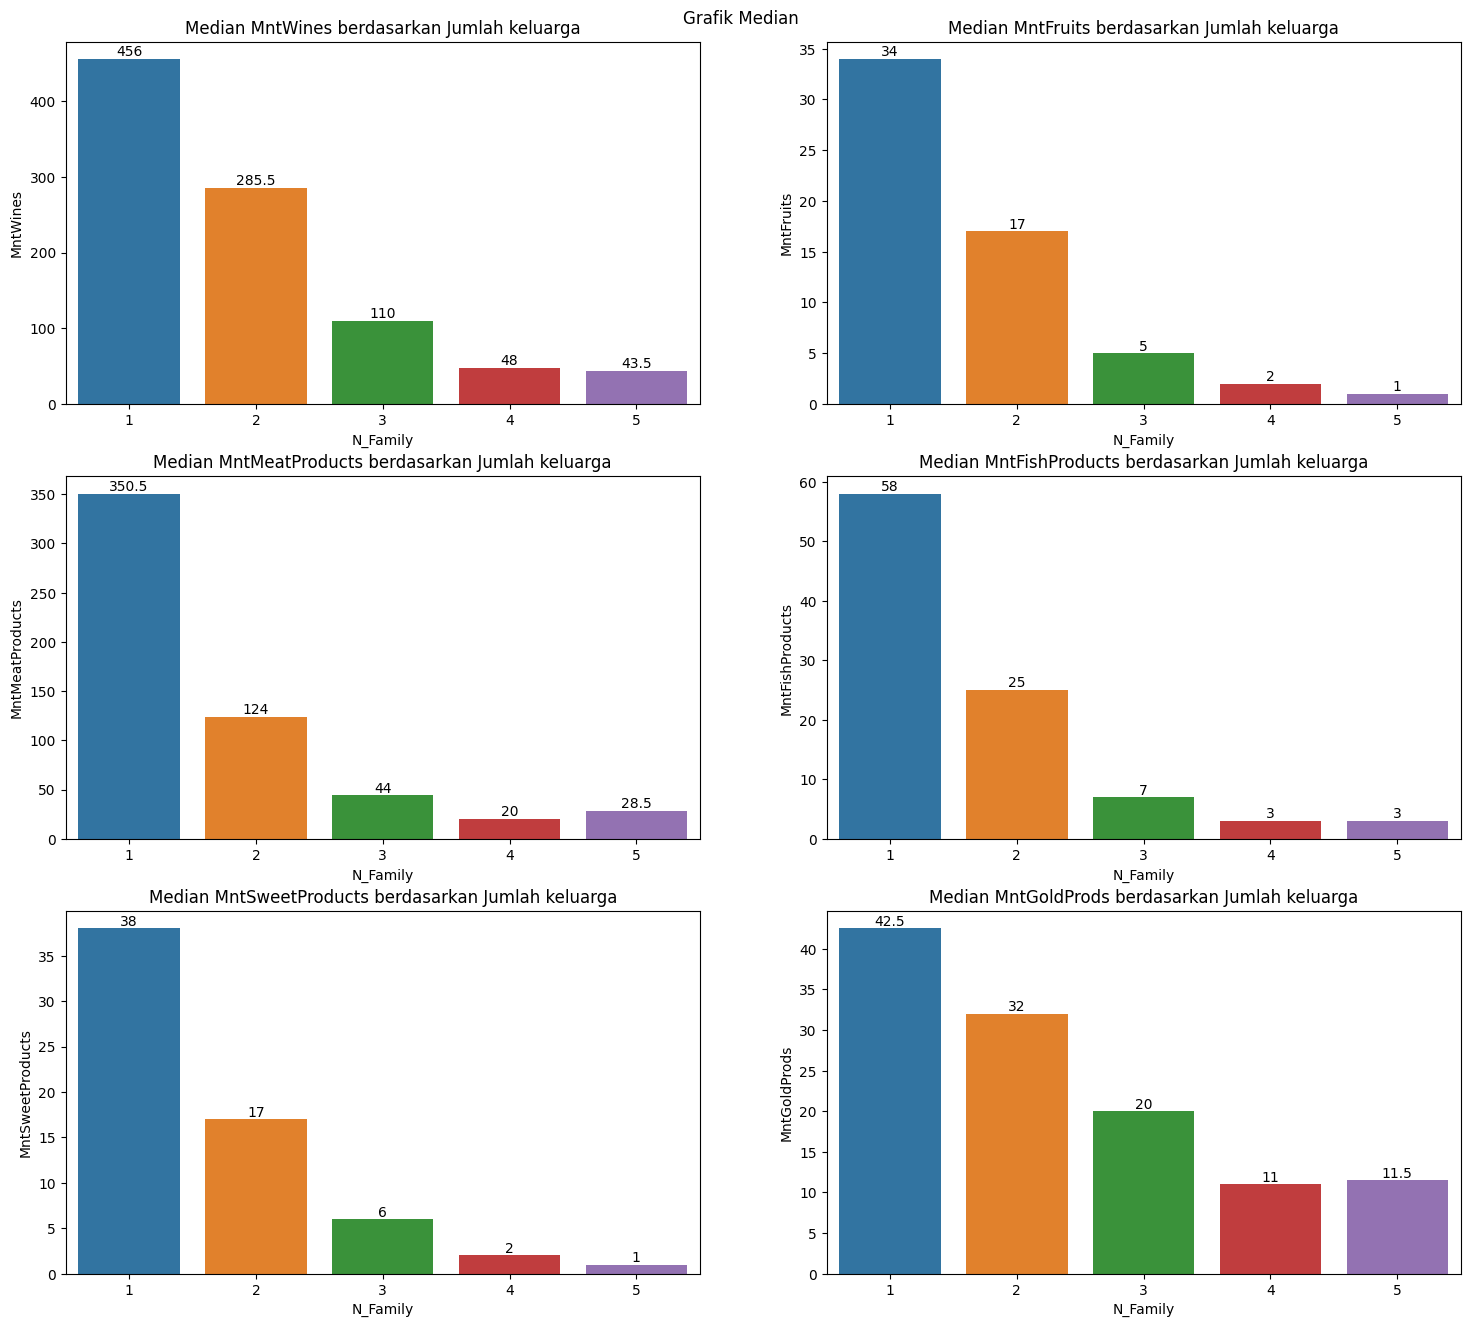

In [90]:
# informasi total pembelian setiap produk berdasarkan jumlah anggota keluarga dalam bentuk barplot
list_product = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(18,16))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df, x='N_Family', y = list_product[id], ci=0, estimator = 'median')
        plt.title(f'Median {list_product[id]} berdasarkan Jumlah keluarga')
        id += 1
        for i in ax.containers:
            ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.9)
plt.show()

Dari grafik diatas, kita bisa menarik kesimpulan bahwa:

- Setelah dilakukan uji hipotesis, median jumlah anggota keluarga terhadap pembelian produk berbeda signifikan sehingga perlu menjadi perhatian khusus
- Pelanggan yang tinggal sendiri cenderung lebih konsumtif dibandingkan dengan yang tinggal bersama
- Semakin banyak anggota keluarga, semakin rendah minat beli terhadap produk

Notes : Karena beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda, maka akan dilakukan uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak

Hipotesis :

- Ho : Median jumlah anggota keluarga terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [91]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['MntWines', 'MntFruits', 'MntMeatProducts',	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['N_Family'] == 1][i],
        df[df['N_Family'] == 2][i],
        df[df['N_Family'] == 3][i],
        df[df['N_Family'] == 4][i],
        df[df['N_Family'] == 5][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anggota keluarga terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntWines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntFruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntMeatProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntFishProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntSweetProducts berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk MntGoldP

## **Kesimpulan Analisis Produk**

- Pelanggan paling banyak membeli produk wine (680029 dollar) dan daging (373375 dollar) dalam 2 tahun terakhir
- Pelanggan paling sedikit membeli produk manisan (60552 dollar) dan buah-buahan (58753 dollar) dalam 2 tahun terakhir

- Berdasarkan rentang usia :
    - rentang usia 73-83 menjadi yang paling konsumtif disusul dengan rentang usia 62-72 dengan selisih median 453 dollar
    - rentang usia 96 tahun keatas menjadi yang paling tidak konsumtif dengan median hanya 65 dollar
<br><br>
- Berdasarkan status pernikahan :
    - Pelanggan yang bercerai menjadi yang paling konsumtif disusul dengan pelanggan yang menikah dengan selisih median 101 dollar
    - Pelanggan yang masih single menjadi yang paling tidak konsumtif dengan median 369 dollar
<br><br>
- Berdasarkan tingkat pendidikan :
    - Tingkat pendidikan PhD menjadi yang paling konsumtif disusul dengan Graduation dengan selisih median 78.5 dollar
    - Tingkat pendidikan Basic menjadi yang paling tidak konsumtif dengan median 57 dollar
<br><br>
- Berdasarkan Income Class :
    - Income Class Middle menjadi yang paling konsumtif disusul dengan Income Class Upper dengan selisih median 195 dollar
    - Income Class Low menjadi yang paling tidak konsumtif dengan median 72 dollar
<br><br>
- Berdasarkan jumlah anak kecil :
    - Pelanggan yang tidak mempunyai anak kecil menjadi yang paling konsumtif dengan median 904 dollar
    - pelanggan yang mempunyai anak kecil menjadi yang paling tidak konsumtif baik 1 anak kecil maupun 2 anak kecil dan berdasarkan uji hipotesis, mediannya tidak berbeda signifikan
<br><br>
- Berdasarkan jumlah anak remaja :
    - Pelanggan yang mempunyai 2 anak remaja di rumahnya menjadi yang paling konsumtif dengan median total pembelian 458.5 dollar
    - pelanggan yang mempunyai 1 anak remaja dan tidak mempunyai anak remaja menjadi yang paling tidak konsumtif berdasarkan uji hipotesis, mediannya tidak berbeda signifikan
<br><br>
- Pelanggan yang tinggal sendiri lebih konsumtif dibandingkan dengan yang tinggal bersama
- Semakin banyak anggota keluarga, semakin rendah minat beli terhadap produk

## **Analisis Lanjutan Produk**

### **Pelanggan paling konsumtif terhadap produk wine**

Klasifikasi pelanggan yang paling konsumtif terhadap produk wine dilakukan dengan memfilter pelanggan yang tingkat pembelian terhadap produk winenya diatas *upper fence* atau merupakan pencilan.

In [92]:
# Q1, Q3
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)

# IQR = Q3 - Q1
IQR = Q3 - Q1
IQR

upper_fence = Q3 + 1.5 * IQR
upper_fence

1225.25

In [93]:
df_wine = df[df['MntWines']>upper_fence].sort_values('MntWines', ascending=False)
df_wine.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
1749,737,1949,65,62-72,PhD,Married,80360.0,Middle,0,0,2,2,2013-03-03,March,56,1493,86,454,112,43,43,2231,2,4,4,5,2,0,1,1,1,0,0,0,3
559,3174,1959,55,51-61,Graduation,Married,87771.0,Middle,0,1,2,3,2013-05-22,May,61,1492,38,287,50,57,33,1957,1,5,10,4,6,0,1,1,1,1,0,1,5
824,5536,1959,55,51-61,Graduation,Married,87771.0,Middle,0,1,2,3,2013-05-22,May,61,1492,38,287,50,57,33,1957,1,5,10,4,6,0,1,1,1,1,0,1,5
2098,1103,1976,38,29-39,Master,Married,81929.0,Middle,1,0,2,3,2012-09-29,September,60,1486,55,278,49,0,185,2053,2,4,4,10,6,1,0,1,0,0,0,1,3
543,5547,1982,32,29-39,PhD,Married,84169.0,Middle,0,0,2,2,2013-08-07,August,9,1478,19,403,0,19,0,1919,1,7,6,6,3,0,1,1,0,0,0,1,3


In [94]:
# Jumlah konsumen yang paling konsumtif terhadap wine
len(df_wine)

35

In [95]:
# Jumlah uang yang dikeluarkan untuk membeli wine oleh pelanggan yang paling konsumtif terhadap wine
df_wine['MntWines'].sum()

46958

In [96]:
# Jumlah uang yang dikeluarkan untuk membeli wine oleh semua pelanggan
df['MntWines'].sum()

680807

In [97]:
# Proporsi 
df_wine['MntWines'].sum() /df['MntWines'].sum() * 100

6.897402641277191

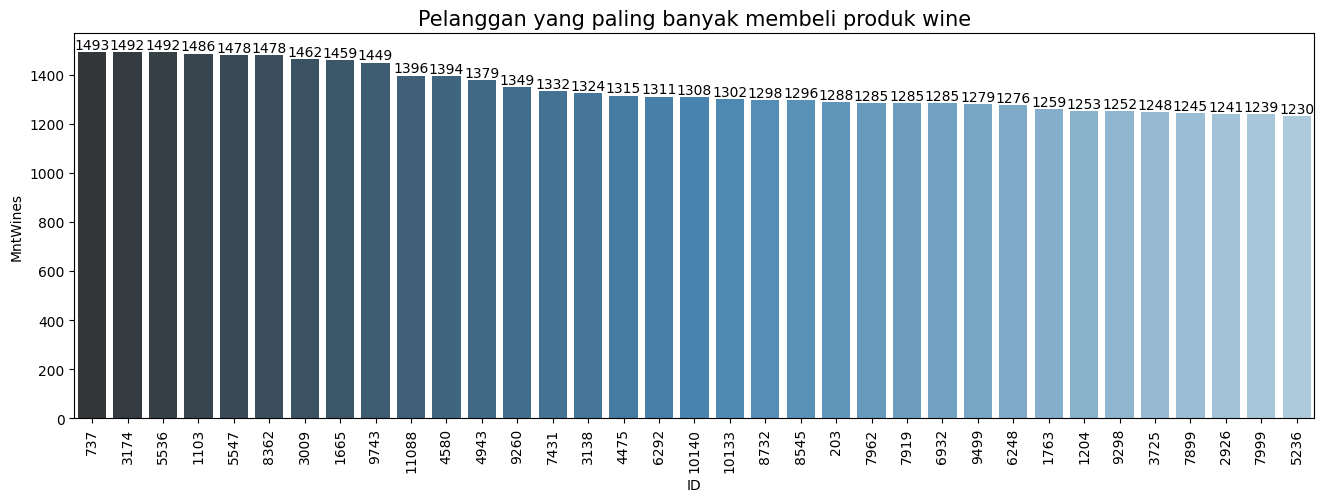

In [98]:
plt.figure(figsize=(16,5))
plt.title('Pelanggan yang paling banyak membeli produk wine', size=15)
ax = sns.barplot(
    data = df_wine, 
    x='ID', 
    y='MntWines', order=df_wine.sort_values('MntWines', ascending=False).ID,
    palette='Blues_r_d')
plt.xticks(rotation=90)
for i in ax.containers:
            ax.bar_label(i,)

- Grafik diatas menunjukan 35 pelanggan yang paling konsumtif terhadap wine dengan total spent terhadap wine sebesar 46958 dollar (sekitar 6.9% dari total pembelian wine) sehingga bisa menjadi target utama penawaran produk wine yang baru

### **Jumlah anggota keluarga dan total pembelian produk wine**

In [99]:
df_wine = df.groupby('N_Family')[['MntWines']].median().reset_index()
df_wine.sort_values('MntWines', ascending=False)

,N_Family,MntWines
0,1,456.0
1,2,285.5
2,3,110.0
3,4,48.0
4,5,43.5


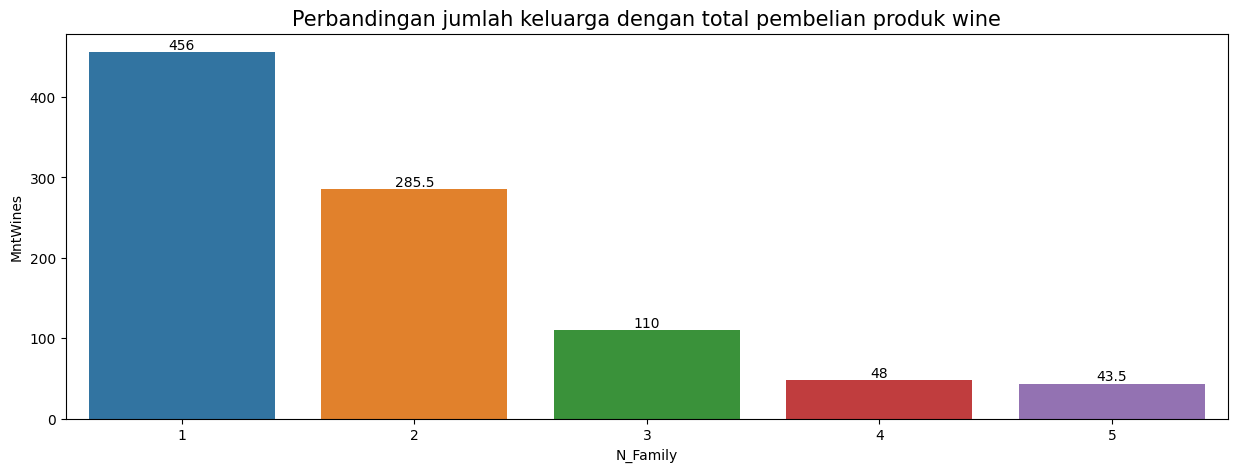

In [100]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan jumlah keluarga dengan total pembelian produk wine', size=15)
ax = sns.barplot(df_wine, x='N_Family', y='MntWines', order=df_wine.sort_values('MntWines', ascending=False).N_Family)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- semakin banyak anggota keluarga, pelanggan menjadi semakin tidak konsumtif terhadap produk wine

### **Minat pembelian produk wine berdasarkan `Teenhome` dan `Kidhome`**

In [101]:
df_wine = df[df['Teenhome']>=0]
df_wine.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
0,5524,1957,57,51-61,Graduation,Single,58138.0,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0


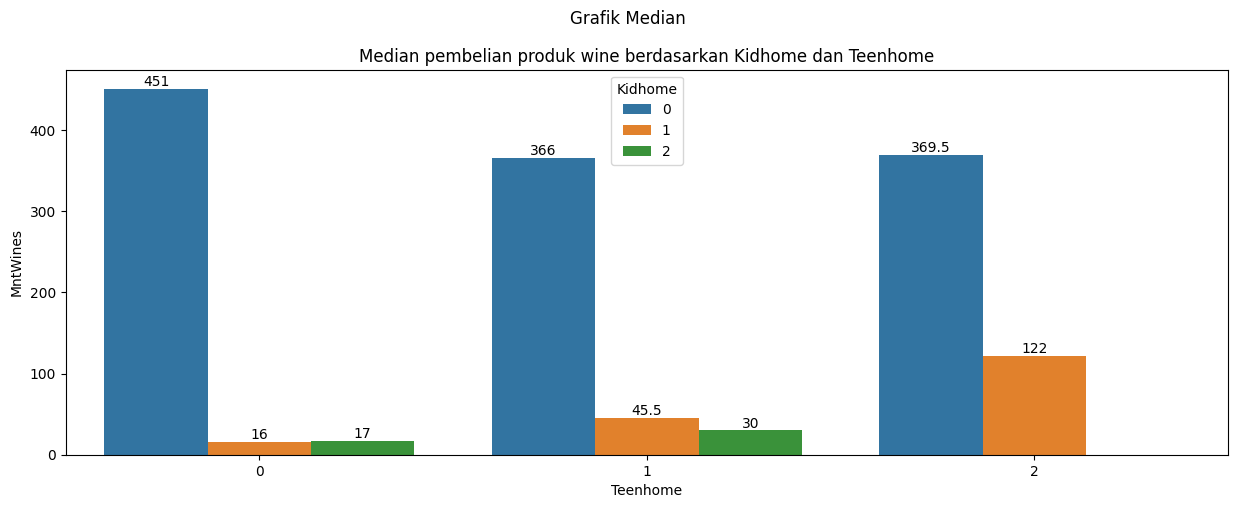

In [102]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_wine, x='Teenhome', y='MntWines', hue = 'Kidhome', ci=0, estimator = 'median')
plt.title(f'Median pembelian produk wine berdasarkan Kidhome dan Teenhome')
for i in ax.containers:
        ax.bar_label(i,)

plt.suptitle("Grafik Median", y=1)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa:

Produk wine paling banyak dibeli oleh:

- pelanggan yang tidak mempunyai anak remaja dan tidak mempunyai anak kecil
- pelanggan yang mempunyai 2 atau 1 anak remaja dan tidak mempunyai anak kecil
- pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja
- pelanggan yang mempunyai 1 anak kecil dan mempunyai 2 anak remaja

### **Minat pembelian produk wine berdasarkan `Income_Class`**

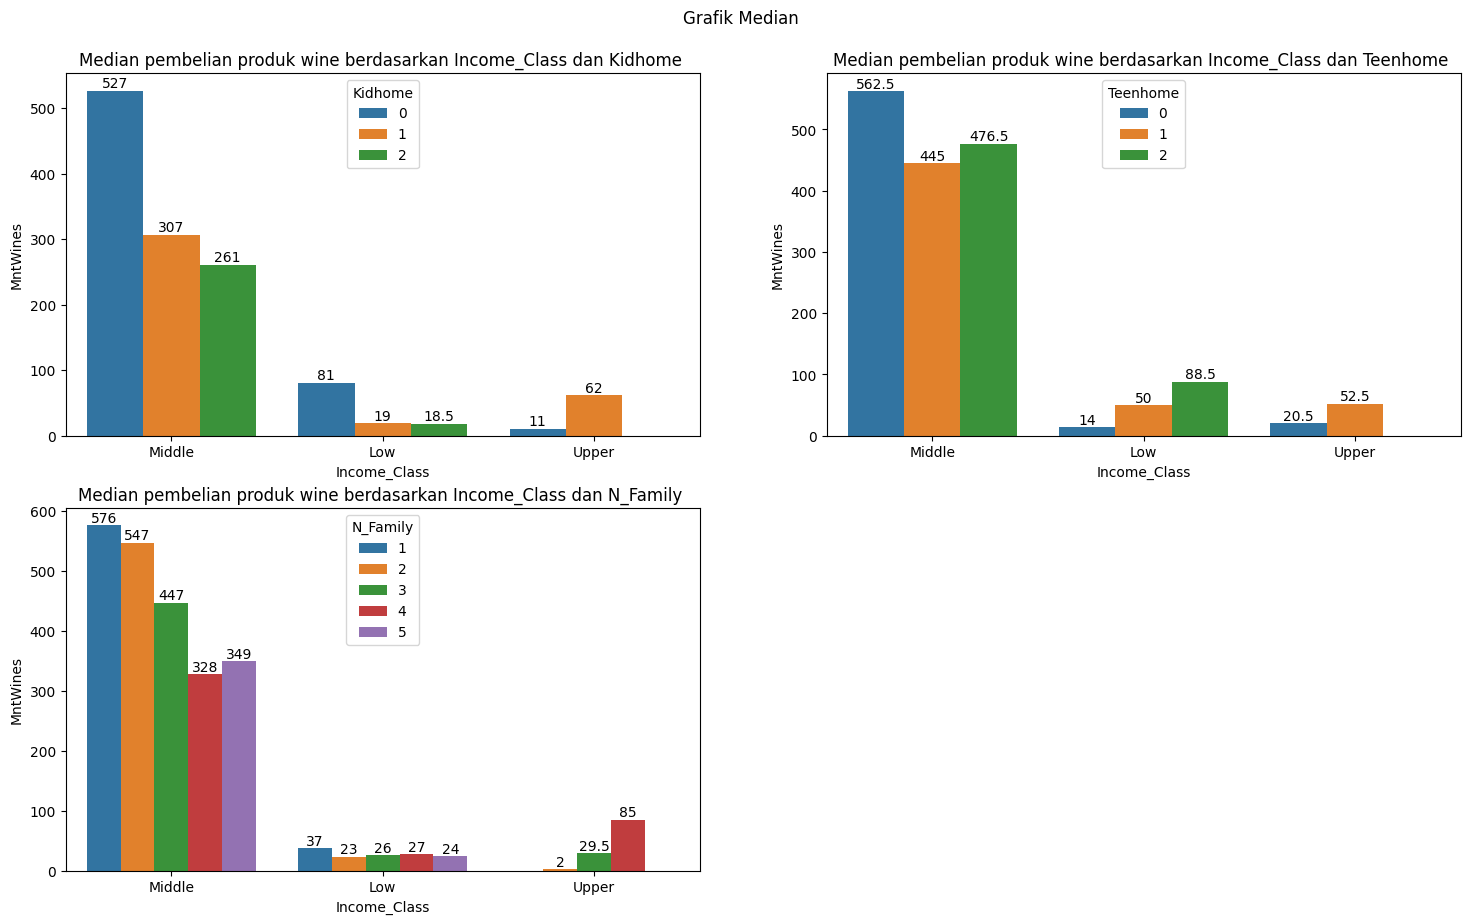

In [103]:
list_product = ['Kidhome', 'Teenhome', 'N_Family']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(18,16))

for i in range(n_rows) :
    for j in range(n_cols) :         
        if id == 3:
             break
        else :
            plt.subplot(n_rows, n_cols, id + 1)
            ax = sns.barplot(data=df, x='Income_Class', y='MntWines', hue = list_product[id], ci=0, estimator = 'median')
            plt.title(f'Median pembelian produk wine berdasarkan Income_Class dan {list_product[id]} ')
            id += 1
            for i in ax.containers:
                    ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.92)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa:

Produk wine paling banyak dibeli oleh:

- pelanggan dengan kelas pemasukan Middle Income yang tidak mempunyai anak kecil
- pelanggan dengan kelas pemasukan Middle Income yang tidak mempunyai anak remaja
- pelanggan dengan kelas pemasukan Middle Income dengan Middle Income ($52,200 - $156,600)

### **Minat pembelian produk wine berdasarkan `Education`**

In [104]:
df_wine = df[(df['Education']=='PhD') | (df['Education']=='Graduation')]
df_wine.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
0,5524,1957,57,51-61,Graduation,Single,58138.0,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0


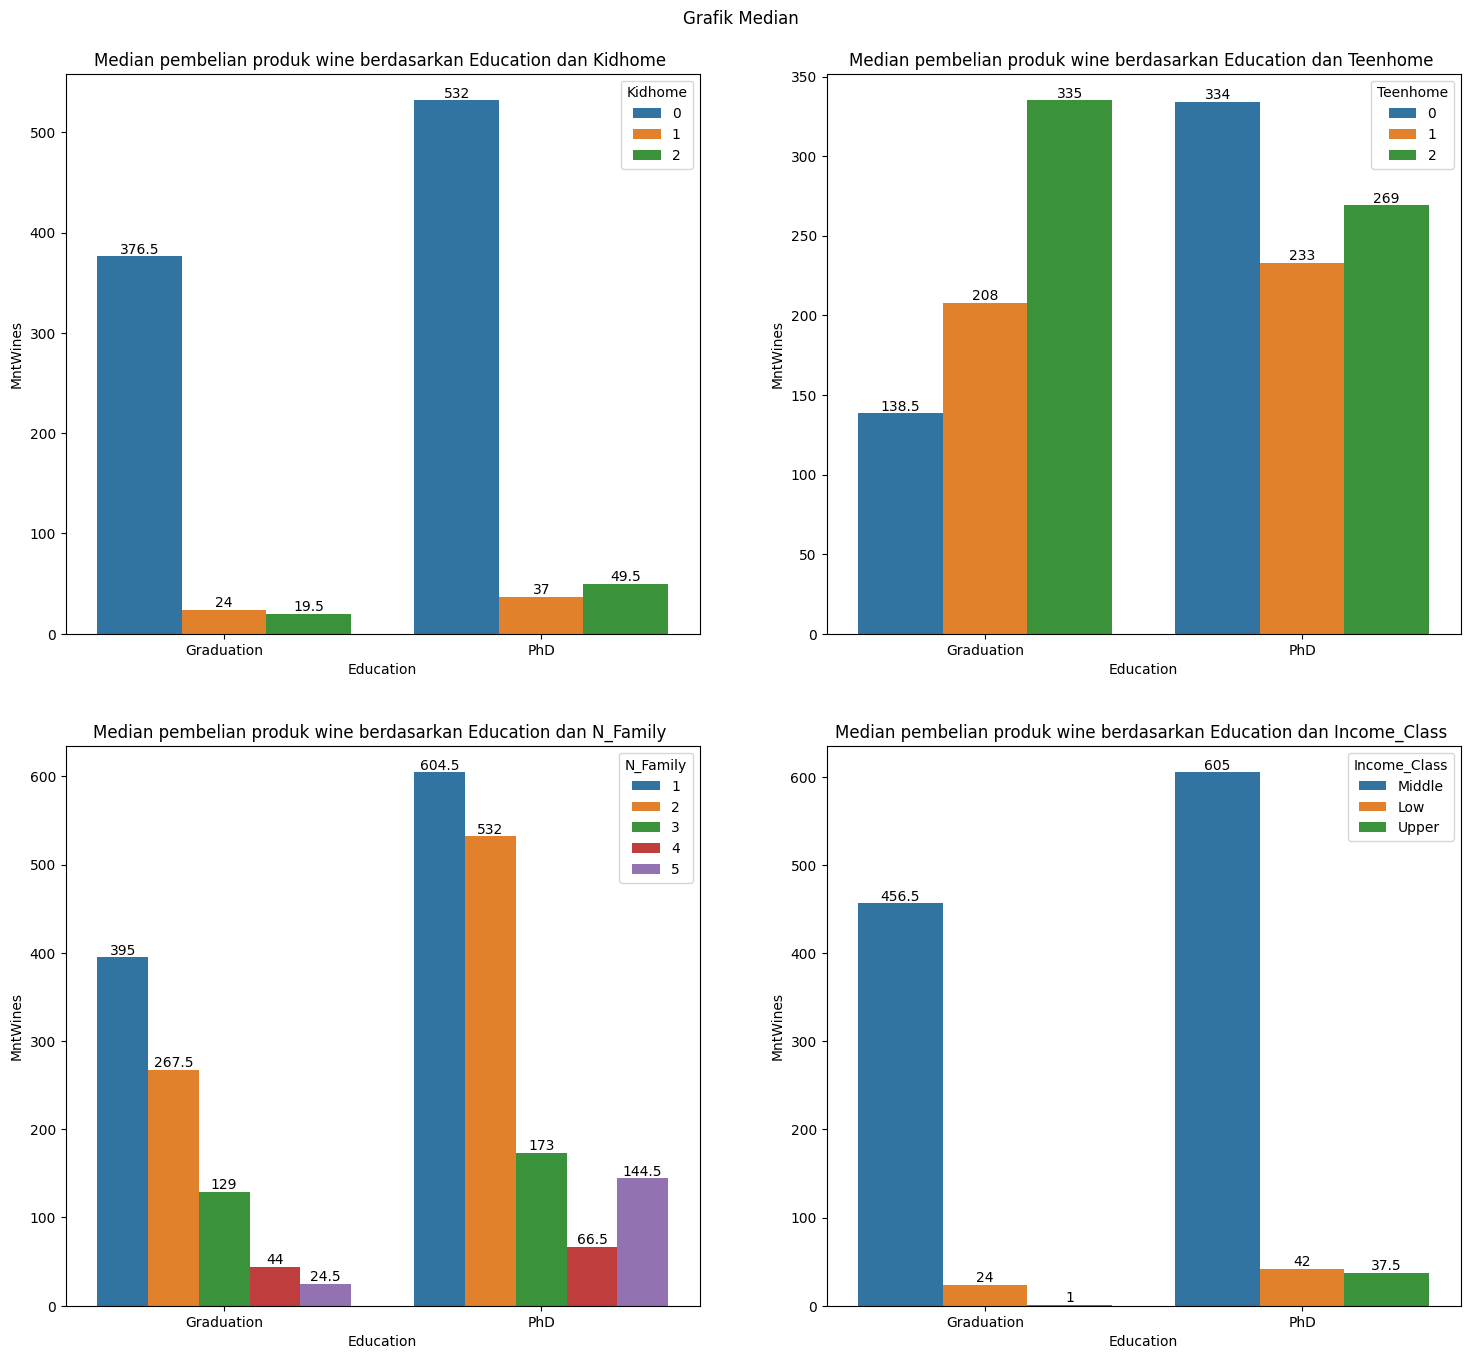

In [105]:
list_product = ['Kidhome', 'Teenhome', 'N_Family', 'Income_Class']
id = 0
n_rows = 2
n_cols = 2
plt.figure(figsize=(18,16))

for i in range(n_rows) :
    for j in range(n_cols) :         
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_wine, x='Education', y='MntWines', hue = list_product[id], ci=0, estimator = 'median')
        plt.title(f'Median pembelian produk wine berdasarkan Education dan {list_product[id]} ')
        id += 1
        for i in ax.containers:
                ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.92)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa:

Produk wine paling banyak dibeli oleh:

- pelanggan dengan pendidikan terakhir Graduation dan PhD yang tidak mempunyai anak kecil
- pelanggan dengan pendidikan terakhir Graduation yang memiliki 2 anak remaja dan PhD yang tidak mempunyai anak remaja
- pelanggan dengan pendidikan terakhir Graduation dan PhD yang hanya tinggal sendiri
- pelanggan dengan pendidikan terakhir Graduation dan PhD dengan Middle Income ($52,200 - $156,600)

### **Minat pembelian produk wine berdasarkan `Marital_Status`**

In [106]:
df_wine = df[(df['Marital_Status']=='Married') | (df['Marital_Status']=='Divorced')]
df_wine.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0
5,7446,1967,47,40-50,Master,Married,62513.0,Middle,0,1,2,3,2013-09-09,September,16,520,42,98,0,42,14,716,2,6,4,10,6,0,0,0,0,0,0,0,0
6,965,1971,43,40-50,Graduation,Divorced,55635.0,Middle,0,1,1,2,2012-11-13,November,34,235,65,164,50,49,27,590,4,7,3,7,6,0,0,0,0,0,0,0,0


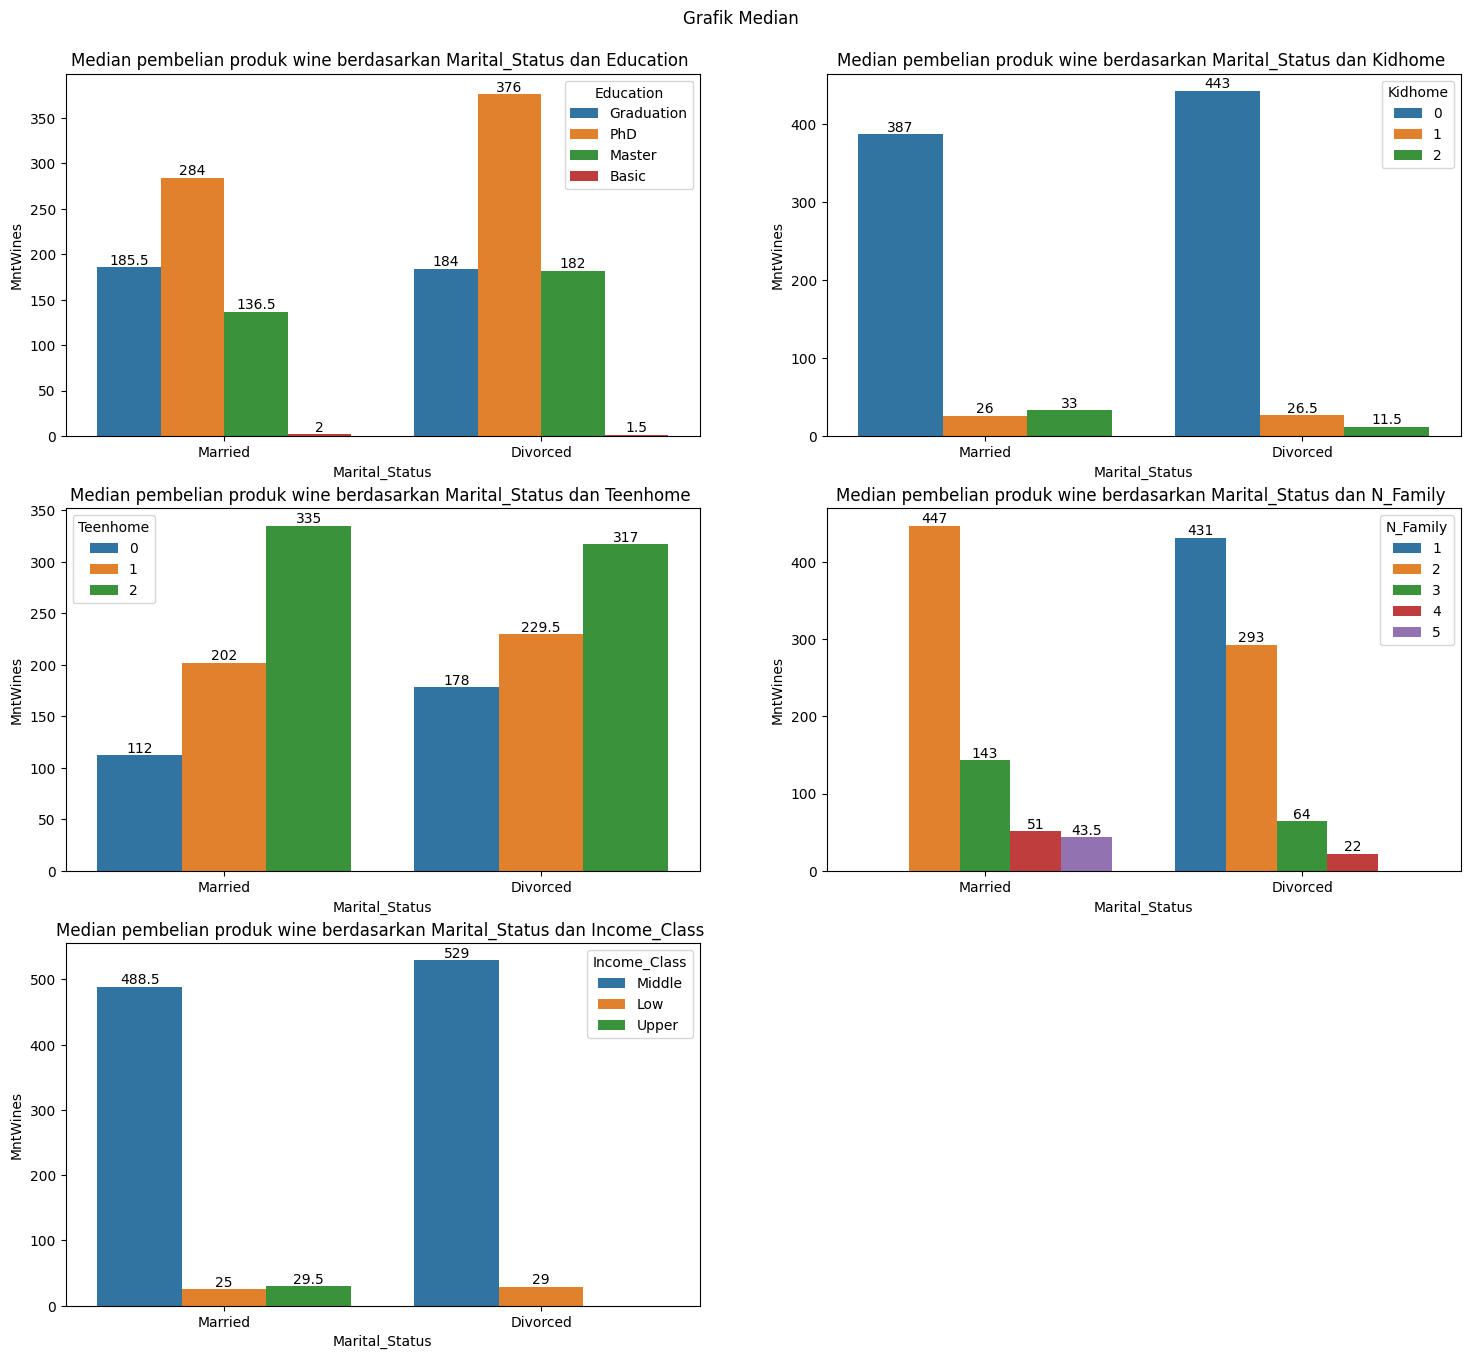

In [107]:
list_product = ['Education', 'Kidhome', 'Teenhome', 'N_Family', 'Income_Class']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(18,16))

for i in range(n_rows) :
    for j in range(n_cols) :         
        if id == 5:
             break
        else :
            plt.subplot(n_rows, n_cols, id + 1)
            ax = sns.barplot(data=df_wine, x='Marital_Status', y='MntWines', hue = list_product[id], ci=0, estimator = 'median')
            plt.title(f'Median pembelian produk wine berdasarkan Marital_Status dan {list_product[id]} ')
            id += 1
            for i in ax.containers:
                    ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.92)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa:

Produk wine paling banyak dibeli oleh:

- pelanggan dengan status menikah dan bercerai dengan jenjang pendidikan PhD
- pelanggan dengan status menikah dan bercerai yang tidak mempunyai anak kecil
- pelanggan dengan status menikah dan bercerai yang mempunyai 2 anak remaja
- pelanggan dengan status menikah yang hanya tinggal berdua dan pelanggan dengan status bercerai dan hidup sendiri
- pelanggan dengan status menikah dan bercerai dengan Middle Income ($52,200 - $156,600)

### **Minat pembelian produk wine berdasarkan `Age_Group`**

In [108]:
df['Income'].min()

1730.0

In [109]:
df_wine = df[(df['Age_Group']=='62-72') | (df['Age_Group']=='73-83')]
df_wine.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
9,5899,1950,64,62-72,PhD,Married,5648.0,Low,1,1,2,4,2014-03-13,March,68,28,0,6,1,1,13,49,1,1,0,0,20,1,0,0,0,0,0,0,1
13,8180,1952,62,62-72,Master,Divorced,59354.0,Middle,1,1,1,3,2013-11-15,November,53,233,2,53,3,5,14,310,3,6,1,5,6,0,0,0,0,0,0,0,0
15,2114,1946,68,62-72,PhD,Single,82800.0,Middle,0,0,1,1,2012-11-24,November,23,1006,22,115,59,68,45,1315,1,7,6,12,3,0,0,1,1,0,0,1,3
17,4939,1946,68,62-72,Graduation,Married,37760.0,Low,0,0,2,2,2012-08-31,August,20,84,5,38,150,12,28,317,2,4,1,6,7,0,0,0,0,0,0,0,0
18,6565,1949,65,62-72,Master,Married,76995.0,Middle,0,1,2,3,2013-03-28,March,91,1012,80,498,0,16,176,1782,2,11,4,9,5,0,0,0,1,0,0,0,1


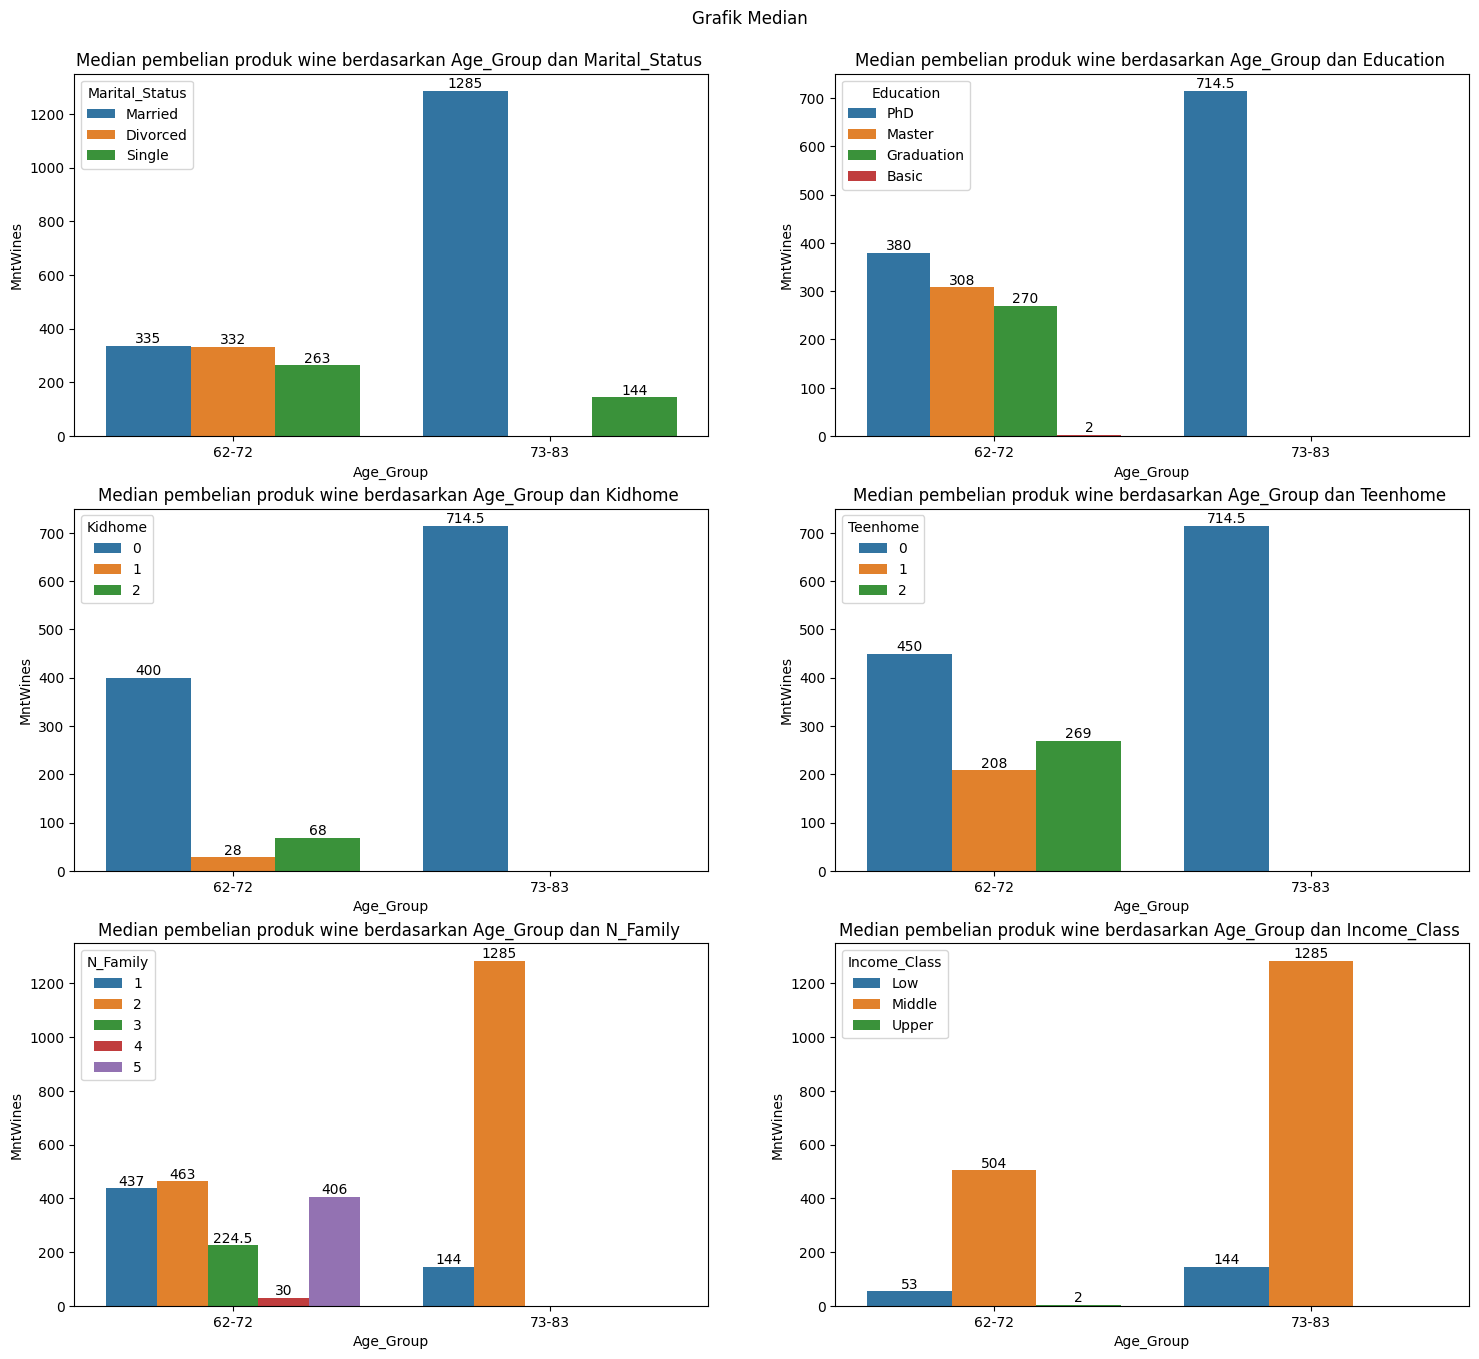

In [110]:
list_product = ['Marital_Status', 'Education', 'Kidhome', 'Teenhome', 'N_Family', 'Income_Class']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(18,16))

for i in range(n_rows) :
    for j in range(n_cols) :         
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(data=df_wine, x='Age_Group', y='MntWines', hue = list_product[id], ci=0, estimator = 'median')
        plt.title(f'Median pembelian produk wine berdasarkan Age_Group dan {list_product[id]} ')
        id += 1
        for i in ax.containers:
                ax.bar_label(i,)

plt.suptitle("Grafik Median", y=0.92)
plt.show()

Dari grafik di atas, kita dapat menarik kesimpulan bahwa:

Produk wine paling banyak dibeli oleh:

- pelanggan dengan rentang usia 62-83 tahun dengan status sudah menikah
- pelanggan dengan rentang usia 62-83 tahun dengan pendidikan akhir PhD
- pelanggan dengan rentang usia 62-83 tahun yang tidak mempunyai anak kecil
- pelanggan dengan rentang usia 62-83 tahun yang tidak mempunyai anak remaja
- pelanggan dengan rentang usia 62-83 tahun dengan jumlah 2 orang di dalam 1 rumah
- pelanggan dengan rentang usia 62-83 tahun dengan Middle Income ($52,200 - $156,600)

## **Analisis Minat Promo**

### **Promo yang paling banyak diambil**

In [111]:
df_promo = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum()
df_promo

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2    30 
Response        334
dtype: int64

In [112]:
df_promo = pd.DataFrame({
    'Promo' : ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'],
    'Total' : [163, 167, 163, 144, 30, 334]
})
df_promo

,Promo,Total
0,AcceptedCmp3,163
1,AcceptedCmp4,167
2,AcceptedCmp5,163
3,AcceptedCmp1,144
4,AcceptedCmp2,30
5,Response,334


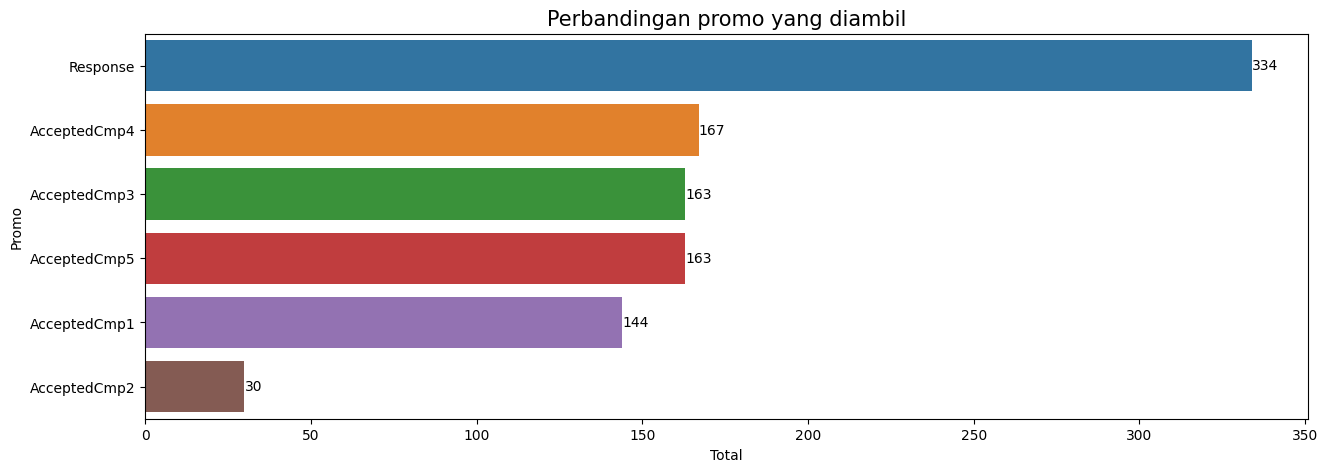

In [113]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan promo yang diambil', size=15)
ax = sns.barplot(df_promo, x='Total', y='Promo', order=df_promo.sort_values('Total', ascending=False).Promo)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat mengambil kesimpulan bahwa :

- Pelanggan cenderung menerima promosi terakhir dan cenderung mengabaikan 2 promosi pertama


### **Efektivitas Promosi**

In [114]:
df.sample(5)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
2031,3799,1955,59,51-61,Graduation,Married,67225.0,Middle,0,1,2,3,2013-11-26,November,4,315,35,322,46,7,143,868,3,7,2,11,5,0,0,0,0,0,0,0,0
1904,10951,1968,46,40-50,Graduation,Married,45688.0,Low,0,1,2,3,2014-01-25,January,20,279,0,18,0,0,9,306,2,3,1,8,4,0,1,0,0,0,0,0,1
2118,6262,1962,52,51-61,Master,Single,72217.0,Middle,0,0,1,1,2013-04-10,April,93,816,42,450,55,56,154,1573,1,3,10,8,2,0,0,0,0,0,0,0,0
321,520,1974,40,40-50,Graduation,Married,34421.0,Low,1,0,2,3,2013-07-01,July,81,3,3,7,6,2,9,30,1,1,0,2,7,0,0,0,0,0,0,0,0
1737,5796,1963,51,51-61,Graduation,Married,77437.0,Middle,0,0,2,2,2013-11-26,November,70,560,21,442,29,44,29,1125,1,4,5,13,1,0,0,1,0,0,0,0,1


In [115]:
df_effect_promo = df.groupby('Accept_Promo')[['Total_Spent']].median().reset_index()
df_effect_promo

,Accept_Promo,Total_Spent
0,0,234.0
1,1,783.5
2,2,1184.5
3,3,1536.0
4,4,1720.0
5,5,1682.0


In [116]:
df_effect_promo[['Accept_Promo', 'Total_Spent']].corr('spearman')

,Accept_Promo,Total_Spent
Accept_Promo,1.000000,0.942857
Total_Spent,0.942857,1.000000


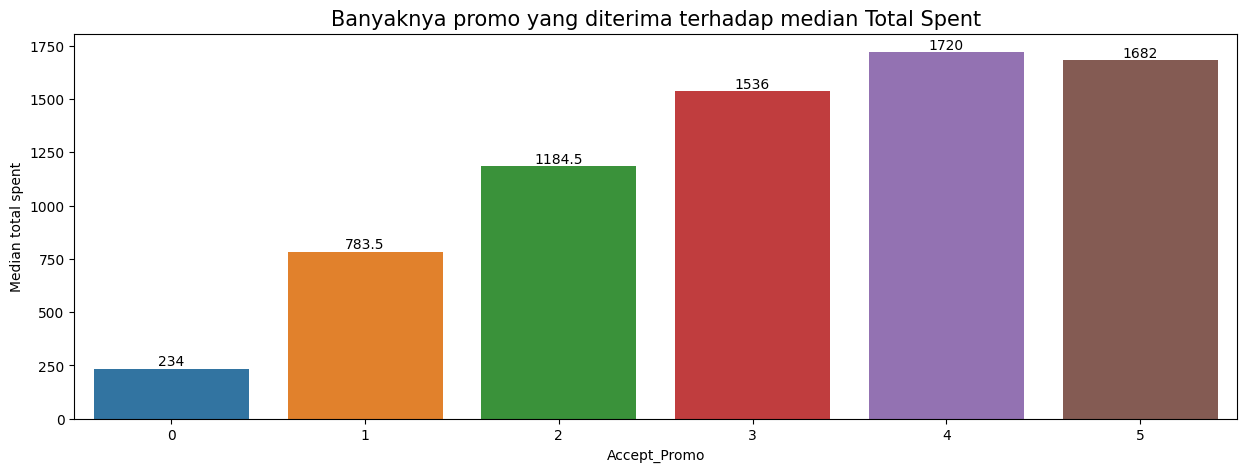

In [117]:
plt.figure(figsize=(15,5))
plt.title('Banyaknya promo yang diterima terhadap median Total Spent', size=15)
ax = sns.barplot(df_effect_promo, x='Accept_Promo', y='Total_Spent', ci=0, estimator='median')
plt.ylabel('Median total spent')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat mengambil kesimpulan bahwa :

- Promosi berjalan efektif, semakin banyak pelanggan menerima promosi, semakin konsumtif pelanggan tersebut
- Masih ada pelanggan yang tidak menerima promosi sama sekali

## **Analisis Lanjutan promosi**

### **promosi yang paling banyak diterima pelanggan yang paling konsumtif dengan produk wine**

In [118]:
df_promo = df_wine[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum()
df_promo

AcceptedCmp3    12
AcceptedCmp4    21
AcceptedCmp5    22
AcceptedCmp1    19
AcceptedCmp2    1 
Response        36
dtype: int64

In [119]:
df_promo = pd.DataFrame({
    'Promo' : ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'],
    'Total' : [4, 19, 25, 12, 9, 20]
})
df_promo

,Promo,Total
0,AcceptedCmp3,4
1,AcceptedCmp4,19
2,AcceptedCmp5,25
3,AcceptedCmp1,12
4,AcceptedCmp2,9
5,Response,20


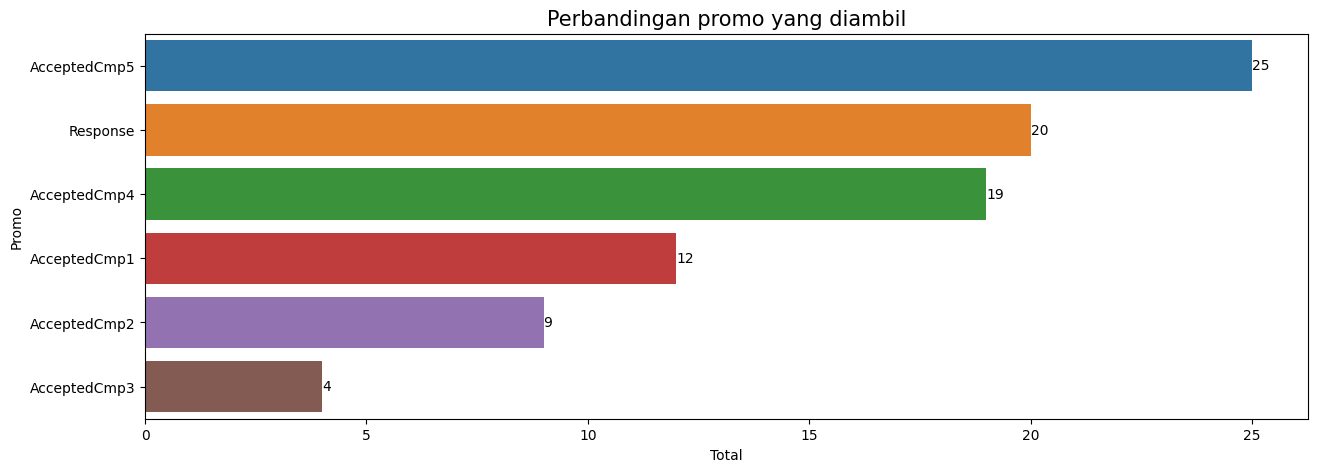

In [120]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan promo yang diambil', size=15)
ax = sns.barplot(df_promo, x='Total', y='Promo', order=df_promo.sort_values('Total', ascending=False).Promo)
for i in ax.containers:
            ax.bar_label(i,)

- Promo ke 5 menjadi promo yang paling banyak diterima oleh konsumen yang paling konsumtif terhadap produk wine
- Promo ke 3 menjadi promo yang paling sedikit diterima oleh konsumen yang paling konsumtif terhadap produk wine dengan perbedaan hampir 6x lipat

### **Total promosi yang diterima pelanggan yang paling konsumtif dengan produk wine**

In [121]:
df_effect_promo_wine = df.groupby('Accept_Promo')[['MntWines']].median().reset_index()
df_effect_promo_wine

,Accept_Promo,MntWines
0,0,97.5
1,1,389.5
2,2,601.0
3,3,817.0
4,4,966.5
5,5,1161.0


In [122]:
df_effect_promo_wine[['Accept_Promo', 'MntWines']].corr('spearman')

,Accept_Promo,MntWines
Accept_Promo,1.0,1.0
MntWines,1.0,1.0


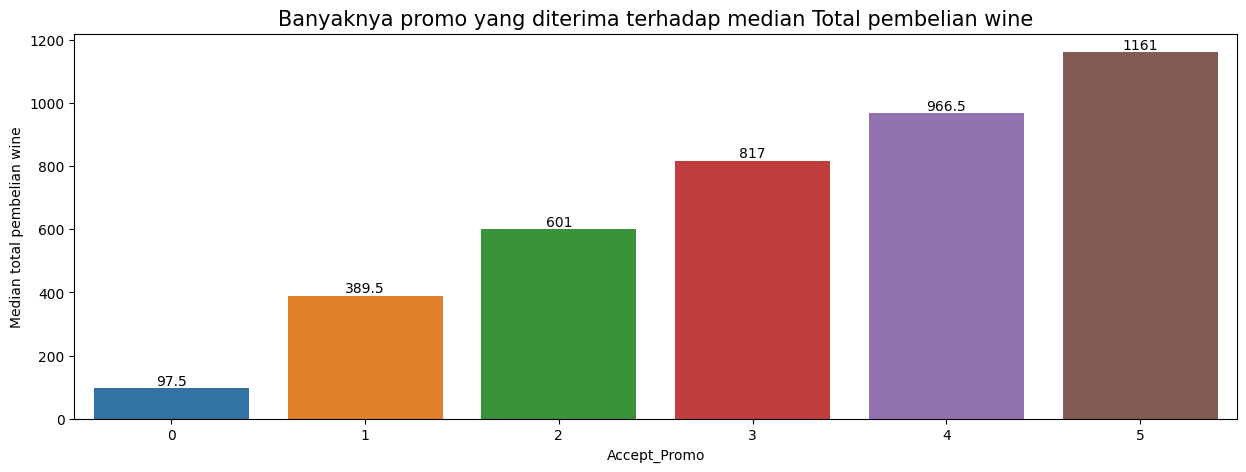

In [123]:
plt.figure(figsize=(15,5))
plt.title('Banyaknya promo yang diterima terhadap median Total pembelian wine', size=15)
ax = sns.barplot(df_effect_promo_wine, x='Accept_Promo', y='MntWines', ci=0, estimator='median')
plt.ylabel('Median total pembelian wine')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat mengambil kesimpulan bahwa :

- Promosi berjalan efektif, semakin banyak pelanggan menerima promosi, semakin konsumtif pelanggan tersebut terhadap produk wine meskipun berdasarkan uji hipotesis mediannya tidak berbeda signifikan
- Masih ada pelanggan yang tidak menerima promosi sama sekali, hal ini perlu untuk diminimalisir karena semakin banyak promosi yang diterima pelanggan, maka akan bisa meningkatkan pembelian produk wine

In [124]:
stat, pvalue = kruskal(
    df_effect_promo_wine[df_effect_promo_wine['Accept_Promo'] == 1]['MntWines'],
    df_effect_promo_wine[df_effect_promo_wine['Accept_Promo'] == 2]['MntWines'],
    df_effect_promo_wine[df_effect_promo_wine['Accept_Promo'] == 3]['MntWines'],
    df_effect_promo_wine[df_effect_promo_wine['Accept_Promo'] == 4]['MntWines'],
    df_effect_promo_wine[df_effect_promo_wine['Accept_Promo'] == 5]['MntWines']
    )
pvalue

if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median total promo yang diterima terhadap minat pembelian produk wine TIDAK berbeda signifikan       
    ''')
else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median total promo yang diterima terhadap minat pembelian produk wine berbeda signifikan
    ''')


    pvalue = 0.40601. pvalue > 0.05. Gagal Menolak Ho.
    Median total promo yang diterima terhadap minat pembelian produk wine TIDAK berbeda signifikan       
    


## **Analisis Minat Place**

### **Cek Distribusi data**

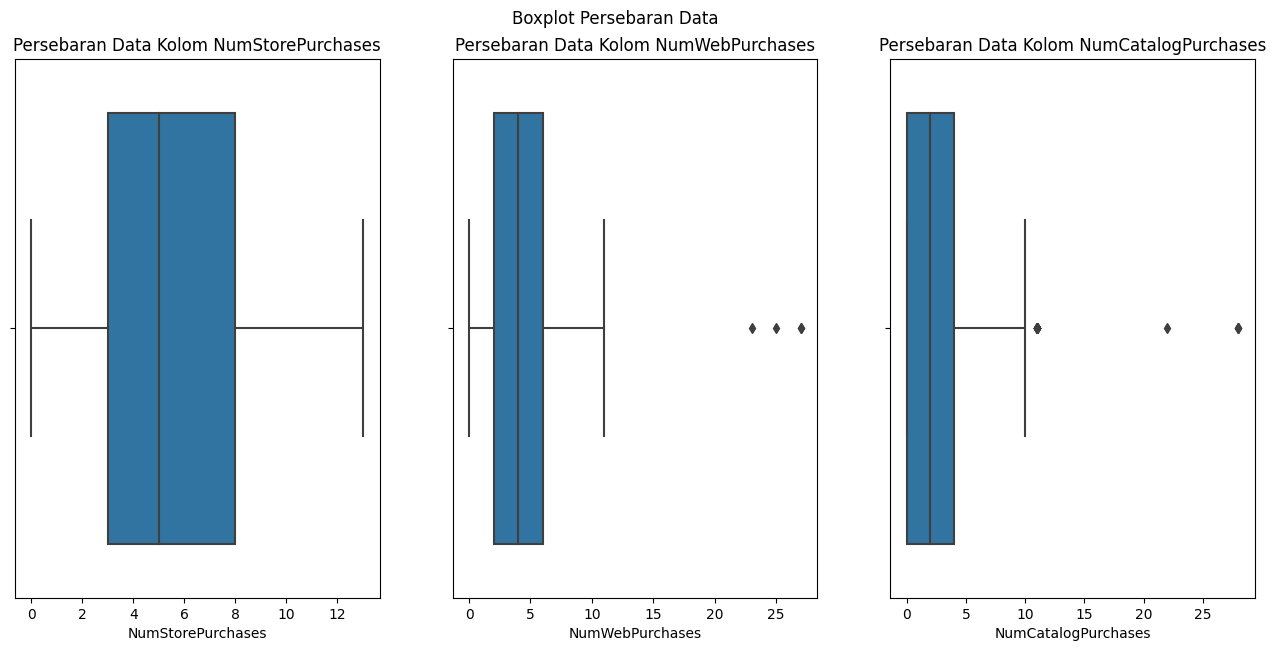

In [125]:
# Melihat persebaran data menggunakan boxplot
list_corr = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
id = 0
n_rows = 1
n_cols = 3
plt.figure(figsize=(16,7))

for i in range(n_rows) :
    for j in range(n_cols) :
        plt.subplot(n_rows, n_cols, id + 1)
        sns.boxplot(data=df, x = list_corr[id])
        plt.title(f'Persebaran Data Kolom {list_corr[id]}', y=1)
        id += 1

plt.suptitle("Boxplot Persebaran Data", y=0.95)
plt.show()

In [126]:
# Uji normalitas setiap kolom kategori produk dengan normaltest 
list_produk = ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
for i in list_produk:
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data pada kolom NumStorePurchases TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom NumWebPurchases TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom NumCatalogPurchases TIDAK terdistribusi normal


Secara singkat, kita bisa mengetahui bahwa semua kolom diatas tidak terdistribusi normal, sehingga untuk proses analisis selanjutnya, kita akan menggunakan **median**

### **Tempat transaksi paling banyak**

In [127]:
df_place = df[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']].sum()
df_place

NumStorePurchases      12967
NumWebPurchases        9147 
NumCatalogPurchases    5962 
dtype: int64

In [128]:
df_place = pd.DataFrame({
    'Place' : ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases'],
    'Total' : [12967, 9147, 5962]
})
df_place

,Place,Total
0,NumStorePurchases,12967
1,NumWebPurchases,9147
2,NumCatalogPurchases,5962


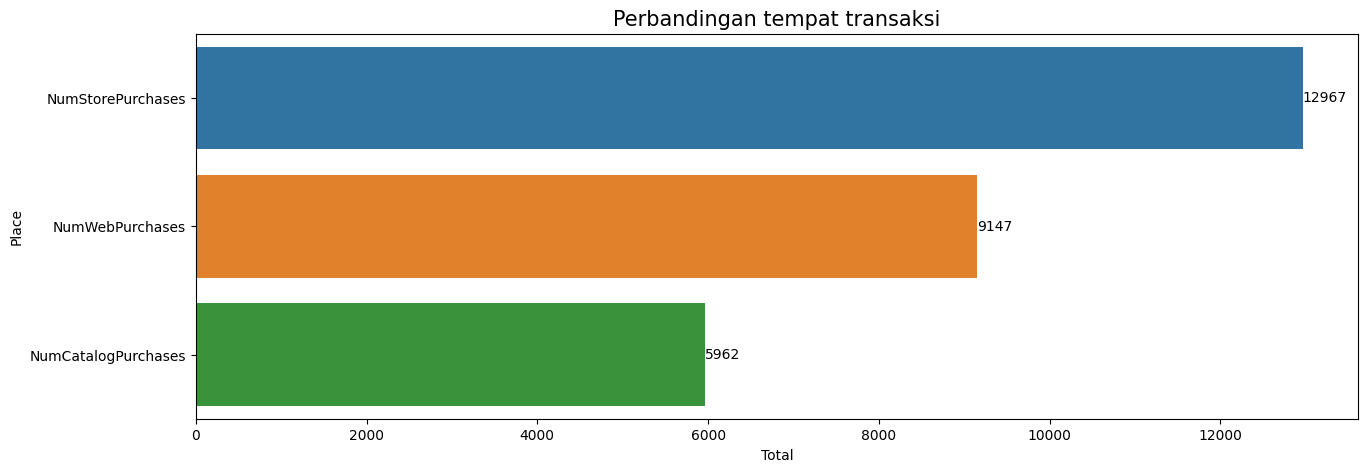

In [129]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan tempat transaksi', size=15)
ax = sns.barplot(df_place, x='Total', y='Place')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat menyimpulkan bahwa pelanggan lebih banyak melakukan pembelian di Supermarket langsung daripada melalui website atau katalog

### **Analisis efektivitas website**

In [130]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
0,5524,1957,57,51-61,Graduation,Single,58138.0,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0


In [131]:
df_effect_web = df[['NumWebVisitsMonth', 'NumWebPurchases']].median().reset_index()
df_effect_web

,index,0
0,NumWebVisitsMonth,6.0
1,NumWebPurchases,4.0


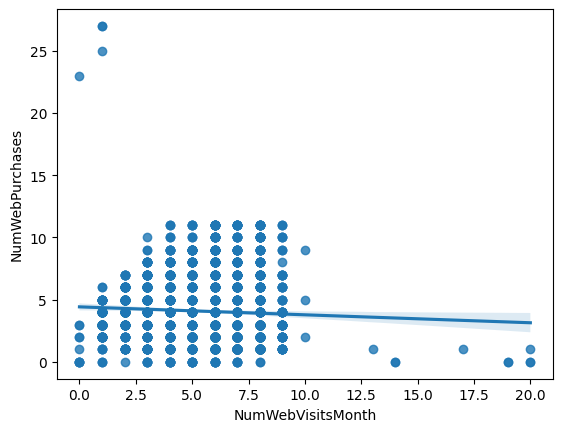

In [164]:
sns.regplot(data=df, x='NumWebVisitsMonth', y='NumWebPurchases')
plt.show()

In [132]:
df[['NumWebVisitsMonth', 'NumWebPurchases']].corr('spearman')

,NumWebVisitsMonth,NumWebPurchases
NumWebVisitsMonth,1.00000,-0.09711
NumWebPurchases,-0.09711,1.00000


Secara korelasi, jumlah kunjungan website terhadap pembelian melalui website memiliki korelasi negatif dan lemah. Artinya, kunjungan website tidak berpengaruh terhadap pembelian melalui website

## **Analisis Place lanjutan**

### **Tempat pembelian wine terbanyak**

In [134]:
df_top_100_wine = df.sort_values('MntWines', ascending=False).head(100)
df_top_100_wine

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
1749,737,1949,65,62-72,PhD,Married,80360.0,Middle,0,0,2,2,2013-03-03,March,56,1493,86,454,112,43,43,2231,2,4,4,5,2,0,1,1,1,0,0,0,3
559,3174,1959,55,51-61,Graduation,Married,87771.0,Middle,0,1,2,3,2013-05-22,May,61,1492,38,287,50,57,33,1957,1,5,10,4,6,0,1,1,1,1,0,1,5
824,5536,1959,55,51-61,Graduation,Married,87771.0,Middle,0,1,2,3,2013-05-22,May,61,1492,38,287,50,57,33,1957,1,5,10,4,6,0,1,1,1,1,0,1,5
2098,1103,1976,38,29-39,Master,Married,81929.0,Middle,1,0,2,3,2012-09-29,September,60,1486,55,278,49,0,185,2053,2,4,4,10,6,1,0,1,0,0,0,1,3
917,8362,1982,32,29-39,PhD,Married,84169.0,Middle,0,0,2,2,2013-08-07,August,9,1478,19,403,0,19,0,1919,1,7,6,6,3,0,1,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,5558,1954,60,51-61,PhD,Single,90933.0,Middle,0,0,1,1,2014-03-31,March,90,1020,31,430,62,63,79,1685,1,4,6,4,1,0,0,1,0,0,0,0,1
1993,10164,1958,56,51-61,Graduation,Single,94472.0,Middle,0,1,1,2,2014-04-03,April,75,1017,33,417,108,100,16,1691,1,5,5,5,5,0,1,1,0,0,0,0,2
1913,5831,1967,47,40-50,Graduation,Married,77870.0,Middle,0,1,2,3,2012-08-22,August,93,1017,50,500,65,50,133,1815,3,5,5,5,8,0,1,0,1,0,0,1,3
1602,2565,1955,59,51-61,Master,Divorced,70638.0,Middle,0,0,1,1,2013-06-01,June,69,1016,12,215,16,12,63,1334,1,4,5,10,3,0,1,0,0,0,0,0,1


In [135]:
df_top_100_wine[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

NumWebPurchases        569
NumCatalogPurchases    561
NumStorePurchases      824
dtype: int64

In [136]:
df_top_100_wine = pd.DataFrame({
    'Place' : ['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases'],
    'Total' : [824, 569, 561]
})
df_top_100_wine

,Place,Total
0,NumStorePurchases,824
1,NumWebPurchases,569
2,NumCatalogPurchases,561


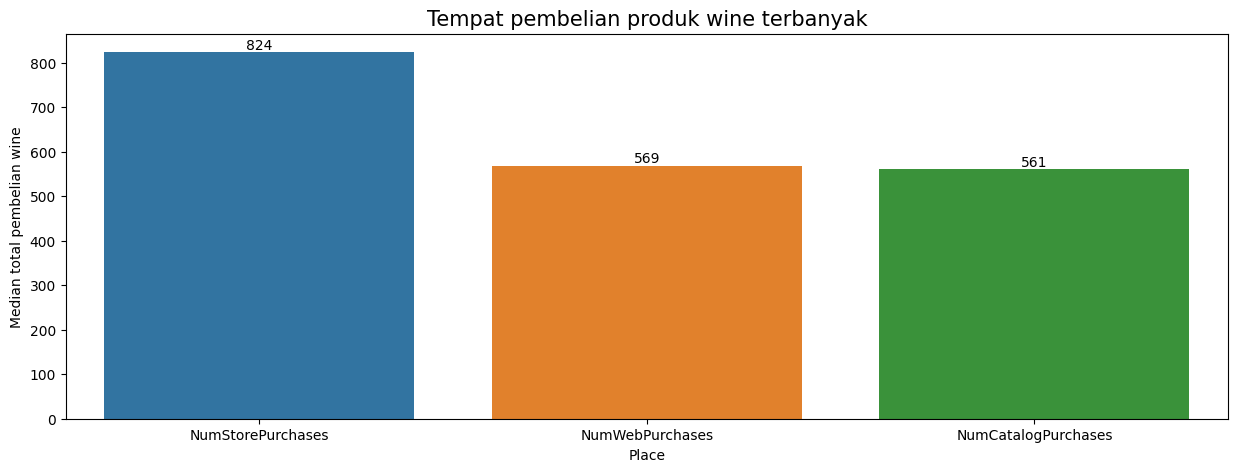

In [137]:
plt.figure(figsize=(15,5))
plt.title('Tempat pembelian produk wine terbanyak', size=15)
ax = sns.barplot(df_top_100_wine, x='Place', y='Total', ci=0)
plt.ylabel('Median total pembelian wine')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat mengambil kesimpulan bahwa :

- Berdasarkan data 100 pelanggan pembeli wine terbanyak, pelanggan paling banyak membeli wine di Supermarket langsung daripada melalui website atau katalog
- Pelanggan paling sedikit membeli wine melalui katalog

## **Analisis kinerja pelayanan**

In [138]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Parent,N_Family,Dt_Customer,Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_Promo
0,5524,1957,57,51-61,Graduation,Single,58138.0,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,51-61,Graduation,Single,46344.0,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,40-50,Graduation,Married,71613.0,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,29-39,Graduation,Married,26646.0,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,29-39,PhD,Married,58293.0,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0


In [139]:
df_complain = df.groupby('Complain')[['ID']].count().reset_index()
df_complain['Complain_Percentage'] = df_complain['ID'] / len(df) * 100
df_complain['Complain'] = df_complain['Complain'].replace(0, 'Not Complain')
df_complain['Complain'] = df_complain['Complain'].replace(1, 'Complain')
df_complain

,Complain,ID,Complain_Percentage
0,Not Complain,2218,99.062081
1,Complain,21,0.937919


In [140]:
len(df)

2239

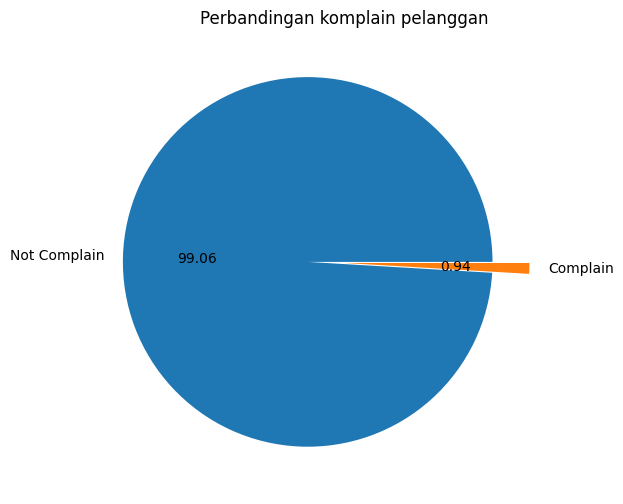

In [141]:
plt.figure(figsize=(8,6))
plt.pie(
    x = df_complain['ID'],            # Isi dengan kolom numerikal
    labels = df_complain['Complain'],     # Isi dengan kolom kategorikal
    autopct= f'%.2f',
    explode=[0.2, 0]                    # format label yang akan ditampilkan        
)
plt.title('Perbandingan komplain pelanggan')
plt.show()

Kinerja pelayanan terhadap pelanggan sejauh ini sangat memuaskan. dari 2240 pelanggan, hanya 21 orang yang mengajukan komplain (sekitar 0.94%)

## **Analisis transaksi pertama pelanggan**

In [142]:
df_month = pd.DataFrame(df['Month'].value_counts().reset_index())
df_month

,Month,count
0,August,222
1,May,216
2,October,212
3,March,211
4,January,197
5,September,193
6,November,187
7,April,182
8,February,178
9,December,175


In [143]:
df_month = df_month.reindex([4,8,3,7,1,10,11,0,5,2,6,9], axis=0).reset_index(drop=True)
df_month

,Month,count
0,January,197
1,February,178
2,March,211
3,April,182
4,May,216
5,June,165
6,July,101
7,August,222
8,September,193
9,October,212


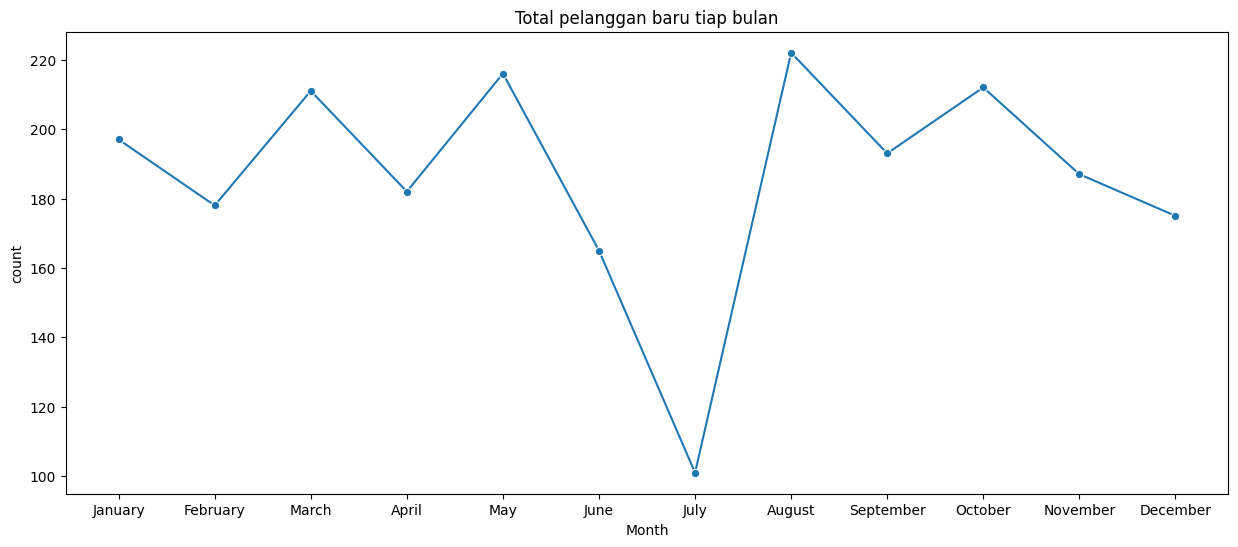

In [144]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(
    data = df_month,
    x = 'Month',
    y = 'count',
    ci = 90,
    marker = 'o'
)

plt.title('Total pelanggan baru tiap bulan')
plt.show()

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:
- Bulan Agustus menjadi bulan dengan pelanggan baru terbanyak
- Bulan Juli menjadi bulan dengan penggan baru paling sedikit
- Terjadi peningkatan yang signifikan dari bulan Juli ke Agustus

# **Kesimpulan**

Setelah melakukan proses analisis, kita mendapatkan beberapa insight yaitu:

- Wine merupakan produk yang paling banyak dibeli dalam 2 tahun terakhir di Supermarket. Keseluruhan konsumen telah mengeluarkan uang sebesar 680029 dollar untuk membeli wine.
- Income pelanggan dan pembelian wine mempunyai korelasi yang positif dan kuat sebesar 0.83. Artinya semakin tinggi Income maka akan semakin tinggi tingkat konsumtif terhadap produk wine.
- Semakin banyak jumlah anggota keluarga, maka semakin rendah tingkat konsumtif terhadap produk wine.
- Pelanggan dengan ID 737, 3174, 5536, 1103, 5547, 8362, 3009, 1665, 9743, 11088, 4580, 4943, 9260, 7431, 3138, 4475, 6292, 10140, 10133, 8732, 8545, 203, 7962, 7919, 6932, 9499, 6248, 1763, 1204, 9298, 3725, 7899, 2926, 7999, dan 5236 merupakan 35 pelanggan yang paling konsumtif terhadap produk wine dengan total spent produk wine sebesar 46958 dollar (sekitar 6.9% dari total pembelian wine)

Adapun *customer behavior* yang membeli produk wine di supermarket yaitu:

**Segmentasi pelanggan yang sering membeli produk wine di supermarket**

Secara umum:

- Pelanggan dengan rentang usia 62-83 tahun
- Pelanggan dengan pendidikan akhir PhD atau Graduation
- Pelanggan dengan status pernikahan menikah atau bercerai
- Pelanggan dengan Income Class Upper atau Middle (Income diatas $52,200 pertahun)
- pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja
<br><br>

Untuk menentukan target konsumen secara lebih spesifik, berikut adalah urutan dari general hingga spesifik:

- Pelanggan yang tidak mempunyai anak kecil
- Pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja
- Pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja dan termasuk kedalam Middle atau Upper Income Class
- Pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja dan termasuk kedalam Middle atau Upper Income Class dengan pendidikan terakhir Graduation atau PhD
- Pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja dan termasuk kedalam Middle atau Upper Income Class dengan pendidikan terakhir Graduation atau PhD dengan status menikah atau bercerai
- Pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja dan termasuk kedalam Middle atau Upper Income Class dengan pendidikan terakhir Graduation atau PhD dengan status menikah atau bercerai dengan rentang usia 62-83 tahun



**pengaruh promosi terhadap minat beli produk wine**

- Promosi berjalan efektif, semakin banyak pelanggan menerima promosi, semakin konsumtif pelanggan tersebut terhadap produk wine meskipun berdasarkan uji hipotesis mediannya tidak berbeda signifikan
- Masih ada pelanggan yang tidak menerima promosi sama sekali, hal ini perlu untuk diminimalisir karena semakin banyak promosi yang diterima pelanggan, maka akan bisa meningkatkan pembelian produk wine
- Promo ke 5 menjadi promo yang paling banyak diterima oleh konsumen yang paling konsumtif terhadap produk wine
- Promo ke 3 menjadi promo yang paling sedikit diterima oleh konsumen yang paling konsumtif terhadap produk wine dengan perbedaan hampir 6x lipat


**Tempat pembelian wine terbanyak**

- Berdasarkan data 100 pelanggan pembeli wine terbanyak, pelanggan paling banyak membeli wine di Supermarket langsung daripada melalui website atau katalog
- Pelanggan paling sedikit membeli wine melalui katalog
- Secara korelasi, jumlah kunjungan website terhadap pembelian melalui website memiliki korelasi negatif dan lemah. Artinya, kunjungan website hampir tidak berpengaruh terhadap pembelian melalui website


# **Rekomendasi**

- Apabila ingin melakukan segmentasi pelanggan yang mempunyai minat tinggi terhadap produk wine, maka karakteristik pelanggan tersebut adalah :
    
    - Pelanggan dengan rentang usia 62-83 tahun
    - Pelanggan dengan pendidikan akhir PhD atau Graduation
    - Pelanggan dengan status pernikahan menikah atau bercerai
    - Pelanggan dengan Income Class Upper atau Middle (Income diatas $52,200 pertahun)
    - pelanggan yang tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja
<br><br>
- Apabila ingin melakukan segmentasi pelanggan yang lebih spesifik, maka pilihlah pelanggan dengan karakteristik tidak mempunyai anak kecil tapi mempunyai 1 atau 2 anak remaja dan termasuk kedalam Middle atau Upper Income Class dengan pendidikan terakhir Graduation atau PhD dengan status menikah atau bercerai dengan rentang usia 62-83 tahun
- Gunakan data pelanggan yang paling konsumtif terhadap produk wine sebagai target untuk ditawari produk wine baru yang akan diluncurkan. Kita bisa memberi perlakuan atau penawaran khusus kepada para pelanggan tersebut dengan harapan pelanggan tersebut akan membeli produk wine yang baru dan semakin loyal dengan Supermarket kita.
- Wine adalah produk yang paling banyak dibeli di Supermarket selama 2 tahun terakhir sehingga hal ini dapat memperkecil kemungkinan produk wine yang akan diluncurkan tidak laku.
- Promo ke 5 menjadi promo yang paling banyak diterima oleh konsumen yang paling konsumtif terhadap produk wine sehingga promo ini harus lebih digencarkan lagi saat proses peluncuran produk wine baru.
- Masih ada pelanggan yang tidak menerima promosi sama sekali, hal ini perlu untuk diminimalisir karena semakin banyak promosi yang diterima pelanggan, maka akan bisa meningkatkan pembelian produk wine dan produk produk lainnya.
- Berdasarkan data, pelanggan paling banyak melakukan pembelian wine di Supermarket langsung. Maka dari itu, kita perlu memperhatikan kebersihan supermarket, tata letak produk wine baru yang akan diluncurkan, dan juga desain promosi sehingga bisa menarik minat konsumen untuk membeli produk wine
- Minat pembelian produk wine melalui website dan katalog masih kecil sehingga mungkin perlu adanya pemerhatian lebih terhadap website dan katalog yang Supermarket punya.
- Kinerja pelayanan terhadap pelanggan sejauh ini sangat memuaskan. Dari 2239 pelanggan, hanya 21 orang yang mengajukan komplain (sekitar 0.94%). Tapi kinerja pelayanan itu dirasa perlu terus dipertahankan bahkan ditingkatkan agar konsumen bisa tetap loyal terhadap Supermarket kita.
- Bulan Mei dan Agustus menjadi Bulan dengan penambahan konsumen baru yang paling tinggi, akan tetapi dari bulan Mei-Juli terjadi penurunan yang sangat signifikan meskipun dari bulan Juli-Agustus terjadi kenaikan yang signifikan juga (121 pelanggan baru). sehingga apabila ingin meluncurkan produk wine baru, ada baiknya peluncuran produk dilakukan pada bulan Juli-Agustus